<a href="https://colab.research.google.com/github/tarik19x/1st-Django-App-Using-Django-and-Bootstrap/blob/master/ISMAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.11.11


Correlation Matrix:
                       Spatial_Proximity  Referential_Context  \
Spatial_Proximity                  1.000                0.452   
Referential_Context                0.452                1.000   
Environmental_Context             -0.070                0.409   
Concreteness                      -0.002                0.434   
Coherence                          0.242                0.575   

                       Environmental_Context  Concreteness  Coherence  
Spatial_Proximity                     -0.070        -0.002      0.242  
Referential_Context                    0.409         0.434      0.575  
Environmental_Context                  1.000         0.657      0.459  
Concreteness                           0.657         1.000      0.476  
Coherence                              0.459         0.476      1.000  

Descriptive Statistics:
       Spatial_Proximity  Referential_Context  Environmental_Context  \
count             61.000               61.000               

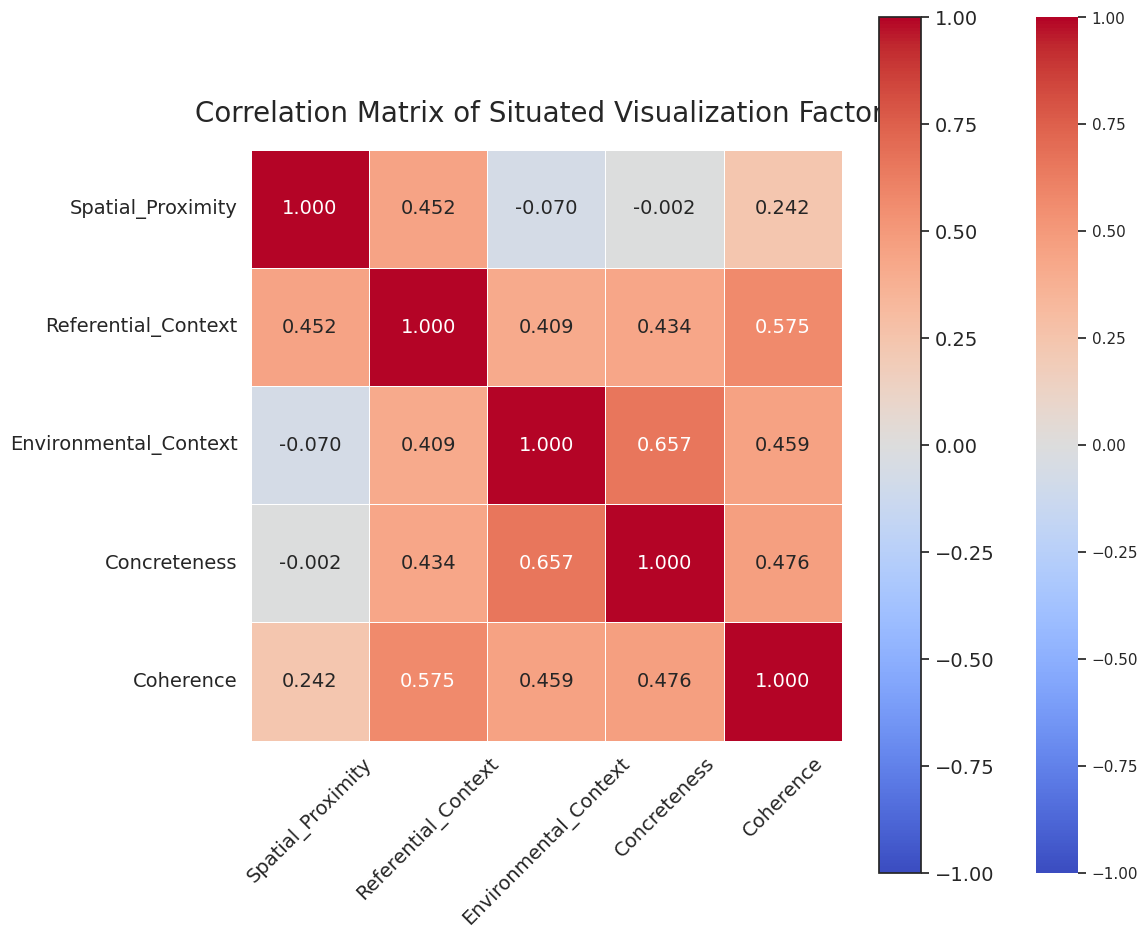

<Figure size 1600x1400 with 0 Axes>

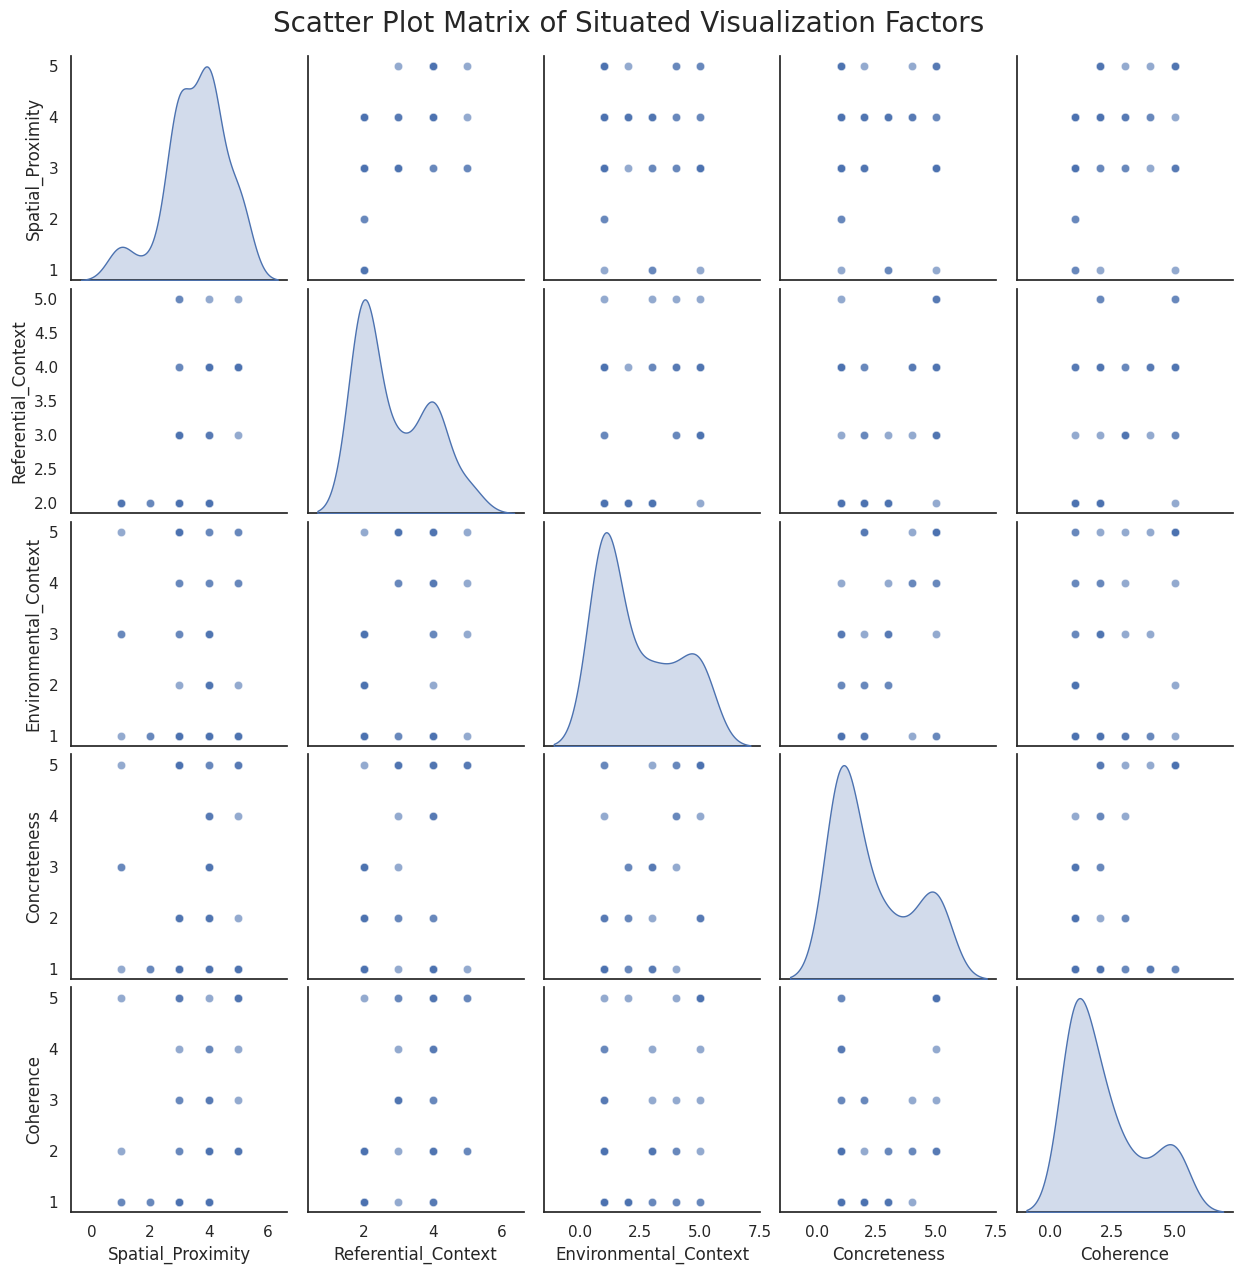

<Figure size 1400x1200 with 0 Axes>

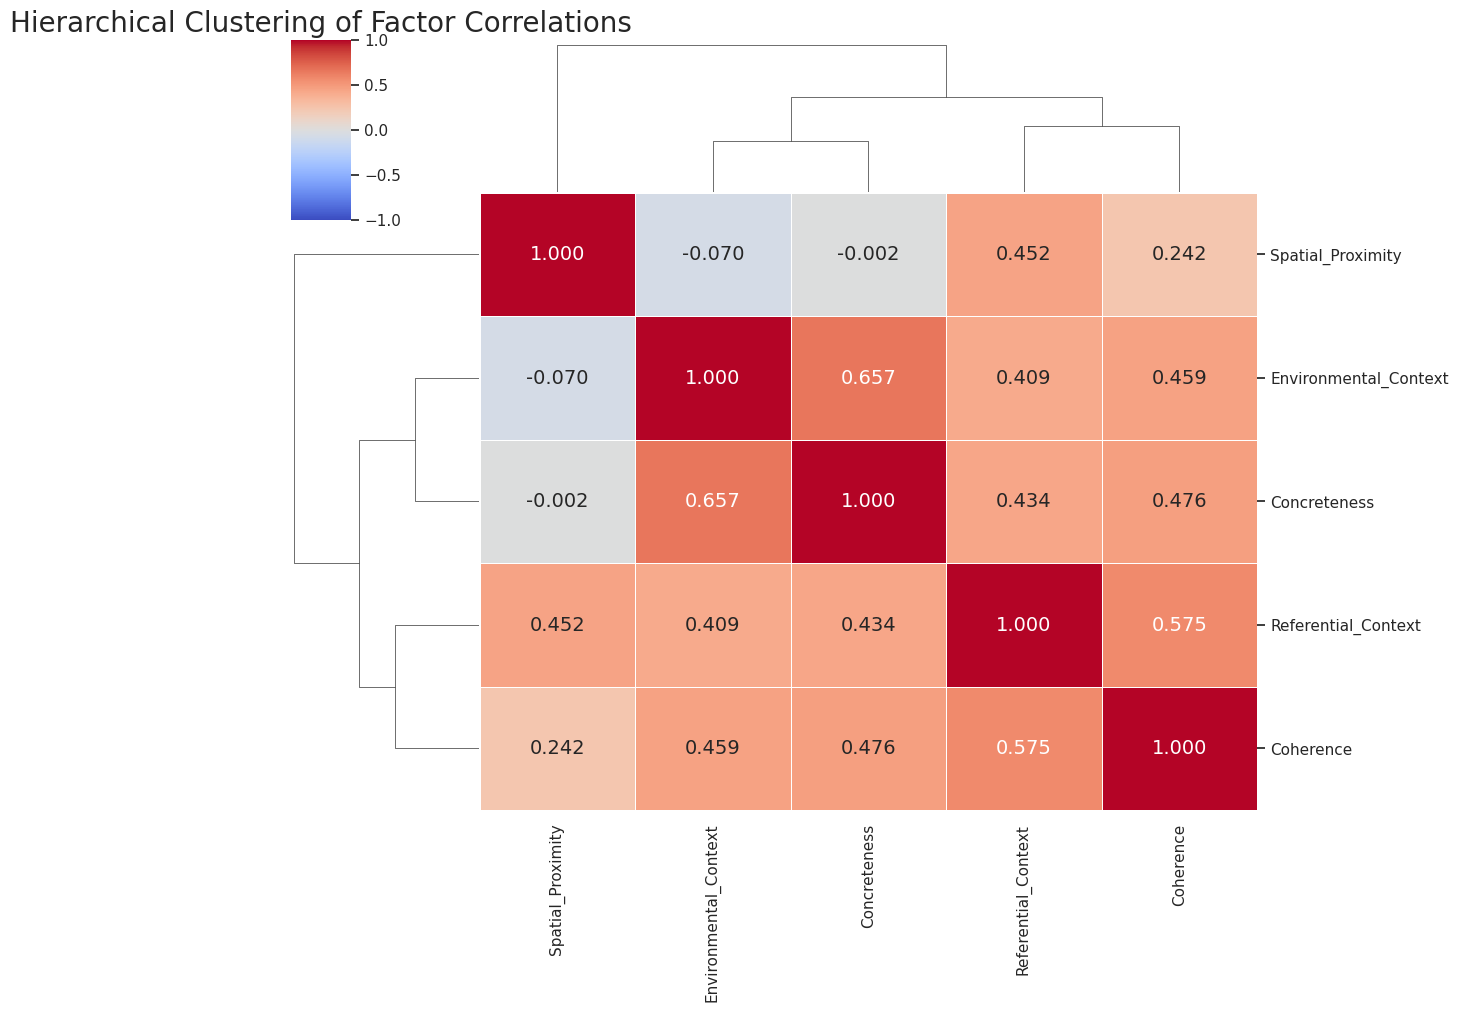


Strongest Correlations (by absolute value):
1. Concreteness & Environmental_Context: 0.657
2. Coherence & Referential_Context: 0.575
3. Coherence & Concreteness: 0.476
4. Coherence & Environmental_Context: 0.459
5. Referential_Context & Spatial_Proximity: 0.452
6. Concreteness & Referential_Context: 0.434
7. Environmental_Context & Referential_Context: 0.409
8. Coherence & Spatial_Proximity: 0.242
9. Environmental_Context & Spatial_Proximity: -0.070
10. Concreteness & Spatial_Proximity: -0.002


In [ ]:
# Factor Correlation Analysis for Situated Visualization Factors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set(style="white")

# Load the data
data = pd.read_excel('updated_data_01.xlsx')

# Extract features
features = ['Spatial_Proximity', 'Referential_Context', 'Environmental_Context',
            'Concreteness', 'Coherence']

# Check if all features exist in the dataset
missing_features = [feat for feat in features if feat not in data.columns]
if missing_features:
    print(f"Warning: The following features are missing from the dataset: {missing_features}")
    print("Available columns:", data.columns.tolist())
else:
    # Calculate the correlation matrix
    correlation_matrix = data[features].corr()
    print("Correlation Matrix:")
    print(correlation_matrix.round(3))

    # Generate descriptive statistics for each factor
    print("\nDescriptive Statistics:")
    print(data[features].describe().round(3))

    # Visualize the correlation matrix as a heatmap
    plt.figure(figsize=(12, 10))

    # Create a mask for the upper triangle to make the heatmap more readable (optional)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Generate the heatmap with annotations
    heatmap = sns.heatmap(correlation_matrix,
                annot=True,                 # Show the correlation values
                cmap='coolwarm',           # Red-blue color map
                vmin=-1, vmax=1,           # Value range for correlations
                center=0,                  # Center the colormap at 0
                square=True,               # Make cells square
                linewidths=.5,             # Add gridlines
                fmt='.3f',                 # Format for annotations (3 decimal places)
                annot_kws={"size": 14},    # Annotation text size
                mask=None)                 # Use mask for upper triangle if desired

    # Add labels and title
    plt.title('Correlation Matrix of Situated Visualization Factors', fontsize=20, pad=20)
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)

    # Add a colorbar legend
    cbar = heatmap.figure.colorbar(heatmap.collections[0])
    cbar.ax.tick_params(labelsize=14)

    # Save the figure
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Create a scatter plot matrix (pairplot) for additional insights
    plt.figure(figsize=(16, 14))
    sns.pairplot(data[features], diag_kind='kde', plot_kws={'alpha': 0.6})
    plt.suptitle('Scatter Plot Matrix of Situated Visualization Factors',
                 fontsize=20, y=1.02)
    plt.savefig('scatter_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Create a clustermap to show hierarchical clustering of correlations
    plt.figure(figsize=(14, 12))
    cluster_grid = sns.clustermap(correlation_matrix,
                    cmap='coolwarm',
                    standard_scale=None,
                    center=0,
                    vmin=-1, vmax=1,
                    annot=True,
                    fmt='.3f',
                    annot_kws={"size": 14},
                    linewidths=.5,
                    figsize=(12, 10))

    plt.title('Hierarchical Clustering of Factor Correlations', fontsize=20)
    plt.savefig('correlation_clustermap.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Identify strongest correlations
    # Get the upper triangle of the correlation matrix (excluding diagonal)
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    # Convert to 1D Series and sort by absolute values
    sorted_corrs = upper_tri.unstack().dropna().abs().sort_values(ascending=False)

    # Display the strongest correlations
    print("\nStrongest Correlations (by absolute value):")
    for idx, corr in enumerate(sorted_corrs.items()):
        indices, value = corr
        factor1, factor2 = indices
        print(f"{idx+1}. {factor1} & {factor2}: {correlation_matrix.loc[factor1, factor2]:.3f}")
        if idx >= 9:  # Show top 10 correlations
            break

Using real data with 61 rows
Best parameters: n_neighbors=10, min_dist=0.1 with silhouette score 0.7601
Analysis complete. Three images have been saved:
1. umap_parameter_grid.png - Grid of all parameter combinations
2. umap_silhouette_heatmap.png - Heatmap of silhouette scores
3. umap_best_parameters.png - Detailed plot of best parameter combination


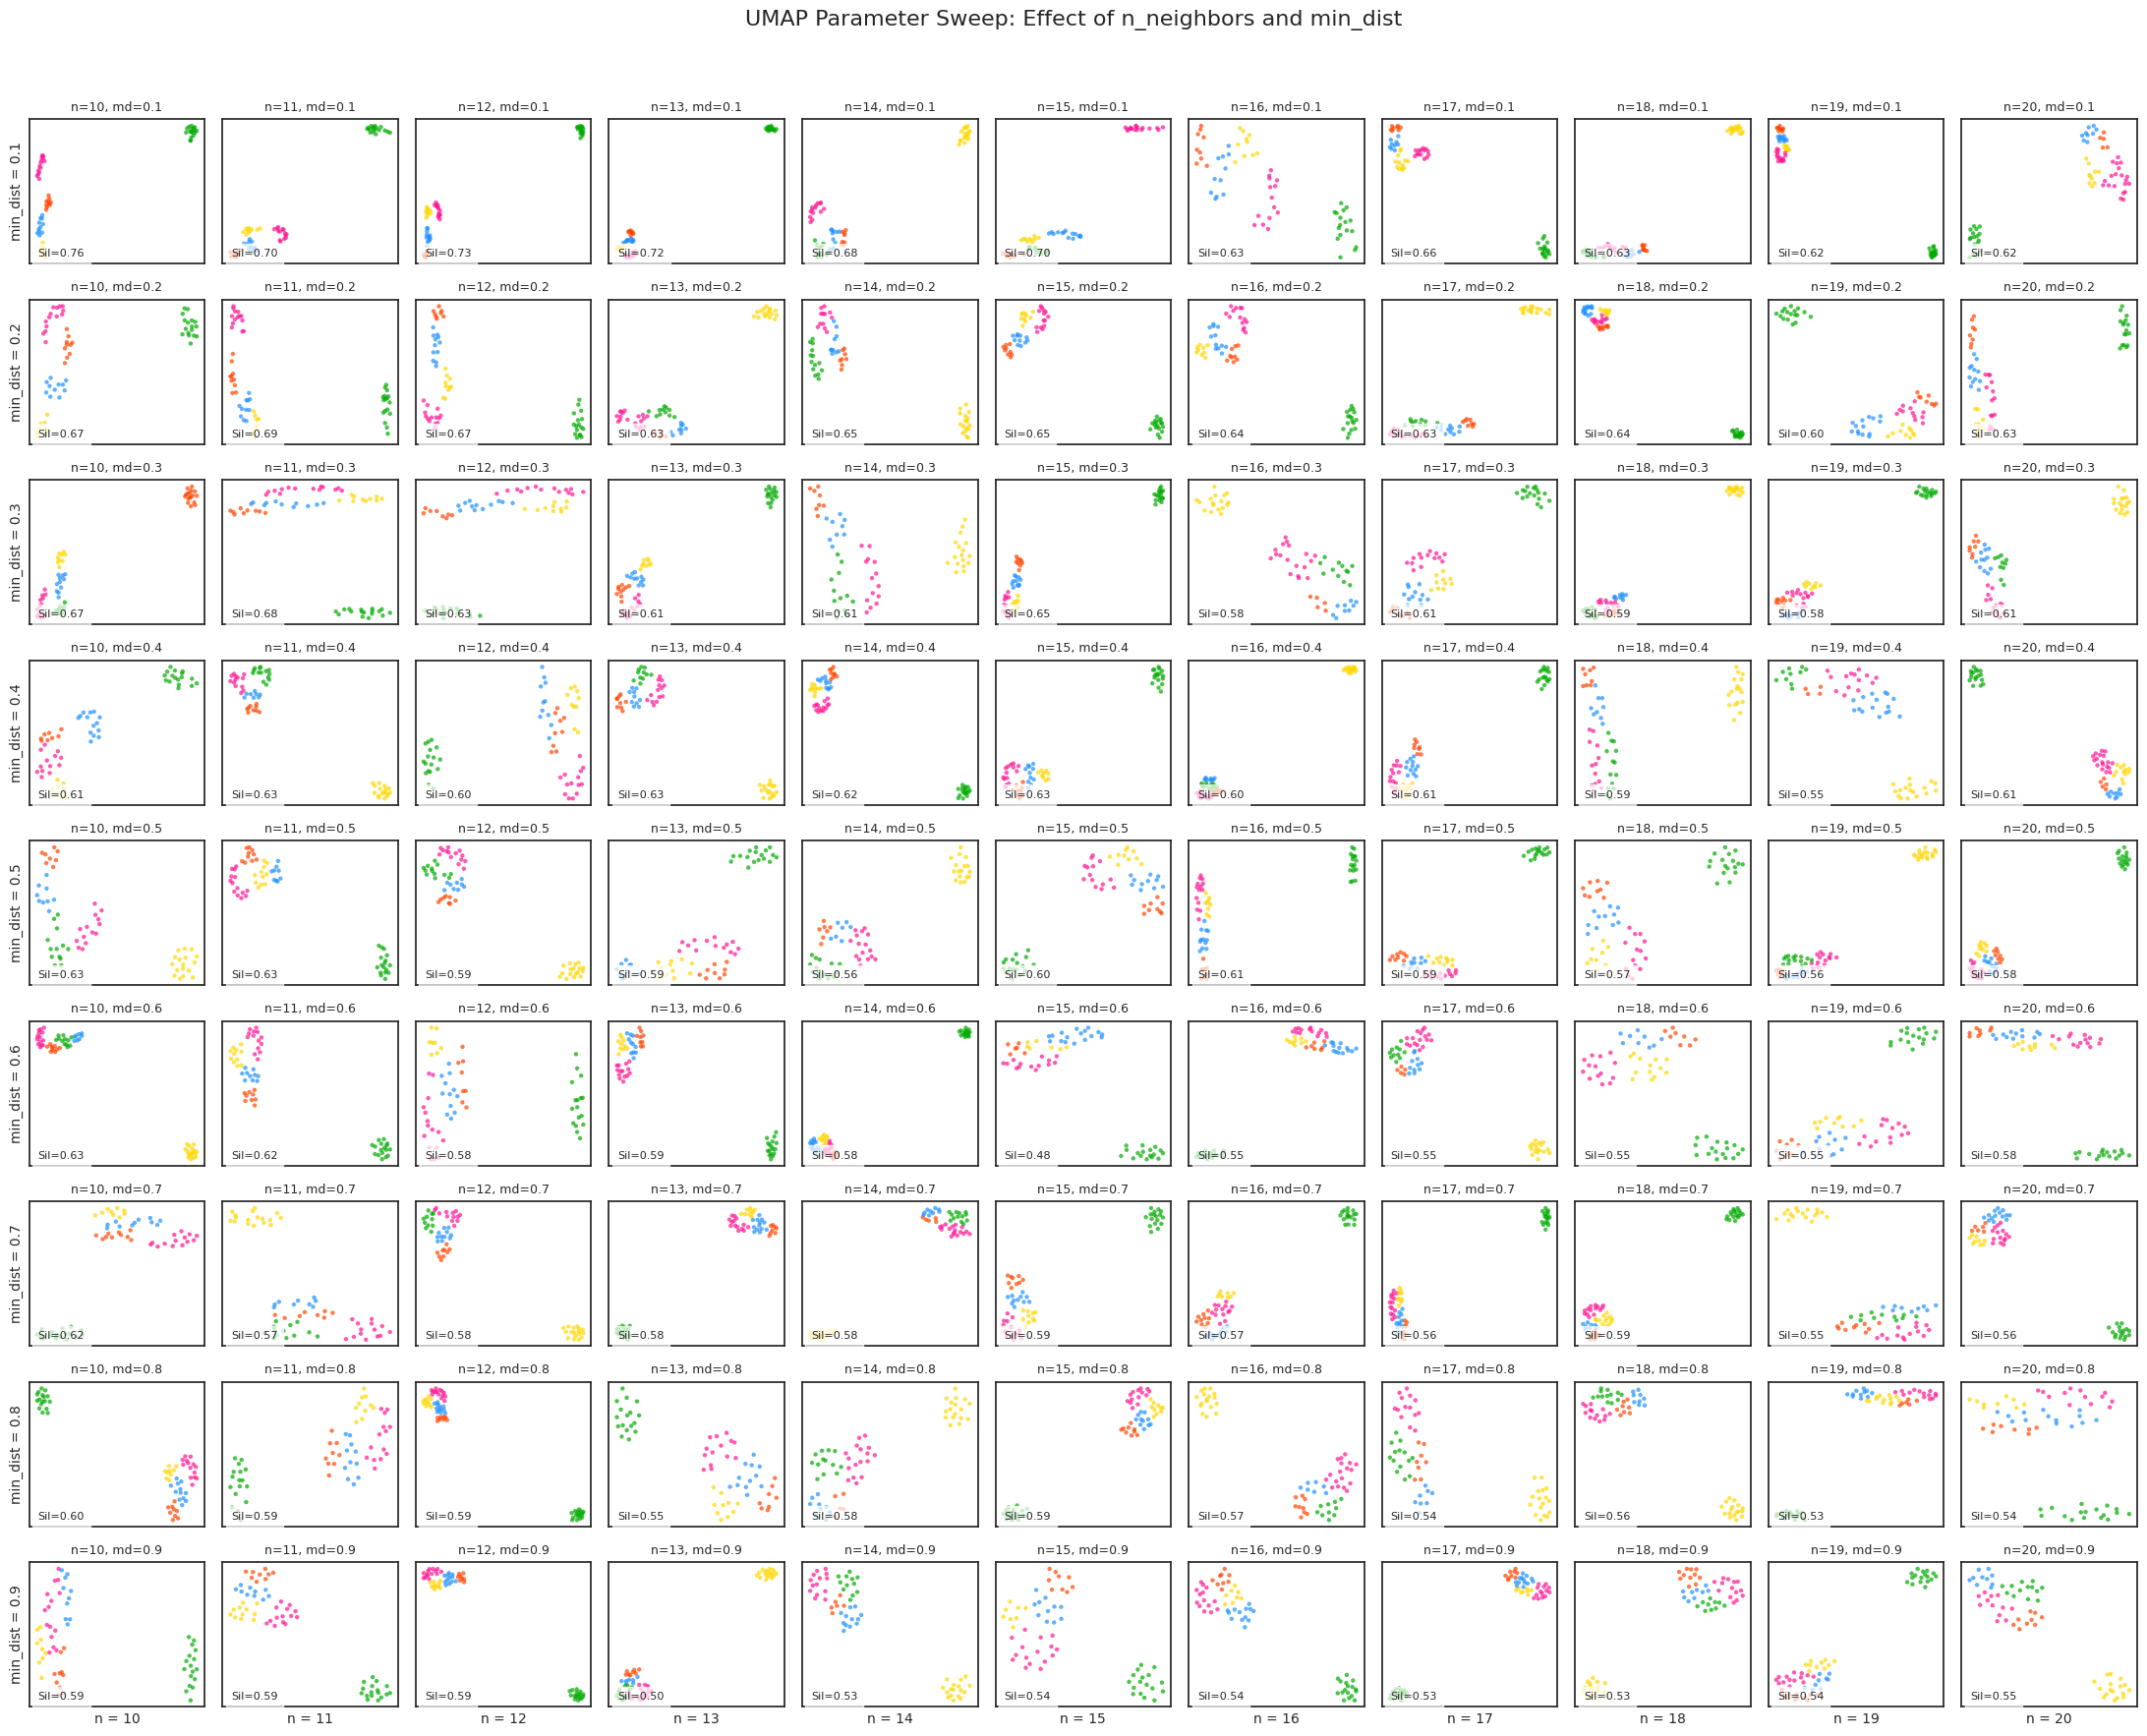

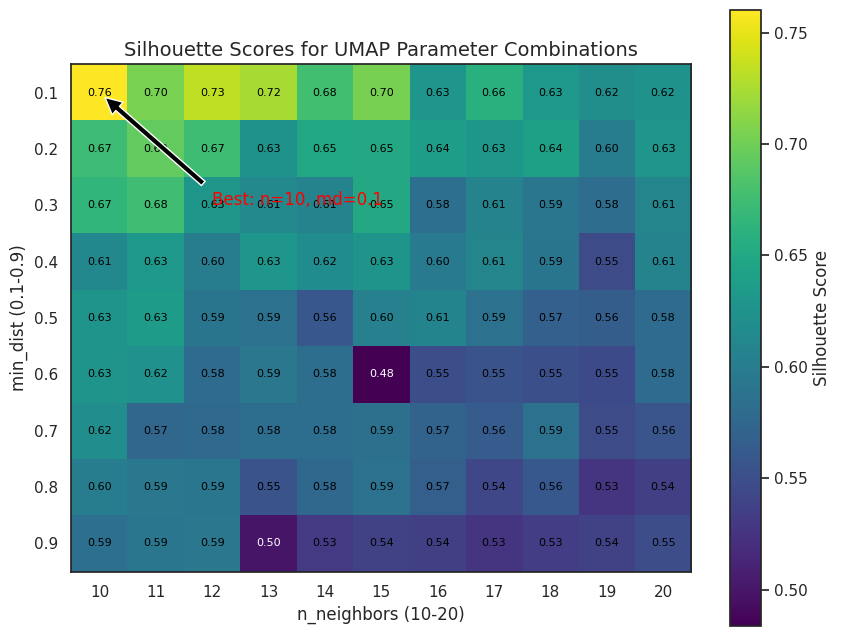

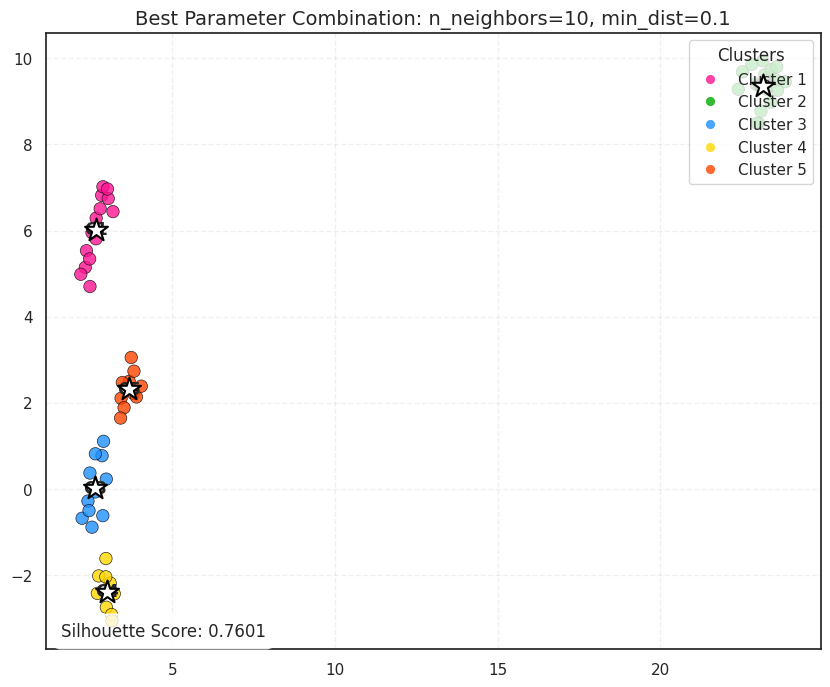

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

# If Data_v1.xlsx is not available, create synthetic data
try:
    data = pd.read_excel('updated_data_01.xlsx')
    print(f"Using real data with {data.shape[0]} rows")
except Exception as e:
    print(f"Creating synthetic data since real data couldn't be loaded: {e}")
    # Generate synthetic data
    np.random.seed(42)
    n_samples = 100
    synthetic_data = np.random.rand(n_samples, 5)
    data = pd.DataFrame(
        synthetic_data,
        columns=['Spatial_Proximity', 'Referential_Context', 'Environmental_Context',
                'Concreteness', 'Coherence']
    )
    data['idx'] = range(1, n_samples + 1)

# Create figure for grid of plots
fig, axes = plt.subplots(9, 11, figsize=(22, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Create empty container for silhouette scores
silhouette_scores = np.zeros((9, 11))

# Load the data
data = pd.read_excel('updated_data_01.xlsx')

# Extract features (same as in your original code)
features = ['Spatial_Proximity', 'Referential_Context', 'Environmental_Context',
            'Concreteness', 'Coherence']
X = data[features].values

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# Define color map similar to original code
vibrant_colors = ['#FF1493', '#00AA00', '#1E90FF', '#FFD700', '#FF4500']
cmap = ListedColormap(vibrant_colors)

# Iterate over parameter combinations
for i, min_dist in enumerate(np.arange(0.1, 1.0, 0.1)):
    for j, n_neighbors in enumerate(range(10, 21)):

        # Set up the subplot title
        axes[i, j].set_title(f'n={n_neighbors}, md={min_dist:.1f}', fontsize=9)

        # Apply UMAP with current parameters
        reducer = umap.UMAP(
            n_neighbors=n_neighbors,
            min_dist=min_dist,
            n_components=2,
            random_state=42
        )
        X_umap = reducer.fit_transform(X_scaled)

        # Apply clustering (same as original)
        n_clusters = 5
        hierarchical_clustering = AgglomerativeClustering(
            n_clusters=n_clusters,
            linkage='complete',
            distance_threshold=None
        )
        cluster_labels = hierarchical_clustering.fit_predict(X_umap)

        # Calculate silhouette score
        try:
            sil_score = silhouette_score(X_umap, cluster_labels)
            silhouette_scores[i, j] = sil_score
        except:
            silhouette_scores[i, j] = 0

        # Plot the points colored by cluster
        scatter = axes[i, j].scatter(
            X_umap[:, 0],
            X_umap[:, 1],
            c=cluster_labels,
            cmap=cmap,
            alpha=0.7,
            s=10,
            edgecolors='none'
        )

        # Display silhouette score on the plot
        axes[i, j].text(
            0.05, 0.05,
            f'Sil={sil_score:.2f}',
            transform=axes[i, j].transAxes,
            fontsize=8,
            bbox=dict(facecolor='white', alpha=0.7)
        )

        # Clean up axis labels
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

# Add a title for the figure
fig.suptitle('UMAP Parameter Sweep: Effect of n_neighbors and min_dist', fontsize=16)

# Add axis labels on the left and bottom
for i, min_dist in enumerate(np.arange(0.1, 1.0, 0.1)):
    axes[i, 0].set_ylabel(f'min_dist = {min_dist:.1f}', fontsize=10)

for j, n_neighbors in enumerate(range(10, 21)):
    axes[-1, j].set_xlabel(f'n = {n_neighbors}', fontsize=10)

# Create a separate figure for the heatmap of silhouette scores
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(silhouette_scores, cmap='viridis', interpolation='nearest')
plt.colorbar(heatmap, label='Silhouette Score')
plt.title('Silhouette Scores for UMAP Parameter Combinations', fontsize=14)
plt.xlabel('n_neighbors (10-20)', fontsize=12)
plt.ylabel('min_dist (0.1-0.9)', fontsize=12)

# Add tick labels
plt.xticks(np.arange(11), [str(n) for n in range(10, 21)])
plt.yticks(np.arange(9), [f'{d:.1f}' for d in np.arange(0.1, 1.0, 0.1)])

# Add silhouette score values to heatmap cells
for i in range(silhouette_scores.shape[0]):
    for j in range(silhouette_scores.shape[1]):
        if not np.isnan(silhouette_scores[i, j]):
            plt.text(j, i, f'{silhouette_scores[i, j]:.2f}',
                    ha="center", va="center", color="white" if silhouette_scores[i, j] < 0.5 else "black",
                    fontsize=8)

# Find the best parameter combination
best_i, best_j = np.unravel_index(np.argmax(silhouette_scores), silhouette_scores.shape)
best_min_dist = 0.1 + best_i * 0.1
best_n_neighbors = 10 + best_j

plt.annotate(f'Best: n={best_n_neighbors}, md={best_min_dist:.1f}',
            xy=(best_j, best_i), xytext=(best_j+2, best_i+2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, color='red')

# Save both figures
fig.tight_layout(rect=[0, 0, 1, 0.96])
fig.savefig('umap_parameter_grid.png', dpi=300, bbox_inches='tight')
plt.savefig('umap_silhouette_heatmap.png', dpi=300, bbox_inches='tight')

print(f"Best parameters: n_neighbors={best_n_neighbors}, min_dist={best_min_dist:.1f} with silhouette score {silhouette_scores[best_i, best_j]:.4f}")

# Demonstrate the best parameter combination with a larger plot
plt.figure(figsize=(10, 8))

# Apply UMAP with best parameters
reducer = umap.UMAP(
    n_neighbors=best_n_neighbors,
    min_dist=best_min_dist,
    n_components=2,
    random_state=42
)
X_umap = reducer.fit_transform(X_scaled)

# Apply clustering with best parameters
hierarchical_clustering = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='complete',
    distance_threshold=None
)
cluster_labels = hierarchical_clustering.fit_predict(X_umap)

# Plot the points colored by cluster
scatter = plt.scatter(
    X_umap[:, 0],
    X_umap[:, 1],
    c=cluster_labels,
    cmap=cmap,
    alpha=0.8,
    s=80,
    edgecolors='black',
    linewidths=0.5
)

# Add cluster centroids
for i in range(n_clusters):
    cluster_points = X_umap[cluster_labels == i]
    if len(cluster_points) > 0:
        centroid = np.mean(cluster_points, axis=0)
        plt.scatter(centroid[0], centroid[1],
                   marker='*', s=300, edgecolor='black',
                   facecolor='white', linewidth=1.5, zorder=10)
        plt.text(centroid[0], centroid[1], f'C{i+1}',
                ha='center', va='center', fontweight='bold', fontsize=12)

# Add silhouette score to the plot
best_silhouette = silhouette_score(X_umap, cluster_labels)
plt.text(0.02, 0.02, f'Silhouette Score: {best_silhouette:.4f}',
        transform=plt.gca().transAxes, fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

# Add legend
handles, labels = scatter.legend_elements()
legend_labels = [f'Cluster {i+1}' for i in range(len(handles))]
plt.legend(handles, legend_labels, title="Clusters", loc="upper right")

plt.title(f'Best Parameter Combination: n_neighbors={best_n_neighbors}, min_dist={best_min_dist:.1f}', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig('umap_best_parameters.png', dpi=300, bbox_inches='tight')

print("Analysis complete. Three images have been saved:")
print("1. umap_parameter_grid.png - Grid of all parameter combinations")
print("2. umap_silhouette_heatmap.png - Heatmap of silhouette scores")
print("3. umap_best_parameters.png - Detailed plot of best parameter combination")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1401: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


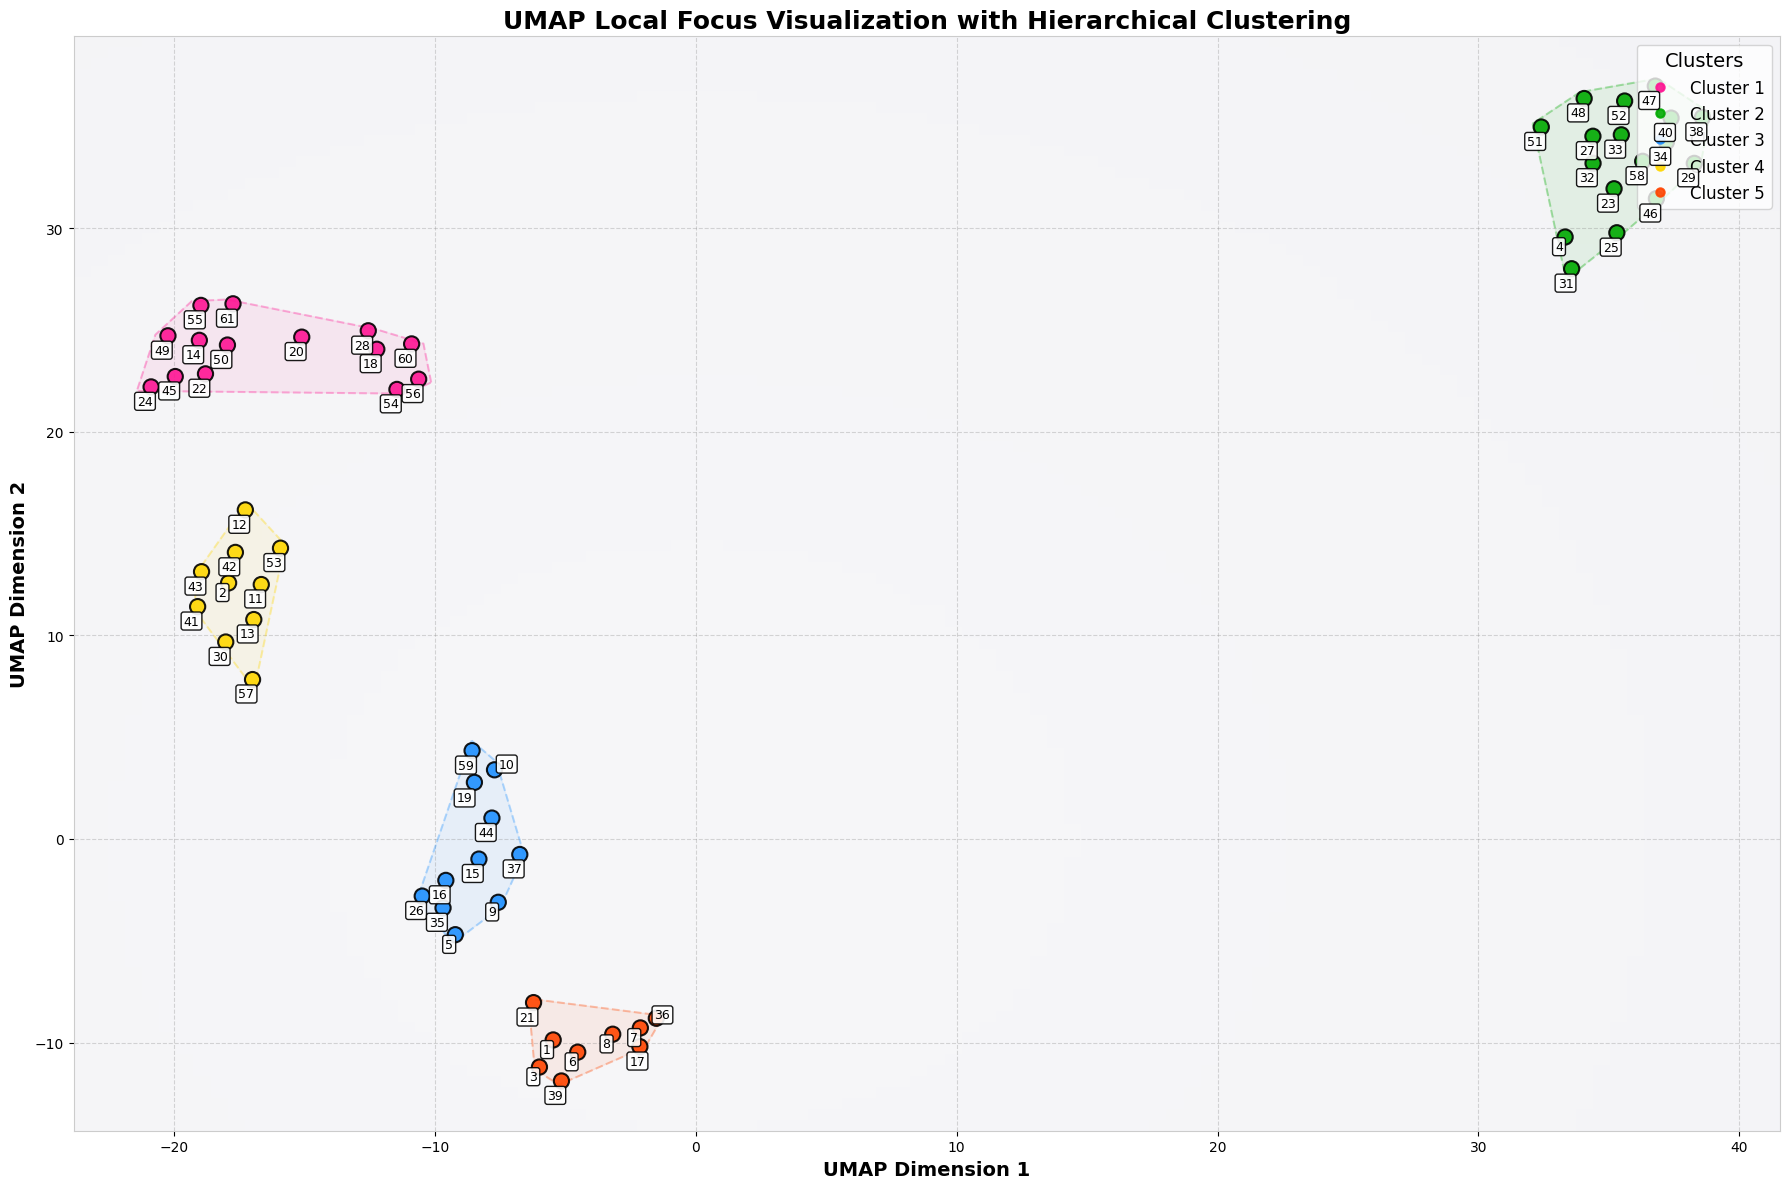

Number of items in each cluster:
Cluster 1: 14 papers
Cluster 2: 17 papers
Cluster 3: 11 papers
Cluster 4: 10 papers
Cluster 5: 9 papers

Cluster Centroids (Feature Statistics):

Cluster 1:
  Spatial_Proximity:
    Mean: 4.0000
    Min:  4.0000
    Max:  4.0000
  Referential_Context:
    Mean: 2.0000
    Min:  2.0000
    Max:  2.0000
  Environmental_Context:
    Mean: 1.5714
    Min:  1.0000
    Max:  3.0000
  Concreteness:
    Mean: 1.7143
    Min:  1.0000
    Max:  3.0000
  Coherence:
    Mean: 1.3571
    Min:  1.0000
    Max:  2.0000

Cluster 2:
  Spatial_Proximity:
    Mean: 2.5294
    Min:  1.0000
    Max:  3.0000
  Referential_Context:
    Mean: 2.0000
    Min:  2.0000
    Max:  2.0000
  Environmental_Context:
    Mean: 1.4118
    Min:  1.0000
    Max:  3.0000
  Concreteness:
    Mean: 1.2941
    Min:  1.0000
    Max:  3.0000
  Coherence:
    Mean: 1.1176
    Min:  1.0000
    Max:  2.0000

Cluster 3:
  Spatial_Proximity:
    Mean: 3.8182
    Min:  3.0000
    Max:  5.0000
  Refere

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import umap  # pip install umap-learn
from adjustText import adjust_text  # pip install adjustText
from scipy.spatial import ConvexHull
from sklearn.metrics import silhouette_score
from matplotlib.colors import LinearSegmentedColormap

# Load the data
data = pd.read_excel('updated_data_01.xlsx')

# Extract features
features = ['Spatial_Proximity', 'Referential_Context', 'Environmental_Context',
            'Concreteness', 'Coherence']
X = data[features].values

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# Perform UMAP dimensionality reduction with parameters to reduce overlapping
reducer = umap.UMAP(
    n_neighbors=10,        # Slightly larger value for better global structure
    min_dist=0.1,          # Larger min_dist to prevent overlapping points
    spread=4.0,            # Increased spread for better separation
    n_components=2,
    repulsion_strength=1.8, # Add repulsion to push points apart
    metric='euclidean',
    random_state=42
)
X_umap = reducer.fit_transform(X_scaled)

# Apply Hierarchical Clustering based on UMAP positions
n_clusters = 5
hierarchical_clustering = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='complete',    # Using 'complete' linkage for better separation
    distance_threshold=None
)
cluster_labels = hierarchical_clustering.fit_predict(X_umap)

# (Optional) Post-processing to reassign boundary points closer to other centroids
cluster_centroids = []
for i in range(n_clusters):
    cluster_points = X_umap[cluster_labels == i]
    centroid = np.mean(cluster_points, axis=0)
    cluster_centroids.append(centroid)

for i in range(len(X_umap)):
    distances = [np.linalg.norm(X_umap[i] - centroid) for centroid in cluster_centroids]
    closest_centroid = np.argmin(distances)
    if cluster_labels[i] != closest_centroid:
        current_dist = distances[cluster_labels[i]]
        closest_dist = distances[closest_centroid]
        # If the point is very close to the boundary, reassign it
        if closest_dist < current_dist * 0.95:
            cluster_labels[i] = closest_centroid

# Create a new column "cluster" in 'data' starting with label 1 instead of 0
data['cluster'] = cluster_labels + 1

# —————————————————————————————————————————————
# Visualize the clusters in UMAP space
# —————————————————————————————————————————————
vibrant_colors = ['#FF1493', '#00AA00', '#1E90FF', '#FFD700',
                  '#FF4500', '#8A2BE2', '#00FFFF', '#FF00FF']
cmap = ListedColormap(vibrant_colors[:n_clusters])

plt.figure(figsize=(18, 12), facecolor='white')

# Jitter points to reduce overlaps
jitter_amount = 0.05
X_umap_jittered = X_umap.copy()
X_umap_jittered += np.random.normal(0, jitter_amount, X_umap.shape)

# Use cluster_labels + 1 for display (1-based indexing)
scatter = plt.scatter(X_umap_jittered[:, 0],
                      X_umap_jittered[:, 1],
                      c=cluster_labels,  # Keep 0-based for colors
                      cmap=cmap,
                      alpha=0.9,
                      s=120,
                      edgecolors='black',
                      linewidths=1.5,
                      zorder=5)

# Compute cluster centroids
centroids = []
for i in range(n_clusters):
    cluster_points = X_umap[cluster_labels == i]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

# Add texts for each data point (idx)
texts = []
for i, idx in enumerate(data['idx']):
    texts.append(plt.text(X_umap_jittered[i, 0],
                          X_umap_jittered[i, 1] - 0.3,
                          str(idx),
                          fontsize=9,
                          ha='center',
                          va='center',
                          bbox=dict(boxstyle='round,pad=0.2',
                                    fc='white', ec='black', alpha=0.9),
                          zorder=15))

# Adjust text to reduce overlap
adjust_text(texts,
            arrowprops=dict(arrowstyle='->', color='black', lw=0.8),
            expand_points=(3.0, 3.0),
            force_points=(0.5, 0.5),
            force_text=(1.0, 1.0),
            force_objects=(1.5, 1.5),
            lim=2000,
            only_move={'points': 'xy', 'texts': 'xy', 'objects': 'xy'},
            autoalign='xy')

# Update the legend to use 1-indexed labels
handles, labels = scatter.legend_elements()
# Create custom labels with 1-indexed values (1 to 6 instead of 0 to 5)
new_labels = [f'Cluster {i+1}' for i in range(len(labels))]
plt.legend(handles, new_labels, title="Clusters", loc="upper right",
           fontsize=12, title_fontsize=14)

plt.title('UMAP Local Focus Visualization with Hierarchical Clustering',
          fontsize=18, fontweight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=14, fontweight='bold')
plt.ylabel('UMAP Dimension 2', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.gca().set_facecolor('whitesmoke')

# Subtle gradient background
gradient_colors = [(0.98, 0.98, 1), (0.95, 0.95, 0.98)]
gradient_cmap = LinearSegmentedColormap.from_list('subtle_gradient',
                                                 gradient_colors)

nx, ny = 100, 100
x = np.linspace(plt.xlim()[0], plt.xlim()[1], nx)
y = np.linspace(plt.ylim()[0], plt.ylim()[1], ny)
Xg, Yg = np.meshgrid(x, y)
R = np.sqrt((Xg)**2 + (Yg)**2)
Z = R / np.max(R)
plt.imshow(Z, extent=[plt.xlim()[0], plt.xlim()[1], plt.ylim()[0], plt.ylim()[1]],
           origin='lower', cmap=gradient_cmap, alpha=0.4, aspect='auto', zorder=0)

# Draw convex hulls for each cluster
for i in range(n_clusters):
    cluster_points = X_umap_jittered[cluster_labels == i]
    if len(cluster_points) >= 5:
        try:
            hull = ConvexHull(cluster_points)
            hull_points = cluster_points[hull.vertices]
            centroid = np.mean(hull_points, axis=0)
            hull_points_padded = centroid + 1.1 * (hull_points - centroid)
            plt.fill(hull_points_padded[:, 0], hull_points_padded[:, 1],
                     color=vibrant_colors[i], alpha=0.07, zorder=1)
            plt.plot(np.append(hull_points_padded[:, 0], hull_points_padded[0, 0]),
                     np.append(hull_points_padded[:, 1], hull_points_padded[0, 1]),
                     color=vibrant_colors[i],
                     alpha=0.3,
                     linestyle='--',
                     linewidth=1.5,
                     zorder=2)
        except:
            pass

plt.tight_layout()

# Get the actual min and max of the data points (not the automatic plot limits)
x_min_data = np.min(X_umap_jittered[:, 0])
x_max_data = np.max(X_umap_jittered[:, 0])
y_min_data = np.min(X_umap_jittered[:, 1])
y_max_data = np.max(X_umap_jittered[:, 1])

# Add just a small padding (5% instead of 15% and 25%)
x_padding = (x_max_data - x_min_data) * 0.05
y_padding = (y_max_data - y_min_data) * 0.05

# Set the limits to tightly bound the data
plt.xlim(x_min_data - x_padding, x_max_data + x_padding)
plt.ylim(y_min_data - y_padding, y_max_data + y_padding)

plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['top'].set_color('#cccccc')
plt.gca().spines['right'].set_color('#cccccc')
plt.gca().spines['bottom'].set_color('#cccccc')
plt.gca().spines['left'].set_color('#cccccc')

plt.savefig('umap_enhanced_theme.png', dpi=300, bbox_inches='tight')
plt.show()

# Print cluster statistics with 1-based indexing
print("Number of items in each cluster:")
for i in range(n_clusters):
    print(f"Cluster {i+1}: {sum(cluster_labels == i)} papers")


# Print average feature values for each cluster with 1-based indexing
# Now including min and max values along with means
print("\nCluster Centroids (Feature Statistics):")
for i in range(n_clusters):
    print(f"\nCluster {i+1}:")
    cluster_indices = np.where(cluster_labels == i)[0]
    if len(cluster_indices) > 0:
        cluster_items = X[cluster_indices]
        for j, feature in enumerate(features):
            feature_values = cluster_items[:, j]
            print(f"  {feature}:")
            print(f"    Mean: {np.mean(feature_values):.4f}")
            print(f"    Min:  {np.min(feature_values):.4f}")
            print(f"    Max:  {np.max(feature_values):.4f}")
    else:
        print("  No items in this cluster")

# Save updated data to a new Excel
data.to_excel("Data_v2.xlsx", index=False)
print("\nData saved with a new 'cluster' column to 'Data_v2.xlsx'.")

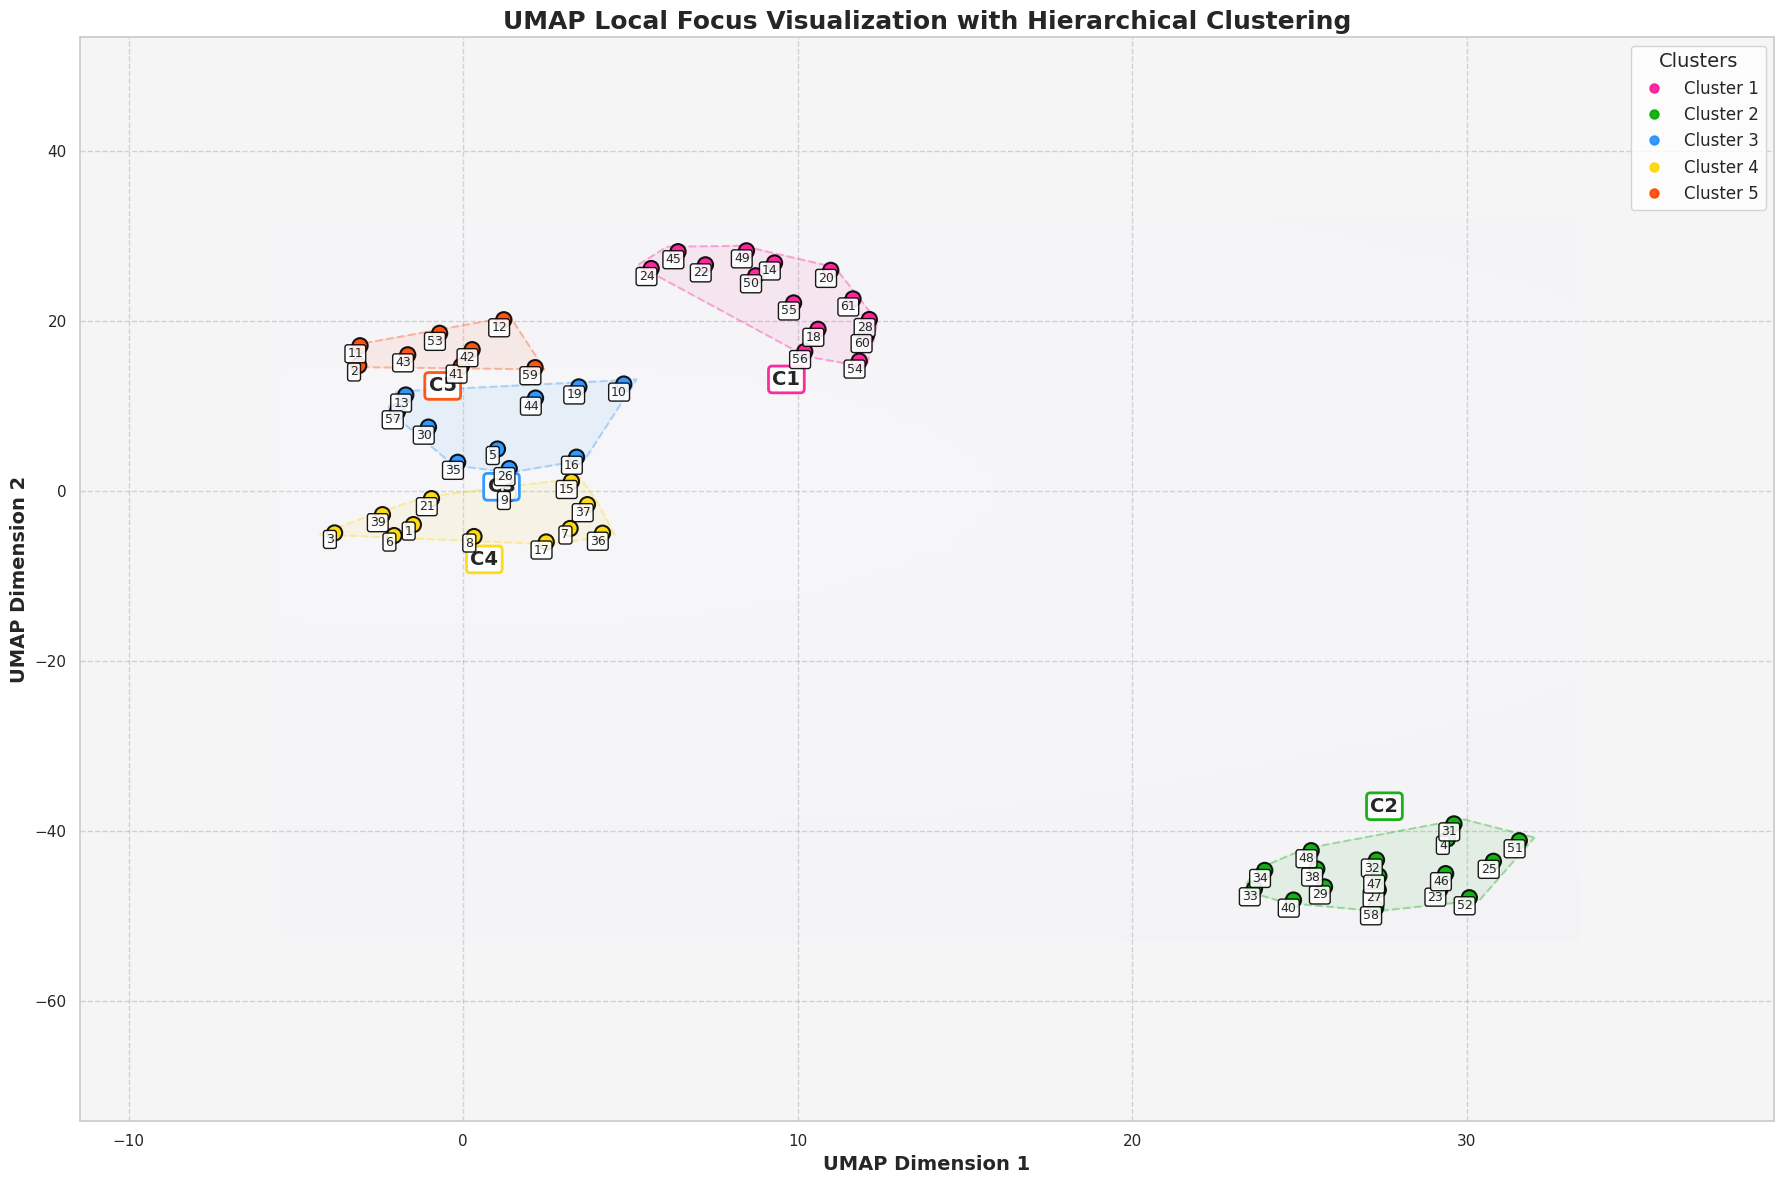

Number of items in each cluster:
Cluster 1: 14 papers
Cluster 2: 17 papers
Cluster 3: 10 papers
Cluster 4: 12 papers
Cluster 5: 8 papers
Silhouette Score: 0.5921

Cluster Centroids (Feature Means):

Cluster 1:
  Spatial_Proximity: 4.0000
  Referential_Context: 2.0000
  Environmental_Context: 1.5714
  Concreteness: 1.7143
  Coherence: 1.3571

Cluster 2:
  Spatial_Proximity: 2.5294
  Referential_Context: 2.0000
  Environmental_Context: 1.4118
  Concreteness: 1.2941
  Coherence: 1.1176

Cluster 3:
  Spatial_Proximity: 3.8000
  Referential_Context: 3.8000
  Environmental_Context: 3.3000
  Concreteness: 2.8000
  Coherence: 2.3000

Cluster 4:
  Spatial_Proximity: 3.5833
  Referential_Context: 3.6667
  Environmental_Context: 4.8333
  Concreteness: 4.7500
  Coherence: 4.1667

Cluster 5:
  Spatial_Proximity: 4.6250
  Referential_Context: 3.8750
  Environmental_Context: 1.1250
  Concreteness: 1.5000
  Coherence: 3.7500

Data saved with a new 'cluster' column to 'Data_v2.xlsx'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import umap  # pip install umap-learn
from adjustText import adjust_text  # pip install adjustText

# Load the data
data = pd.read_excel('Data_v1.xlsx')

# Extract features
features = ['Spatial_Proximity', 'Referential_Context', 'Environmental_Context',
            'Concreteness', 'Coherence']
X = data[features].values

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# Perform UMAP dimensionality reduction with parameters to reduce overlapping
reducer = umap.UMAP(
    n_neighbors=11,        # Slightly larger value for better global structure
    min_dist=0.67,          # Larger min_dist to prevent overlapping points
    spread=4.0,            # Increased spread for better separation
    n_components=2,
    repulsion_strength=1.8, # Add repulsion to push points apart
    metric='euclidean',
    random_state=42
)
X_umap = reducer.fit_transform(X_scaled)

# Apply Hierarchical Clustering based on UMAP positions
n_clusters = 5
hierarchical_clustering = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='complete',    # Using 'complete' linkage for better separation
    distance_threshold=None
)
cluster_labels = hierarchical_clustering.fit_predict(X_umap)

# (Optional) Post-processing to reassign boundary points closer to other centroids
cluster_centroids = []
for i in range(n_clusters):
    cluster_points = X_umap[cluster_labels == i]
    centroid = np.mean(cluster_points, axis=0)
    cluster_centroids.append(centroid)

for i in range(len(X_umap)):
    distances = [np.linalg.norm(X_umap[i] - centroid) for centroid in cluster_centroids]
    closest_centroid = np.argmin(distances)
    if cluster_labels[i] != closest_centroid:
        current_dist = distances[cluster_labels[i]]
        closest_dist = distances[closest_centroid]
        # If the point is very close to the boundary, reassign it
        if closest_dist < current_dist * 0.95:
            cluster_labels[i] = closest_centroid

# Create a new column "cluster" in 'data' starting with label 1 instead of 0
data['cluster'] = cluster_labels + 1

# —————————————————————————————————————————————
# Visualize the clusters in UMAP space (optional)
# —————————————————————————————————————————————
vibrant_colors = ['#FF1493', '#00AA00', '#1E90FF', '#FFD700',
                  '#FF4500', '#8A2BE2', '#00FFFF', '#FF00FF']
cmap = ListedColormap(vibrant_colors[:n_clusters])

plt.figure(figsize=(18, 12), facecolor='white')

# Jitter points to reduce overlaps
jitter_amount = 0.05
X_umap_jittered = X_umap.copy()
X_umap_jittered += np.random.normal(0, jitter_amount, X_umap.shape)

# Use cluster_labels + 1 for display (1-based indexing)
scatter = plt.scatter(X_umap_jittered[:, 0],
                      X_umap_jittered[:, 1],
                      c=cluster_labels,  # Keep 0-based for colors
                      cmap=cmap,
                      alpha=0.9,
                      s=120,
                      edgecolors='black',
                      linewidths=1.5,
                      zorder=5)

# Compute and plot cluster centroids with improved label placement
centroids = []
for i in range(n_clusters):
    cluster_points = X_umap[cluster_labels == i]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

    # Calculate the bounding box of the cluster
    if len(cluster_points) > 0:
        min_x = np.min(cluster_points[:, 0])
        max_x = np.max(cluster_points[:, 0])
        min_y = np.min(cluster_points[:, 1])
        max_y = np.max(cluster_points[:, 1])

        # Calculate width and height of the cluster
        width = max_x - min_x
        height = max_y - min_y

        # Calculate space around the cluster in each direction
        # Get current plot limits to determine available space
        x_min, x_max = plt.xlim()
        y_min, y_max = plt.ylim()

        space_left = min_x - x_min
        space_right = x_max - max_x
        space_top = y_max - max_y
        space_bottom = min_y - y_min

        # Only consider top and bottom for placement
        spaces = [
            ('top', space_top),
            ('bottom', space_bottom)
        ]

        # Sort by available space (descending)
        spaces.sort(key=lambda x: x[1], reverse=True)
        best_direction = spaces[0][0]

        # Set a smaller margin
        margin = 1  # Reduced fixed margin

        # Position label based on the chosen direction (only top or bottom)
        label_position = centroid.copy()

        if best_direction == 'top':
            label_position[1] = max_y + margin
            ha, va = 'center', 'bottom'
        else:  # bottom
            label_position[1] = min_y - margin
            ha, va = 'center', 'top'
    else:
        # Fallback for empty clusters
        label_position = centroid.copy()
        ha, va = 'center', 'center'

    # Use i+1 for the cluster label text (1-based)
    plt.text(label_position[0], label_position[1],
             f"C{i+1}",
             fontsize=14,
             fontweight='bold',
             ha=ha,
             va=va,
             zorder=11,
             bbox=dict(boxstyle='round,pad=0.2',
                       fc='white',
                       ec=vibrant_colors[i],
                       alpha=0.9,
                       linewidth=2))

#Diegetic Values
# Add texts for each data point (idx)
texts = []
for i, idx in enumerate(data['idx']):
    texts.append(plt.text(X_umap_jittered[i, 0],
                          X_umap_jittered[i, 1] - 0.3,
                          str(idx),
                          fontsize=9,
                          ha='center',
                          va='center',
                          bbox=dict(boxstyle='round,pad=0.2',
                                    fc='white', ec='black', alpha=0.9),
                          zorder=15))

# Adjust text to reduce overlap
from adjustText import adjust_text
adjust_text(texts,
            arrowprops=dict(arrowstyle='->', color='black', lw=0.8),
            expand_points=(3.0, 3.0),
            force_points=(0.5, 0.5),
            force_text=(1.0, 1.0),
            force_objects=(1.5, 1.5),
            lim=2000,
            only_move={'points': 'xy', 'texts': 'xy', 'objects': 'xy'},
            autoalign='xy')

# Update the legend to use 1-indexed labels
handles, labels = scatter.legend_elements()
# Create custom labels with 1-indexed values (1 to 6 instead of 0 to 5)
new_labels = [f'Cluster {i+1}' for i in range(len(labels))]
plt.legend(handles, new_labels, title="Clusters", loc="upper right",
           fontsize=12, title_fontsize=14)

plt.title('UMAP Local Focus Visualization with Hierarchical Clustering',
          fontsize=18, fontweight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=14, fontweight='bold')
plt.ylabel('UMAP Dimension 2', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.gca().set_facecolor('whitesmoke')

# Subtle gradient background
from matplotlib.colors import LinearSegmentedColormap
gradient_colors = [(0.98, 0.98, 1), (0.95, 0.95, 0.98)]
gradient_cmap = LinearSegmentedColormap.from_list('subtle_gradient',
                                                 gradient_colors)

nx, ny = 100, 100
x = np.linspace(plt.xlim()[0], plt.xlim()[1], nx)
y = np.linspace(plt.ylim()[0], plt.ylim()[1], ny)
Xg, Yg = np.meshgrid(x, y)
R = np.sqrt((Xg)**2 + (Yg)**2)
Z = R / np.max(R)
plt.imshow(Z, extent=[plt.xlim()[0], plt.xlim()[1], plt.ylim()[0], plt.ylim()[1]],
           origin='lower', cmap=gradient_cmap, alpha=0.4, aspect='auto', zorder=0)

# Draw convex hulls for each cluster
from scipy.spatial import ConvexHull
for i in range(n_clusters):
    cluster_points = X_umap_jittered[cluster_labels == i]
    if len(cluster_points) >= 5:
        try:
            hull = ConvexHull(cluster_points)
            hull_points = cluster_points[hull.vertices]
            centroid = np.mean(hull_points, axis=0)
            hull_points_padded = centroid + 1.1 * (hull_points - centroid)
            plt.fill(hull_points_padded[:, 0], hull_points_padded[:, 1],
                     color=vibrant_colors[i], alpha=0.07, zorder=1)
            plt.plot(np.append(hull_points_padded[:, 0], hull_points_padded[0, 0]),
                     np.append(hull_points_padded[:, 1], hull_points_padded[0, 1]),
                     color=vibrant_colors[i],
                     alpha=0.3,
                     linestyle='--',
                     linewidth=1.5,
                     zorder=2)
        except:
            pass

plt.tight_layout()
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_padding = (x_max - x_min) * 0.15
y_padding = (y_max - y_min) * 0.25
plt.xlim(x_min - x_padding, x_max + x_padding)
plt.ylim(y_min - y_padding, y_max + y_padding)

plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['top'].set_color('#cccccc')
plt.gca().spines['right'].set_color('#cccccc')
plt.gca().spines['bottom'].set_color('#cccccc')
plt.gca().spines['left'].set_color('#cccccc')

plt.savefig('umap_enhanced_theme.png', dpi=300, bbox_inches='tight')
plt.show()

# Print cluster statistics with 1-based indexing
print("Number of items in each cluster:")
for i in range(n_clusters):
    print(f"Cluster {i+1}: {sum(cluster_labels == i)} papers")

# Calculate and print silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_umap, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Print average feature values for each cluster with 1-based indexing
print("\nCluster Centroids (Feature Means):")
for i in range(n_clusters):
    print(f"\nCluster {i+1}:")
    cluster_indices = np.where(cluster_labels == i)[0]
    if len(cluster_indices) > 0:
        cluster_items = X[cluster_indices]
        for j, feature in enumerate(features):
            print(f"  {feature}: {np.mean(cluster_items[:, j]):.4f}")
    else:
        print("  No items in this cluster")

# ——————————————————————————————
# Save updated data to a new Excel
# ——————————————————————————————
data.to_excel("Data_v2.xlsx", index=False)
print("\nData saved with a new 'cluster' column to 'Data_v2.xlsx'.")

In [1]:
pip install adjustText

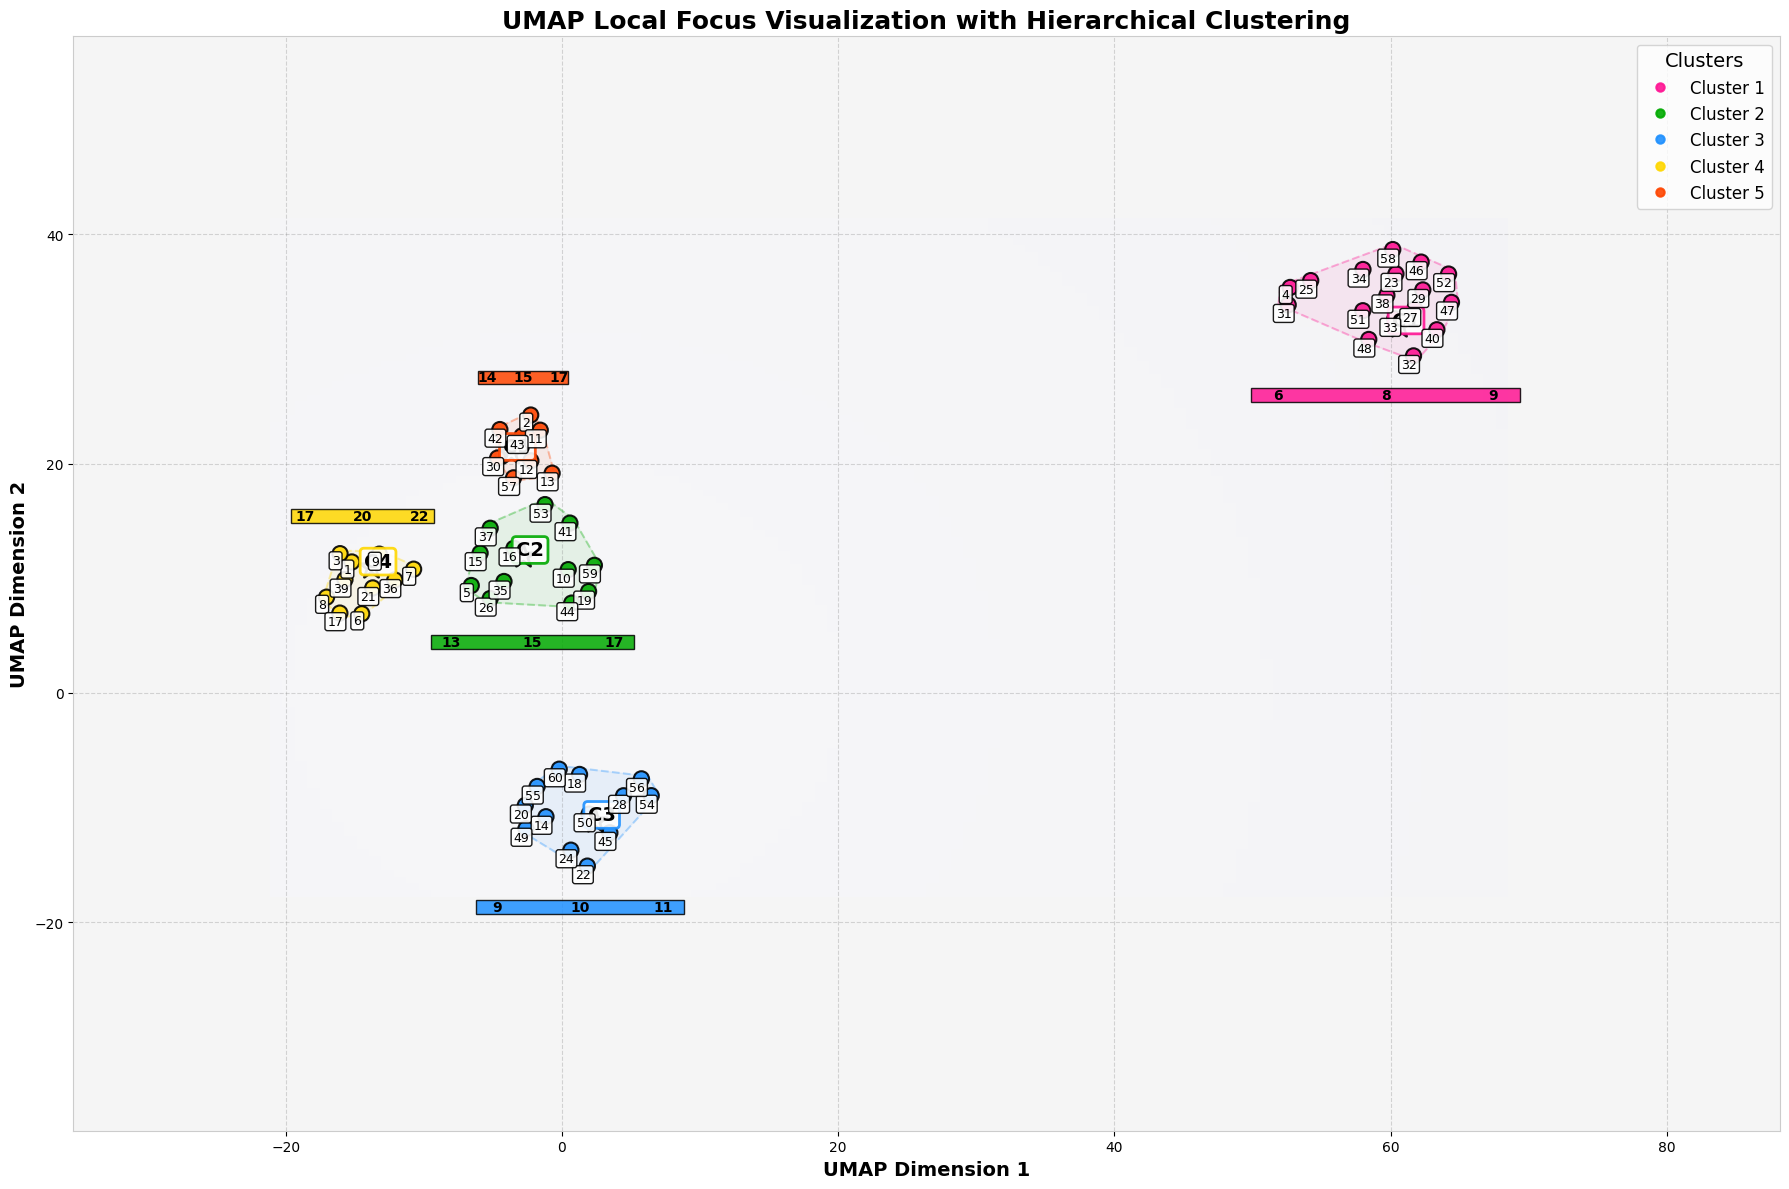

Number of items in each cluster:
Cluster 1: 17 papers
Cluster 2: 12 papers
Cluster 3: 13 papers
Cluster 4: 10 papers
Cluster 5: 8 papers
Silhouette Score: 0.7082

Cluster Centroids (Feature Means):

Cluster 1:
  Spatial_Proximity: 2.5294
  Referential_Context: 2.0000
  Environmental_Context: 1.1765
  Concreteness: 1.2059
  Coherence: 1.1176

Cluster 2:
  Spatial_Proximity: 4.0000
  Referential_Context: 3.3333
  Environmental_Context: 2.3333
  Concreteness: 3.2500
  Coherence: 2.1667

Cluster 3:
  Spatial_Proximity: 3.8462
  Referential_Context: 2.0000
  Environmental_Context: 1.3846
  Concreteness: 1.6154
  Coherence: 1.3846

Cluster 4:
  Spatial_Proximity: 3.3500
  Referential_Context: 3.1000
  Environmental_Context: 3.7500
  Concreteness: 4.9000
  Coherence: 4.6500

Cluster 5:
  Spatial_Proximity: 4.5000
  Referential_Context: 3.0000
  Environmental_Context: 3.0000
  Concreteness: 1.0000
  Coherence: 3.8125

Diegetic Values Statistics by Cluster (using 'Diegetic Values' column):
Clus

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import umap  # pip install umap-learn
from adjustText import adjust_text  # pip install adjustText
from scipy.spatial import ConvexHull, distance_matrix

# Load the data
data = pd.read_excel('Data_v1.xlsx')

# Extract features
features = ['Spatial_Proximity', 'Referential_Context', 'Environmental_Context',
            'Concreteness', 'Coherence']
X = data[features].values

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# Perform UMAP dimensionality reduction with parameters to reduce overlapping
reducer = umap.UMAP(
    n_neighbors=11,        # Slightly larger value for better global structure
    min_dist=0.1,          # Larger min_dist to prevent overlapping points
    spread=5.2,            # Increased spread for better separation
    n_components=2,
    repulsion_strength=2.0, # Add repulsion to push points apart
    metric='euclidean',
    random_state=42
)
X_umap = reducer.fit_transform(X_scaled)

# Apply Hierarchical Clustering based on UMAP positions
n_clusters = 5
hierarchical_clustering = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='complete',    # Using 'complete' linkage for better separation
    distance_threshold=None
)
cluster_labels = hierarchical_clustering.fit_predict(X_umap)

# (Optional) Post-processing to reassign boundary points closer to other centroids
cluster_centroids = []
for i in range(n_clusters):
    cluster_points = X_umap[cluster_labels == i]
    centroid = np.mean(cluster_points, axis=0)
    cluster_centroids.append(centroid)

for i in range(len(X_umap)):
    distances = [np.linalg.norm(X_umap[i] - centroid) for centroid in cluster_centroids]
    closest_centroid = np.argmin(distances)
    if cluster_labels[i] != closest_centroid:
        current_dist = distances[cluster_labels[i]]
        closest_dist = distances[closest_centroid]
        # If the point is very close to the boundary, reassign it
        if closest_dist < current_dist * 0.95:
            cluster_labels[i] = closest_centroid

# Create a new column "cluster" in 'data' starting with label 1 instead of 0
data['cluster'] = cluster_labels + 1

# —————————————————————————————————————————————
# Visualize the clusters in UMAP space (optional)
# —————————————————————————————————————————————
vibrant_colors = ['#FF1493', '#00AA00', '#1E90FF', '#FFD700',
                  '#FF4500', '#8A2BE2', '#00FFFF', '#FF00FF']
cmap = ListedColormap(vibrant_colors[:n_clusters])

plt.figure(figsize=(18, 12), facecolor='white')

# Jitter points to reduce overlaps
jitter_amount = 0.05
X_umap_jittered = X_umap.copy()
X_umap_jittered += np.random.normal(0, jitter_amount, X_umap.shape)

# Use cluster_labels + 1 for display (1-based indexing)
scatter = plt.scatter(X_umap_jittered[:, 0],
                      X_umap_jittered[:, 1],
                      c=cluster_labels,  # Keep 0-based for colors
                      cmap=cmap,
                      alpha=0.9,
                      s=120,
                      edgecolors='black',
                      linewidths=1.5,
                      zorder=5)

# Compute and plot cluster centroids
centroids = []
for i in range(n_clusters):
    cluster_points = X_umap[cluster_labels == i]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

    # Example logic for star positioning and labeling
    if len(cluster_points) > 3:
        dist_matrix = distance_matrix(cluster_points, cluster_points)
        min_distances = np.min(dist_matrix + np.eye(len(dist_matrix)) * 999, axis=1)
        best_idx = np.argmax(min_distances)
        star_position = cluster_points[best_idx]
        star_position = (star_position + centroid) / 2
    else:
        offset = np.array([0.5, 0.5])
        star_position = centroid + offset

    plt.scatter(star_position[0], star_position[1],
                s=300, marker='*', color='white',
                edgecolors='black', linewidths=2,
                zorder=10, alpha=0.9)

    text_offset = np.array([0.5, 0.5])
    text_position = star_position + text_offset

    # Use i+1 for the cluster label text (1-based)
    plt.text(text_position[0], text_position[1],
             f"C{i+1}",
             fontsize=14,
             fontweight='bold',
             ha='center',
             va='center',
             zorder=11,
             bbox=dict(boxstyle='round,pad=0.2',
                       fc='white',
                       ec=vibrant_colors[i],
                       alpha=0.9,
                       linewidth=2))

# Add texts for each data point (idx)
texts = []
for i, idx in enumerate(data['idx']):
    texts.append(plt.text(X_umap_jittered[i, 0],
                          X_umap_jittered[i, 1] - 0.3,
                          str(idx),
                          fontsize=9,
                          ha='center',
                          va='center',
                          bbox=dict(boxstyle='round,pad=0.2',
                                    fc='white', ec='black', alpha=0.9),
                          zorder=15))

# Adjust text to reduce overlap
adjust_text(texts,
            arrowprops=dict(arrowstyle='->', color='black', lw=0.8),
            expand_points=(3.0, 3.0),
            force_points=(0.5, 0.5),
            force_text=(1.0, 1.0),
            force_objects=(1.5, 1.5),
            lim=2000,
            only_move={'points': 'xy', 'texts': 'xy', 'objects': 'xy'},
            autoalign='xy')

# Update the legend to use 1-indexed labels
handles, labels = scatter.legend_elements()
# Create custom labels with 1-indexed values (1 to 6 instead of 0 to 5)
new_labels = [f'Cluster {i+1}' for i in range(len(labels))]
plt.legend(handles, new_labels, title="Clusters", loc="upper right",
           fontsize=12, title_fontsize=14)

plt.title('UMAP Local Focus Visualization with Hierarchical Clustering',
          fontsize=18, fontweight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=14, fontweight='bold')
plt.ylabel('UMAP Dimension 2', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.gca().set_facecolor('whitesmoke')

# Subtle gradient background
from matplotlib.colors import LinearSegmentedColormap
gradient_colors = [(0.98, 0.98, 1), (0.95, 0.95, 0.98)]
gradient_cmap = LinearSegmentedColormap.from_list('subtle_gradient',
                                                 gradient_colors)

nx, ny = 100, 100
x = np.linspace(plt.xlim()[0], plt.xlim()[1], nx)
y = np.linspace(plt.ylim()[0], plt.ylim()[1], ny)
Xg, Yg = np.meshgrid(x, y)
R = np.sqrt((Xg)**2 + (Yg)**2)
Z = R / np.max(R)
plt.imshow(Z, extent=[plt.xlim()[0], plt.xlim()[1], plt.ylim()[0], plt.ylim()[1]],
           origin='lower', cmap=gradient_cmap, alpha=0.4, aspect='auto', zorder=0)

# Draw convex hulls for each cluster and calculate hull area
hull_areas = []
cluster_hulls = []
for i in range(n_clusters):
    cluster_points = X_umap_jittered[cluster_labels == i]
    if len(cluster_points) >= 5:
        try:
            hull = ConvexHull(cluster_points)
            hull_points = cluster_points[hull.vertices]
            centroid = np.mean(hull_points, axis=0)
            hull_points_padded = centroid + 1.1 * (hull_points - centroid)

            plt.fill(hull_points_padded[:, 0], hull_points_padded[:, 1],
                     color=vibrant_colors[i], alpha=0.07, zorder=1)
            plt.plot(np.append(hull_points_padded[:, 0], hull_points_padded[0, 0]),
                     np.append(hull_points_padded[:, 1], hull_points_padded[0, 1]),
                     color=vibrant_colors[i],
                     alpha=0.3,
                     linestyle='--',
                     linewidth=1.5,
                     zorder=2)

            # Store hull area and padded hull points for later use
            hull_area = hull.volume  # 2D hull volume = area
            hull_areas.append(hull_area)
            cluster_hulls.append(hull_points_padded)
        except:
            hull_areas.append(None)
            cluster_hulls.append(None)
    else:
        hull_areas.append(None)
        cluster_hulls.append(None)

# Normalize hull areas for line width scaling
max_hull_area = max([area for area in hull_areas if area is not None])
min_hull_area = min([area for area in hull_areas if area is not None])
normalized_areas = []
for area in hull_areas:
    if area is not None:
        # Scale between 1 and 5 for line width
        normalized = 1 + 4 * (area - min_hull_area) / (max_hull_area - min_hull_area)
        normalized_areas.append(normalized)
    else:
        normalized_areas.append(1.0)  # Default for clusters without hulls

# Draw lines with min, avg, max diegetic values from 'Diegetic Values' column
# If 'Diegetic Values' column doesn't exist, fall back to 'idx'
diegetic_column = 'Diegetic Values' if 'Diegetic Values' in data.columns else 'idx'

# Calculate all cluster bounds first for better overlap detection
cluster_bounds = []
for i in range(n_clusters):
    if cluster_hulls[i] is not None:
        min_x = np.min(cluster_hulls[i][:, 0])
        max_x = np.max(cluster_hulls[i][:, 0])
        min_y = np.min(cluster_hulls[i][:, 1])
        max_y = np.max(cluster_hulls[i][:, 1])
        cluster_bounds.append((min_x, max_x, min_y, max_y))
    else:
        # If no hull, use points in the cluster
        cluster_points = X_umap_jittered[cluster_labels == i]
        if len(cluster_points) > 0:
            min_x = np.min(cluster_points[:, 0])
            max_x = np.max(cluster_points[:, 0])
            min_y = np.min(cluster_points[:, 1])
            max_y = np.max(cluster_points[:, 1])
            cluster_bounds.append((min_x, max_x, min_y, max_y))
        else:
            cluster_bounds.append(None)

# Store all line positions for overlap detection
all_lines_y = {}
all_lines_x_range = {}

for i in range(n_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    if len(cluster_indices) > 0 and cluster_bounds[i] is not None:
        # Get diegetic values for this cluster
        cluster_diegetic_values = data.iloc[cluster_indices][diegetic_column].values

        # Calculate min, avg, max values
        min_value = np.min(cluster_diegetic_values)
        avg_value = np.mean(cluster_diegetic_values)
        max_value = np.max(cluster_diegetic_values)

        # Get cluster bounds
        min_x, max_x, min_y, max_y = cluster_bounds[i]

        # Get cluster centroid
        centroid = centroids[i]

        # Line width based on cluster width (outer boundary size)
        cluster_width = max_x - min_x
        line_width = cluster_width * 1.5  # Make line 50% wider than the cluster to accommodate edge numbers

        # Line center at cluster centroid x-position
        line_center_x = centroid[0]
        line_start_x = line_center_x - line_width / 2
        line_end_x = line_center_x + line_width / 2

        # Try different y positions until we find one with no overlap
        # Start with positions below and above, then try farther away
        position_offsets = [-3.0, 3.0, -5.0, 5.0, -7.0, 7.0, -9.0, 9.0]

        line_y = None
        for offset in position_offsets:
            potential_y = min_y + offset if offset < 0 else max_y + offset

            # Check for overlap with other clusters
            has_overlap = False

            # Check overlap with existing lines
            for existing_i, existing_y in all_lines_y.items():
                existing_start_x, existing_end_x = all_lines_x_range[existing_i]

                # Check if lines would overlap
                lines_overlap_x = (line_start_x <= existing_end_x and line_end_x >= existing_start_x)
                lines_overlap_y = abs(potential_y - existing_y) < 1.0

                if lines_overlap_x and lines_overlap_y:
                    has_overlap = True
                    break

            if has_overlap:
                continue

            # Check overlap with other clusters
            for j, bounds in enumerate(cluster_bounds):
                if j != i and bounds is not None:
                    other_min_x, other_max_x, other_min_y, other_max_y = bounds

                    # Check if line would overlap with this cluster
                    x_overlap = (line_start_x <= other_max_x and line_end_x >= other_min_x)
                    y_overlap = (potential_y >= other_min_y - 0.5 and potential_y <= other_max_y + 0.5)

                    if x_overlap and y_overlap:
                        has_overlap = True
                        break

            if not has_overlap:
                line_y = potential_y
                break

        # If all positions have overlaps, use the last one but position it farther away
        if line_y is None:
            line_y = min_y - 11.0

        # Store line position for future overlap checks
        all_lines_y[i] = line_y
        all_lines_x_range[i] = (line_start_x, line_end_x)

        # Define positions for min, avg, max values with padding from edges
        # Add more padding from the edges (10% inward from each end)
        edge_padding = line_width * 0.1
        min_x = line_start_x + edge_padding
        avg_x = line_center_x
        max_x = line_end_x - edge_padding

        # Extra thick line height to cover the text
        line_height = 1.2

        # Draw very thick line as a rectangle
        line_rect = plt.Rectangle((line_start_x, line_y - line_height/2),
                                 line_width, line_height,
                                 facecolor=vibrant_colors[i],
                                 edgecolor='black',
                                 linewidth=1.0,
                                 alpha=0.85,
                                 zorder=20)
        plt.gca().add_patch(line_rect)

        # Add min, avg, max text on the line
        plt.text(min_x, line_y, str(int(min_value)),
                fontsize=10, fontweight='bold',
                ha='center', va='center',
                color='black', zorder=21)

        plt.text(avg_x, line_y, str(int(round(avg_value))),
                fontsize=10, fontweight='bold',
                ha='center', va='center',
                color='black', zorder=21)

        plt.text(max_x, line_y, str(int(max_value)),
                fontsize=10, fontweight='bold',
                ha='center', va='center',
                color='black', zorder=21)

        # Position for min, avg, max values on the thick line

plt.tight_layout()
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_padding = (x_max - x_min) * 0.15
y_padding = (y_max - y_min) * 0.25
plt.xlim(x_min - x_padding, x_max + x_padding)
plt.ylim(y_min - y_padding, y_max + y_padding)

plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['top'].set_color('#cccccc')
plt.gca().spines['right'].set_color('#cccccc')
plt.gca().spines['bottom'].set_color('#cccccc')
plt.gca().spines['left'].set_color('#cccccc')

plt.savefig('umap_enhanced_with_diegetic_lines.png', dpi=300, bbox_inches='tight')
plt.show()

# Print cluster statistics with 1-based indexing
print("Number of items in each cluster:")
for i in range(n_clusters):
    print(f"Cluster {i+1}: {sum(cluster_labels == i)} papers")

# Calculate and print silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_umap, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Print average feature values for each cluster with 1-based indexing
print("\nCluster Centroids (Feature Means):")
for i in range(n_clusters):
    print(f"\nCluster {i+1}:")
    cluster_indices = np.where(cluster_labels == i)[0]
    if len(cluster_indices) > 0:
        cluster_items = X[cluster_indices]
        for j, feature in enumerate(features):
            print(f"  {feature}: {np.mean(cluster_items[:, j]):.4f}")
    else:
        print("  No items in this cluster")

# Print min, avg, max diegetic values for each cluster
diegetic_column = 'Diegetic Values' if 'Diegetic Values' in data.columns else 'idx'
print(f"\nDiegetic Values Statistics by Cluster (using '{diegetic_column}' column):")
for i in range(n_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    if len(cluster_indices) > 0:
        diegetic_values = data.iloc[cluster_indices][diegetic_column].values
        print(f"Cluster {i+1}:")
        print(f"  Min: {np.min(diegetic_values)}")
        print(f"  Avg: {np.mean(diegetic_values):.2f}")
        print(f"  Max: {np.max(diegetic_values)}")
    else:
        print(f"Cluster {i+1}: No items")

# ——————————————————————————————
# Save updated data to a new Excel
# ——————————————————————————————
data.to_excel("Data_v2.xlsx", index=False)
print("\nData saved with a new 'cluster' column to 'Data_v2.xlsx'.")

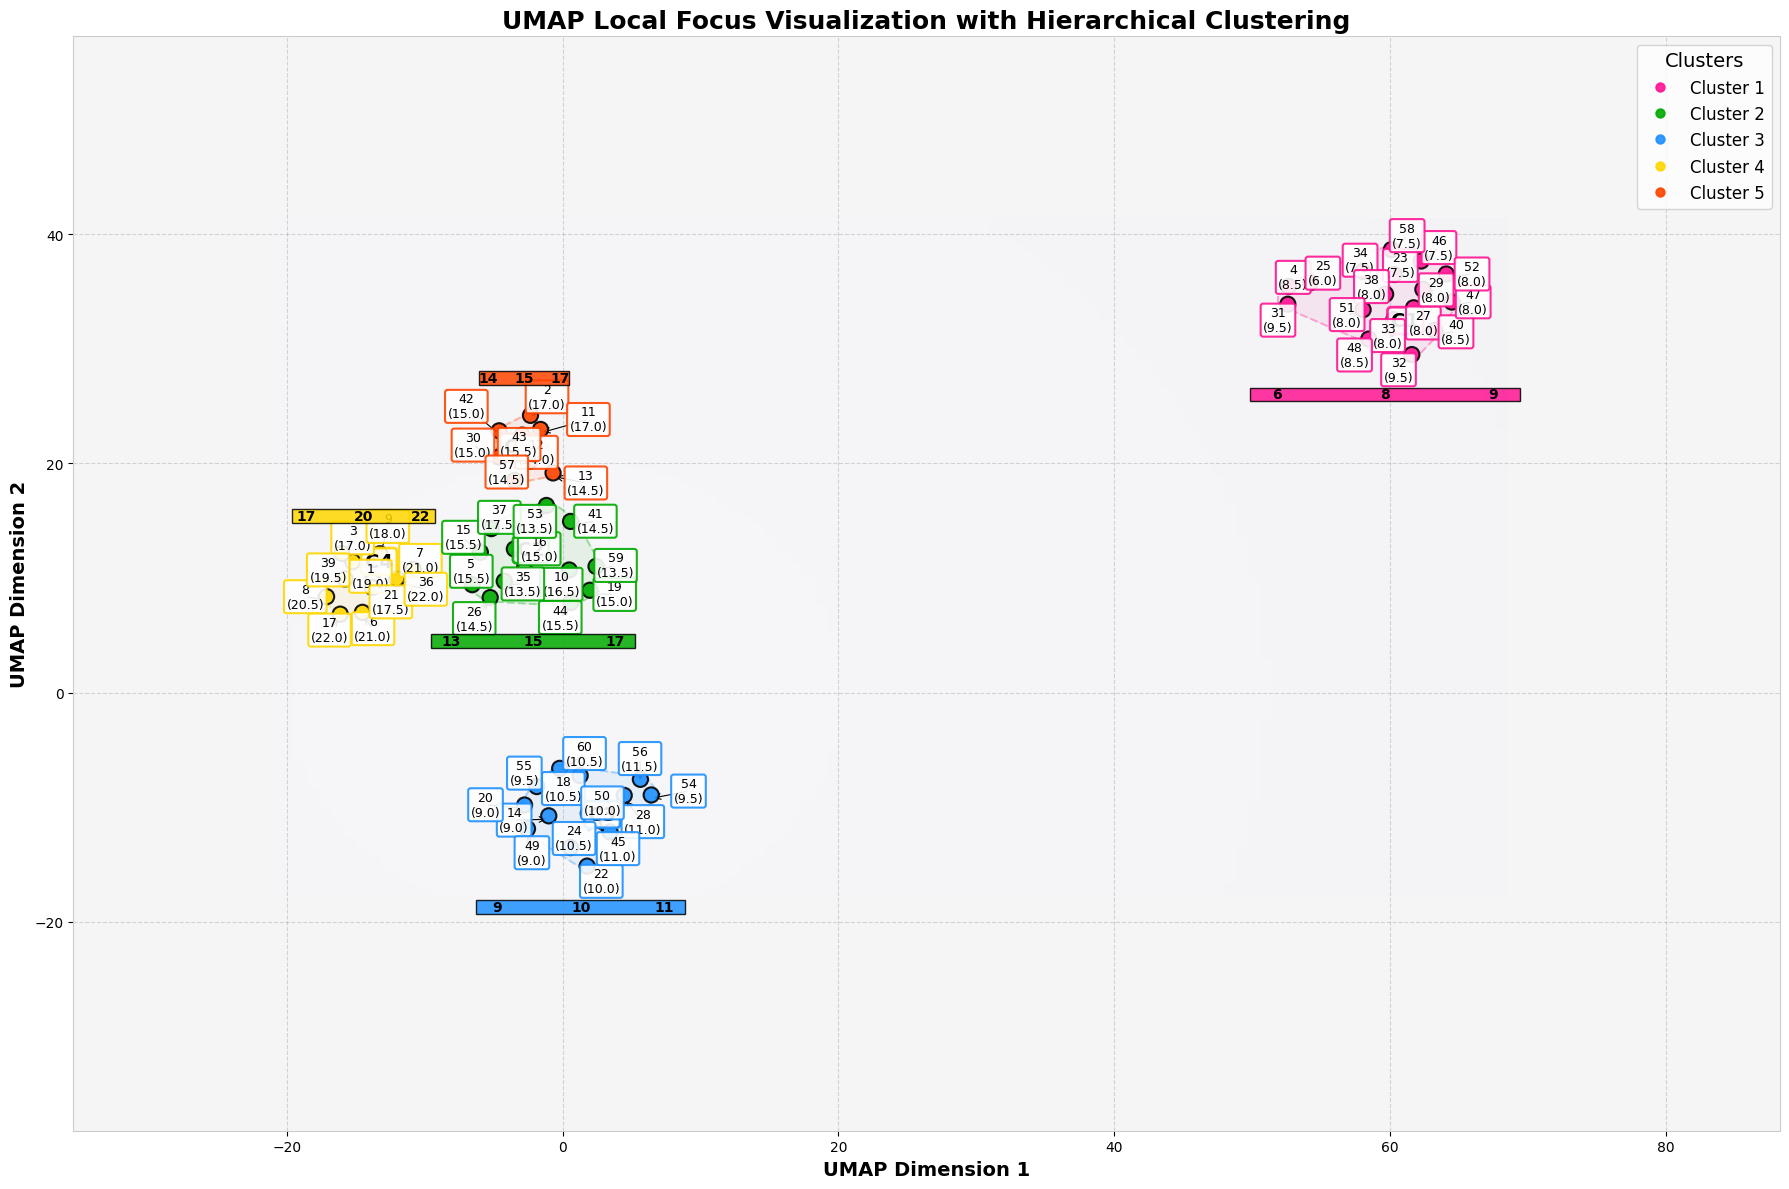

Number of items in each cluster:
Cluster 1: 17 papers
Cluster 2: 12 papers
Cluster 3: 13 papers
Cluster 4: 10 papers
Cluster 5: 8 papers
Silhouette Score: 0.7082

Cluster Centroids (Feature Means):

Cluster 1:
  Spatial_Proximity: 2.5294
  Referential_Context: 2.0000
  Environmental_Context: 1.1765
  Concreteness: 1.2059
  Coherence: 1.1176

Cluster 2:
  Spatial_Proximity: 4.0000
  Referential_Context: 3.3333
  Environmental_Context: 2.3333
  Concreteness: 3.2500
  Coherence: 2.1667

Cluster 3:
  Spatial_Proximity: 3.8462
  Referential_Context: 2.0000
  Environmental_Context: 1.3846
  Concreteness: 1.6154
  Coherence: 1.3846

Cluster 4:
  Spatial_Proximity: 3.3500
  Referential_Context: 3.1000
  Environmental_Context: 3.7500
  Concreteness: 4.9000
  Coherence: 4.6500

Cluster 5:
  Spatial_Proximity: 4.5000
  Referential_Context: 3.0000
  Environmental_Context: 3.0000
  Concreteness: 1.0000
  Coherence: 3.8125

Diegetic Values Statistics by Cluster (using 'Diegetic Values' column):
Clus

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import umap  # pip install umap-learn
from adjustText import adjust_text  # pip install adjustText
from scipy.spatial import ConvexHull, distance_matrix

# Load the data
data = pd.read_excel('Data_v1.xlsx')

# Extract features
features = ['Spatial_Proximity', 'Referential_Context', 'Environmental_Context',
            'Concreteness', 'Coherence']
X = data[features].values

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# Perform UMAP dimensionality reduction with parameters to reduce overlapping
reducer = umap.UMAP(
    n_neighbors=11,        # Slightly larger value for better global structure
    min_dist=0.1,          # Larger min_dist to prevent overlapping points
    spread=5.2,            # Increased spread for better separation
    n_components=2,
    repulsion_strength=2.0, # Add repulsion to push points apart
    metric='euclidean',
    random_state=42
)
X_umap = reducer.fit_transform(X_scaled)

# Apply Hierarchical Clustering based on UMAP positions
n_clusters = 5
hierarchical_clustering = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='complete',    # Using 'complete' linkage for better separation
    distance_threshold=None
)
cluster_labels = hierarchical_clustering.fit_predict(X_umap)

# (Optional) Post-processing to reassign boundary points closer to other centroids
cluster_centroids = []
for i in range(n_clusters):
    cluster_points = X_umap[cluster_labels == i]
    centroid = np.mean(cluster_points, axis=0)
    cluster_centroids.append(centroid)

for i in range(len(X_umap)):
    distances = [np.linalg.norm(X_umap[i] - centroid) for centroid in cluster_centroids]
    closest_centroid = np.argmin(distances)
    if cluster_labels[i] != closest_centroid:
        current_dist = distances[cluster_labels[i]]
        closest_dist = distances[closest_centroid]
        # If the point is very close to the boundary, reassign it
        if closest_dist < current_dist * 0.95:
            cluster_labels[i] = closest_centroid

# Create a new column "cluster" in 'data' starting with label 1 instead of 0
data['cluster'] = cluster_labels + 1

# —————————————————————————————————————————————
# Visualize the clusters in UMAP space (optional)
# —————————————————————————————————————————————
vibrant_colors = ['#FF1493', '#00AA00', '#1E90FF', '#FFD700',
                  '#FF4500', '#8A2BE2', '#00FFFF', '#FF00FF']
cmap = ListedColormap(vibrant_colors[:n_clusters])

plt.figure(figsize=(18, 12), facecolor='white')

# Jitter points to reduce overlaps
jitter_amount = 0.05
X_umap_jittered = X_umap.copy()
X_umap_jittered += np.random.normal(0, jitter_amount, X_umap.shape)

# Use cluster_labels + 1 for display (1-based indexing)
scatter = plt.scatter(X_umap_jittered[:, 0],
                      X_umap_jittered[:, 1],
                      c=cluster_labels,  # Keep 0-based for colors
                      cmap=cmap,
                      alpha=0.9,
                      s=120,
                      edgecolors='black',
                      linewidths=1.5,
                      zorder=5)

# Compute and plot cluster centroids
centroids = []
for i in range(n_clusters):
    cluster_points = X_umap[cluster_labels == i]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

    # Example logic for star positioning and labeling
    if len(cluster_points) > 3:
        dist_matrix = distance_matrix(cluster_points, cluster_points)
        min_distances = np.min(dist_matrix + np.eye(len(dist_matrix)) * 999, axis=1)
        best_idx = np.argmax(min_distances)
        star_position = cluster_points[best_idx]
        star_position = (star_position + centroid) / 2
    else:
        offset = np.array([0.5, 0.5])
        star_position = centroid + offset

    plt.scatter(star_position[0], star_position[1],
                s=300, marker='*', color='white',
                edgecolors='black', linewidths=2,
                zorder=10, alpha=0.9)

    text_offset = np.array([0.5, 0.5])
    text_position = star_position + text_offset

    # Use i+1 for the cluster label text (1-based)
    plt.text(text_position[0], text_position[1],
             f"C{i+1}",
             fontsize=14,
             fontweight='bold',
             ha='center',
             va='center',
             zorder=11,
             bbox=dict(boxstyle='round,pad=0.2',
                       fc='white',
                       ec=vibrant_colors[i],
                       alpha=0.9,
                       linewidth=2))

# Add texts for each data point (idx and Diegetic Values)
texts = []
for i, idx in enumerate(data['idx']):
    # Get the diegetic value if the column exists
    if 'Diegetic Values' in data.columns:
        dv = data['Diegetic Values'].iloc[i]
        # Format Diegetic Value to 1 decimal place
        label_text = f"{idx}\n({dv:.1f})"
    else:
        label_text = str(idx)

    # Use the cluster color for the text box border
    cluster_color = vibrant_colors[cluster_labels[i]]
    texts.append(plt.text(X_umap_jittered[i, 0],
                         X_umap_jittered[i, 1] - 0.3,
                         label_text,
                         fontsize=9,
                         ha='center',
                         va='center',
                         bbox=dict(boxstyle='round,pad=0.2',
                                  fc='white', ec=cluster_color, alpha=0.9, linewidth=1.5),
                         zorder=15))

# Adjust text to reduce overlap
adjust_text(texts,
            arrowprops=dict(arrowstyle='->', color='black', lw=0.8),
            expand_points=(3.0, 3.0),
            force_points=(0.5, 0.5),
            force_text=(1.0, 1.0),
            force_objects=(1.5, 1.5),
            lim=2000,
            only_move={'points': 'xy', 'texts': 'xy', 'objects': 'xy'},
            autoalign='xy')

# Update the legend to use 1-indexed labels
handles, labels = scatter.legend_elements()
# Create custom labels with 1-indexed values (1 to 6 instead of 0 to 5)
new_labels = [f'Cluster {i+1}' for i in range(len(labels))]
plt.legend(handles, new_labels, title="Clusters", loc="upper right",
           fontsize=12, title_fontsize=14)

plt.title('UMAP Local Focus Visualization with Hierarchical Clustering',
          fontsize=18, fontweight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=14, fontweight='bold')
plt.ylabel('UMAP Dimension 2', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.gca().set_facecolor('whitesmoke')

# Subtle gradient background
from matplotlib.colors import LinearSegmentedColormap
gradient_colors = [(0.98, 0.98, 1), (0.95, 0.95, 0.98)]
gradient_cmap = LinearSegmentedColormap.from_list('subtle_gradient',
                                                 gradient_colors)

nx, ny = 100, 100
x = np.linspace(plt.xlim()[0], plt.xlim()[1], nx)
y = np.linspace(plt.ylim()[0], plt.ylim()[1], ny)
Xg, Yg = np.meshgrid(x, y)
R = np.sqrt((Xg)**2 + (Yg)**2)
Z = R / np.max(R)
plt.imshow(Z, extent=[plt.xlim()[0], plt.xlim()[1], plt.ylim()[0], plt.ylim()[1]],
           origin='lower', cmap=gradient_cmap, alpha=0.4, aspect='auto', zorder=0)

# Draw convex hulls for each cluster and calculate hull area
hull_areas = []
cluster_hulls = []
for i in range(n_clusters):
    cluster_points = X_umap_jittered[cluster_labels == i]
    if len(cluster_points) >= 5:
        try:
            hull = ConvexHull(cluster_points)
            hull_points = cluster_points[hull.vertices]
            centroid = np.mean(hull_points, axis=0)
            hull_points_padded = centroid + 1.1 * (hull_points - centroid)

            plt.fill(hull_points_padded[:, 0], hull_points_padded[:, 1],
                     color=vibrant_colors[i], alpha=0.07, zorder=1)
            plt.plot(np.append(hull_points_padded[:, 0], hull_points_padded[0, 0]),
                     np.append(hull_points_padded[:, 1], hull_points_padded[0, 1]),
                     color=vibrant_colors[i],
                     alpha=0.3,
                     linestyle='--',
                     linewidth=1.5,
                     zorder=2)

            # Store hull area and padded hull points for later use
            hull_area = hull.volume  # 2D hull volume = area
            hull_areas.append(hull_area)
            cluster_hulls.append(hull_points_padded)
        except:
            hull_areas.append(None)
            cluster_hulls.append(None)
    else:
        hull_areas.append(None)
        cluster_hulls.append(None)

# Normalize hull areas for line width scaling
max_hull_area = max([area for area in hull_areas if area is not None])
min_hull_area = min([area for area in hull_areas if area is not None])
normalized_areas = []
for area in hull_areas:
    if area is not None:
        # Scale between 1 and 5 for line width
        normalized = 1 + 4 * (area - min_hull_area) / (max_hull_area - min_hull_area)
        normalized_areas.append(normalized)
    else:
        normalized_areas.append(1.0)  # Default for clusters without hulls

# Draw lines with min, avg, max diegetic values
diegetic_column = 'Diegetic Values' if 'Diegetic Values' in data.columns else 'idx'

# Calculate all cluster bounds first for better overlap detection
cluster_bounds = []
for i in range(n_clusters):
    if cluster_hulls[i] is not None:
        min_x = np.min(cluster_hulls[i][:, 0])
        max_x = np.max(cluster_hulls[i][:, 0])
        min_y = np.min(cluster_hulls[i][:, 1])
        max_y = np.max(cluster_hulls[i][:, 1])
        cluster_bounds.append((min_x, max_x, min_y, max_y))
    else:
        # If no hull, use points in the cluster
        cluster_points = X_umap_jittered[cluster_labels == i]
        if len(cluster_points) > 0:
            min_x = np.min(cluster_points[:, 0])
            max_x = np.max(cluster_points[:, 0])
            min_y = np.min(cluster_points[:, 1])
            max_y = np.max(cluster_points[:, 1])
            cluster_bounds.append((min_x, max_x, min_y, max_y))
        else:
            cluster_bounds.append(None)

# Store all line positions for overlap detection
all_lines_y = {}
all_lines_x_range = {}

for i in range(n_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    if len(cluster_indices) > 0 and cluster_bounds[i] is not None:
        # Get diegetic values for this cluster
        cluster_diegetic_values = data.iloc[cluster_indices][diegetic_column].values

        # Calculate min, avg, max values
        min_value = np.min(cluster_diegetic_values)
        avg_value = np.mean(cluster_diegetic_values)
        max_value = np.max(cluster_diegetic_values)

        # Get cluster bounds
        min_x, max_x, min_y, max_y = cluster_bounds[i]

        # Get cluster centroid
        centroid = centroids[i]

        # Line width based on cluster width (outer boundary size)
        cluster_width = max_x - min_x
        line_width = cluster_width * 1.5  # Make line 50% wider than the cluster to accommodate edge numbers

        # Line center at cluster centroid x-position
        line_center_x = centroid[0]
        line_start_x = line_center_x - line_width / 2
        line_end_x = line_center_x + line_width / 2

        # Try different y positions until we find one with no overlap
        # Start with positions below and above, then try farther away
        position_offsets = [-3.0, 3.0, -5.0, 5.0, -7.0, 7.0, -9.0, 9.0]

        line_y = None
        for offset in position_offsets:
            potential_y = min_y + offset if offset < 0 else max_y + offset

            # Check for overlap with other clusters
            has_overlap = False

            # Check overlap with existing lines
            for existing_i, existing_y in all_lines_y.items():
                existing_start_x, existing_end_x = all_lines_x_range[existing_i]

                # Check if lines would overlap
                lines_overlap_x = (line_start_x <= existing_end_x and line_end_x >= existing_start_x)
                lines_overlap_y = abs(potential_y - existing_y) < 1.0

                if lines_overlap_x and lines_overlap_y:
                    has_overlap = True
                    break

            if has_overlap:
                continue

            # Check overlap with other clusters
            for j, bounds in enumerate(cluster_bounds):
                if j != i and bounds is not None:
                    other_min_x, other_max_x, other_min_y, other_max_y = bounds

                    # Check if line would overlap with this cluster
                    x_overlap = (line_start_x <= other_max_x and line_end_x >= other_min_x)
                    y_overlap = (potential_y >= other_min_y - 0.5 and potential_y <= other_max_y + 0.5)

                    if x_overlap and y_overlap:
                        has_overlap = True
                        break

            if not has_overlap:
                line_y = potential_y
                break

        # If all positions have overlaps, use the last one but position it farther away
        if line_y is None:
            line_y = min_y - 11.0

        # Store line position for future overlap checks
        all_lines_y[i] = line_y
        all_lines_x_range[i] = (line_start_x, line_end_x)

        # Define positions for min, avg, max values with padding from edges
        # Add more padding from the edges (10% inward from each end)
        edge_padding = line_width * 0.1
        min_x = line_start_x + edge_padding
        avg_x = line_center_x
        max_x = line_end_x - edge_padding

        # Extra thick line height to cover the text
        line_height = 1.2

        # Draw very thick line as a rectangle
        line_rect = plt.Rectangle((line_start_x, line_y - line_height/2),
                                 line_width, line_height,
                                 facecolor=vibrant_colors[i],
                                 edgecolor='black',
                                 linewidth=1.0,
                                 alpha=0.85,
                                 zorder=20)
        plt.gca().add_patch(line_rect)

        # Add min, avg, max text on the line
        plt.text(min_x, line_y, str(int(min_value)),
                fontsize=10, fontweight='bold',
                ha='center', va='center',
                color='black', zorder=21)

        plt.text(avg_x, line_y, str(int(round(avg_value))),
                fontsize=10, fontweight='bold',
                ha='center', va='center',
                color='black', zorder=21)

        plt.text(max_x, line_y, str(int(max_value)),
                fontsize=10, fontweight='bold',
                ha='center', va='center',
                color='black', zorder=21)

        # Position for min, avg, max values on the thick line

plt.tight_layout()
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_padding = (x_max - x_min) * 0.15
y_padding = (y_max - y_min) * 0.25
plt.xlim(x_min - x_padding, x_max + x_padding)
plt.ylim(y_min - y_padding, y_max + y_padding)

plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['top'].set_color('#cccccc')
plt.gca().spines['right'].set_color('#cccccc')
plt.gca().spines['bottom'].set_color('#cccccc')
plt.gca().spines['left'].set_color('#cccccc')

plt.savefig('umap_enhanced_with_diegetic_lines.png', dpi=300, bbox_inches='tight')
plt.show()

# Print cluster statistics with 1-based indexing
print("Number of items in each cluster:")
for i in range(n_clusters):
    print(f"Cluster {i+1}: {sum(cluster_labels == i)} papers")

# Calculate and print silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_umap, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Print average feature values for each cluster with 1-based indexing
print("\nCluster Centroids (Feature Means):")
for i in range(n_clusters):
    print(f"\nCluster {i+1}:")
    cluster_indices = np.where(cluster_labels == i)[0]
    if len(cluster_indices) > 0:
        cluster_items = X[cluster_indices]
        for j, feature in enumerate(features):
            print(f"  {feature}: {np.mean(cluster_items[:, j]):.4f}")
    else:
        print("  No items in this cluster")

# Print min, avg, max diegetic values for each cluster
diegetic_column = 'Diegetic Values' if 'Diegetic Values' in data.columns else 'idx'
print(f"\nDiegetic Values Statistics by Cluster (using '{diegetic_column}' column):")
for i in range(n_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    if len(cluster_indices) > 0:
        diegetic_values = data.iloc[cluster_indices][diegetic_column].values
        print(f"Cluster {i+1}:")
        print(f"  Min: {np.min(diegetic_values)}")
        print(f"  Avg: {np.mean(diegetic_values):.2f}")
        print(f"  Max: {np.max(diegetic_values)}")
    else:
        print(f"Cluster {i+1}: No items")

# ——————————————————————————————
# Save updated data to a new Excel
# ——————————————————————————————
data.to_excel("Data_v2.xlsx", index=False)
print("\nData saved with a new 'cluster' column to 'Data_v2.xlsx'.")

In [ ]:
pip install adjustText

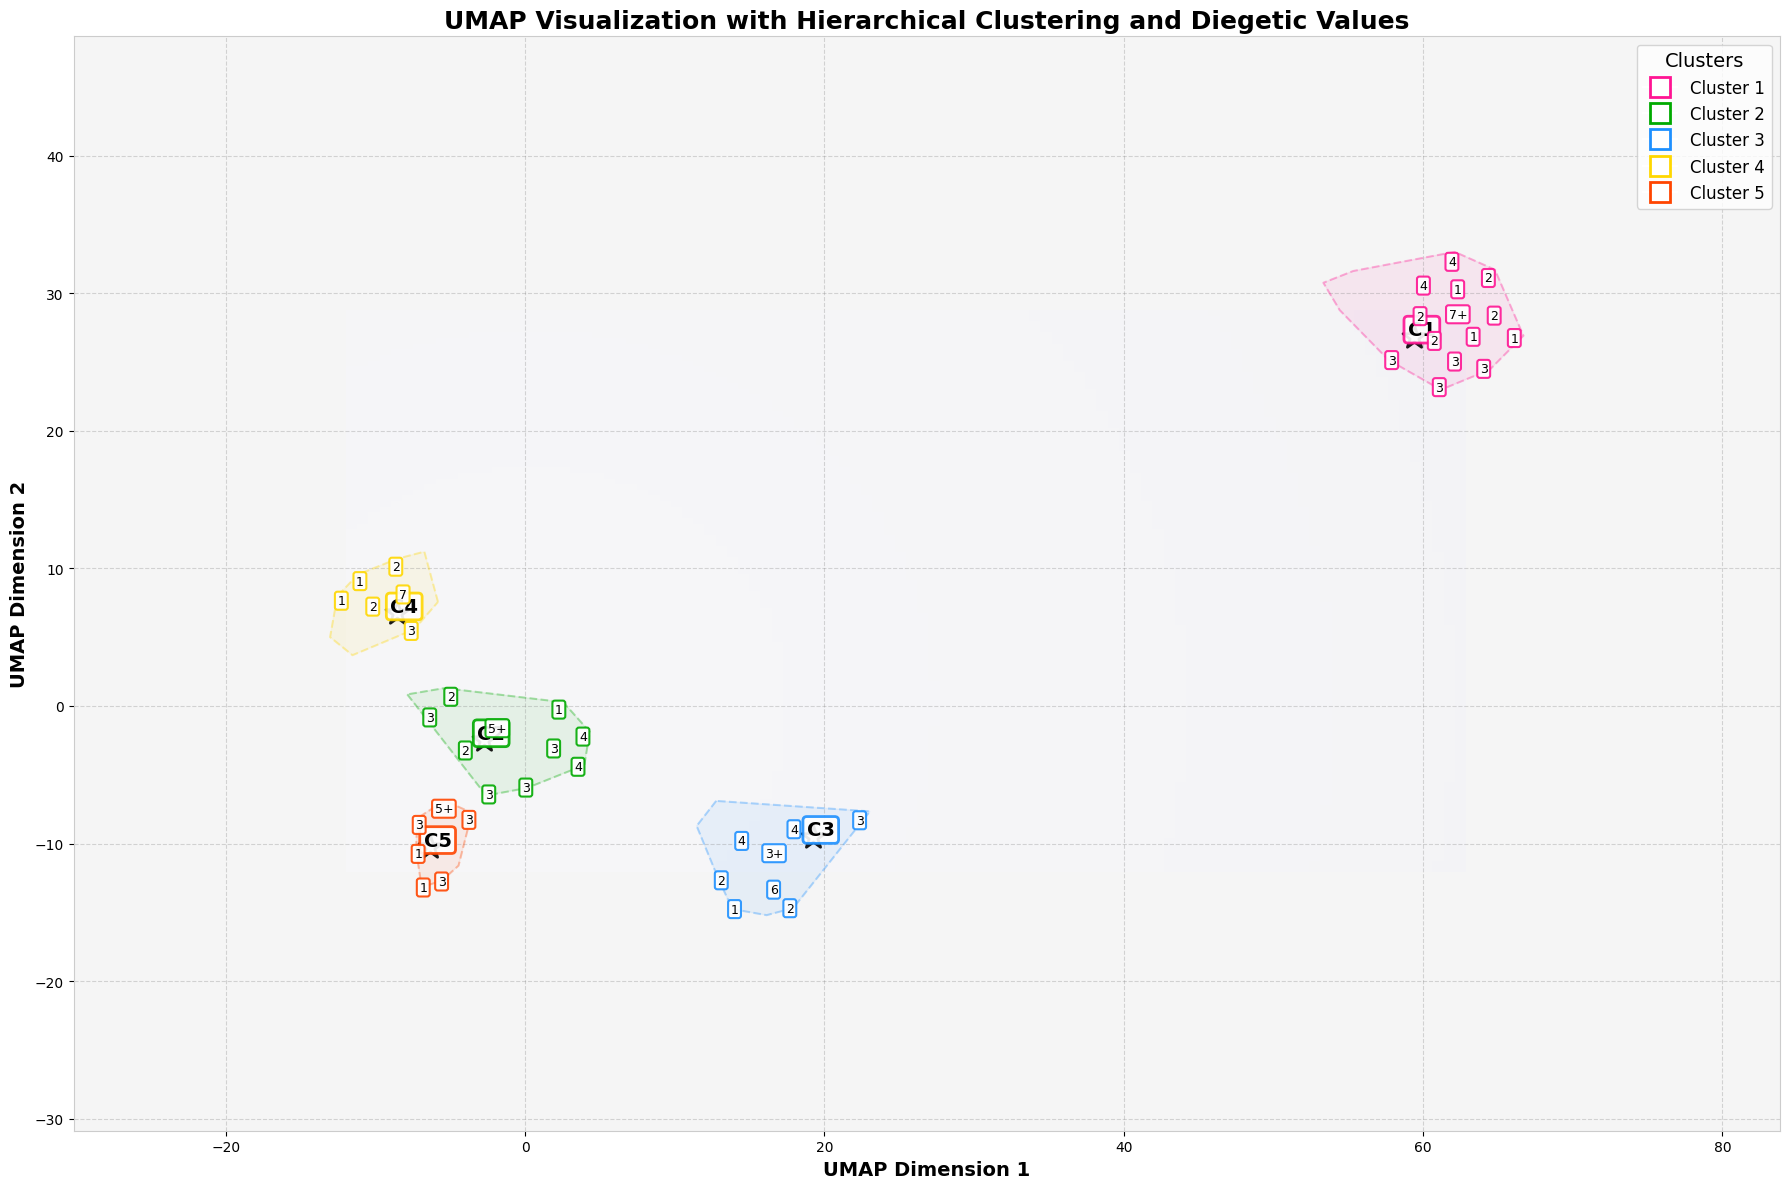

Number of items in each cluster:
Cluster 1: 17 papers
Cluster 2: 12 papers
Cluster 3: 12 papers
Cluster 4: 10 papers
Cluster 5: 8 papers
Silhouette Score: 0.6840

Cluster Centroids (Feature Means):

Cluster 1:
  Spatial_Proximity: 2.5294
  Referential_Context: 2.0000
  Environmental_Context: 1.1765
  Concreteness: 1.2059
  Coherence: 1.1176
  Diegetic_Values: 8.0294

Cluster 2:
  Spatial_Proximity: 4.0000
  Referential_Context: 3.3333
  Environmental_Context: 2.3333
  Concreteness: 3.2500
  Coherence: 2.1667
  Diegetic_Values: 15.0833

Cluster 3:
  Spatial_Proximity: 3.8333
  Referential_Context: 2.0000
  Environmental_Context: 1.4167
  Concreteness: 1.5417
  Coherence: 1.4167
  Diegetic_Values: 10.2083

Cluster 4:
  Spatial_Proximity: 3.3500
  Referential_Context: 3.1000
  Environmental_Context: 3.7500
  Concreteness: 4.9000
  Coherence: 4.6500
  Diegetic_Values: 19.7500

Cluster 5:
  Spatial_Proximity: 4.5000
  Referential_Context: 3.0000
  Environmental_Context: 3.0000
  Concretenes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import umap  # pip install umap-learn
from adjustText import adjust_text  # pip install adjustText

# Load the data
data = pd.read_excel('Data_v1.xlsx')

# Create a Diegetic Values column (sum of all features)
features = ['Spatial_Proximity', 'Referential_Context', 'Environmental_Context',
            'Concreteness', 'Coherence']
data['Diegetic_Values'] = data[features].sum(axis=1)

# Extract features for clustering
X = data[features].values

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# Perform UMAP dimensionality reduction with parameters to reduce overlapping
reducer = umap.UMAP(
    n_neighbors=13,        # Slightly larger value for better global structure
    min_dist=0.2,          # Larger min_dist to prevent overlapping points
    spread=5.0,            # Increased spread for better separation
    n_components=2,
    repulsion_strength=2.0, # Add repulsion to push points apart
    metric='euclidean',
    random_state=42
)
X_umap = reducer.fit_transform(X_scaled)

# Apply Hierarchical Clustering based on UMAP positions
n_clusters = 5
hierarchical_clustering = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='complete',    # Using 'complete' linkage for better separation
    distance_threshold=None
)
cluster_labels = hierarchical_clustering.fit_predict(X_umap)

# (Optional) Post-processing to reassign boundary points closer to other centroids
cluster_centroids = []
for i in range(n_clusters):
    cluster_points = X_umap[cluster_labels == i]
    centroid = np.mean(cluster_points, axis=0)
    cluster_centroids.append(centroid)

for i in range(len(X_umap)):
    distances = [np.linalg.norm(X_umap[i] - centroid) for centroid in cluster_centroids]
    closest_centroid = np.argmin(distances)
    if cluster_labels[i] != closest_centroid:
        current_dist = distances[cluster_labels[i]]
        closest_dist = distances[closest_centroid]
        # If the point is very close to the boundary, reassign it
        if closest_dist < current_dist * 0.95:
            cluster_labels[i] = closest_centroid

# Create a new column "cluster" in 'data' starting with label 1 instead of 0
data['cluster'] = cluster_labels + 1

# —————————————————————————————————————————————
# Visualize the clusters in UMAP space (optional)
# —————————————————————————————————————————————
vibrant_colors = ['#FF1493', '#00AA00', '#1E90FF', '#FFD700',
                  '#FF4500', '#8A2BE2', '#00FFFF', '#FF00FF']
cmap = ListedColormap(vibrant_colors[:n_clusters])

plt.figure(figsize=(18, 12), facecolor='white')

# Jitter points to reduce overlaps
jitter_amount = 0.05
X_umap_jittered = X_umap.copy()
X_umap_jittered += np.random.normal(0, jitter_amount, X_umap.shape)

# Compute and plot cluster centroids
centroids = []
for i in range(n_clusters):
    cluster_points = X_umap[cluster_labels == i]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

    # Example logic for star positioning and labeling
    if len(cluster_points) > 3:
        from scipy.spatial import distance_matrix
        dist_matrix = distance_matrix(cluster_points, cluster_points)
        min_distances = np.min(dist_matrix + np.eye(len(dist_matrix)) * 999, axis=1)
        best_idx = np.argmax(min_distances)
        star_position = cluster_points[best_idx]
        star_position = (star_position + centroid) / 2
    else:
        offset = np.array([0.5, 0.5])
        star_position = centroid + offset

    plt.scatter(star_position[0], star_position[1],
                s=300, marker='*', color='white',
                edgecolors='black', linewidths=2,
                zorder=10, alpha=0.9)

    text_offset = np.array([0.5, 0.5])
    text_position = star_position + text_offset

    # Use i+1 for the cluster label text (1-based)
    plt.text(text_position[0], text_position[1],
             f"C{i+1}",
             fontsize=14,
             fontweight='bold',
             ha='center',
             va='center',
             zorder=11,
             bbox=dict(boxstyle='round,pad=0.2',
                       fc='white',
                       ec=vibrant_colors[i],
                       alpha=0.9,
                       linewidth=2))

# Add texts for each data point (idx and Diegetic Values)
# texts = []
# for i, (idx, dv) in enumerate(zip(data['idx'], data['Diegetic_Values'])):
#     # Format Diegetic Value to 1 decimal place
#     label_text = f"{idx}\n({dv:.1f})"
#     # Use the cluster color for the text box border
#     cluster_color = vibrant_colors[cluster_labels[i]]
#     texts.append(plt.text(X_umap_jittered[i, 0],
#                           X_umap_jittered[i, 1] - 0.3,
#                           label_text,
#                           fontsize=9,
#                           ha='center',
#                           va='center',
#                           bbox=dict(boxstyle='round,pad=0.2',
#                                     fc='white', ec=cluster_color, alpha=0.9, linewidth=1.5),
#                           zorder=15))


# Add texts for each data point (idx and #Variable)
# texts = []
# for i, (idx, var) in enumerate(zip(data['idx'], data['#Variable'])):
#     # Format with idx and #Variable value
#     label_text = f"{idx}\n({var})"
#     # Use the cluster color for the text box border
#     cluster_color = vibrant_colors[cluster_labels[i]]
#     texts.append(plt.text(X_umap_jittered[i, 0],
#                           X_umap_jittered[i, 1] - 0.3,
#                           label_text,
#                           fontsize=9,
#                           ha='center',
#                           va='center',
#                           bbox=dict(boxstyle='round,pad=0.2',
#                                     fc='white', ec=cluster_color, alpha=0.9, linewidth=1.5),
#                           zorder=15))


# Add texts for each data point (#Variable only)
# texts = []
# for i, var in enumerate(data['#Variable']):
#     # Format with just the #Variable value
#     label_text = f"{var}"
#     # Use the cluster color for the text box border
#     cluster_color = vibrant_colors[cluster_labels[i]]
#     texts.append(plt.text(X_umap_jittered[i, 0],
#                           X_umap_jittered[i, 1] - 0.3,
#                           label_text,
#                           fontsize=9,
#                           ha='center',
#                           va='center',
#                           bbox=dict(boxstyle='round,pad=0.2',
#                                     fc='white', ec=cluster_color, alpha=0.9, linewidth=1.5),
#                           zorder=15))

texts = []
for i, var in enumerate(data['#Variable']):
    # Only create text label if value is not 0
    if var != 0:
        # Format with just the #Variable value
        label_text = f"{var}"
        # Use the cluster color for the text box border
        cluster_color = vibrant_colors[cluster_labels[i]]
        texts.append(plt.text(X_umap_jittered[i, 0],
                              X_umap_jittered[i, 1] - 0.3,
                              label_text,
                              fontsize=9,
                              ha='center',
                              va='center',
                              bbox=dict(boxstyle='round,pad=0.2',
                                        fc='white', ec=cluster_color, alpha=0.9, linewidth=1.5),
                              zorder=15))


# Create a custom legend for clusters
handles = []
for i in range(n_clusters):
    # Create a proxy artist for the legend
    handle = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='w',
                        markeredgecolor=vibrant_colors[i], markeredgewidth=2,
                        markersize=15, label=f'Cluster {i+1}')
    handles.append(handle)

plt.legend(handles=handles, title="Clusters", loc="upper right",
           fontsize=12, title_fontsize=14)

plt.title('UMAP Visualization with Hierarchical Clustering and Diegetic Values',
          fontsize=18, fontweight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=14, fontweight='bold')
plt.ylabel('UMAP Dimension 2', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.gca().set_facecolor('whitesmoke')

# Subtle gradient background
from matplotlib.colors import LinearSegmentedColormap
gradient_colors = [(0.98, 0.98, 1), (0.95, 0.95, 0.98)]
gradient_cmap = LinearSegmentedColormap.from_list('subtle_gradient',
                                                 gradient_colors)

nx, ny = 100, 100
x = np.linspace(plt.xlim()[0], plt.xlim()[1], nx)
y = np.linspace(plt.ylim()[0], plt.ylim()[1], ny)
Xg, Yg = np.meshgrid(x, y)
R = np.sqrt((Xg)**2 + (Yg)**2)
Z = R / np.max(R)
plt.imshow(Z, extent=[plt.xlim()[0], plt.xlim()[1], plt.ylim()[0], plt.ylim()[1]],
           origin='lower', cmap=gradient_cmap, alpha=0.4, aspect='auto', zorder=0)

# Draw convex hulls for each cluster
from scipy.spatial import ConvexHull
for i in range(n_clusters):
    cluster_points = X_umap_jittered[cluster_labels == i]
    if len(cluster_points) >= 5:
        try:
            hull = ConvexHull(cluster_points)
            hull_points = cluster_points[hull.vertices]
            centroid = np.mean(hull_points, axis=0)
            hull_points_padded = centroid + 1.1 * (hull_points - centroid)
            plt.fill(hull_points_padded[:, 0], hull_points_padded[:, 1],
                     color=vibrant_colors[i], alpha=0.07, zorder=1)
            plt.plot(np.append(hull_points_padded[:, 0], hull_points_padded[0, 0]),
                     np.append(hull_points_padded[:, 1], hull_points_padded[0, 1]),
                     color=vibrant_colors[i],
                     alpha=0.3,
                     linestyle='--',
                     linewidth=1.5,
                     zorder=2)
        except:
            pass

plt.tight_layout()
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_padding = (x_max - x_min) * 0.15
y_padding = (y_max - y_min) * 0.25
plt.xlim(x_min - x_padding, x_max + x_padding)
plt.ylim(y_min - y_padding, y_max + y_padding)

plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['top'].set_color('#cccccc')
plt.gca().spines['right'].set_color('#cccccc')
plt.gca().spines['bottom'].set_color('#cccccc')
plt.gca().spines['left'].set_color('#cccccc')

plt.savefig('umap_with_diegetic_values.png', dpi=300, bbox_inches='tight')
plt.show()

# Print cluster statistics with 1-based indexing
print("Number of items in each cluster:")
for i in range(n_clusters):
    print(f"Cluster {i+1}: {sum(cluster_labels == i)} papers")

# Calculate and print silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_umap, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Print average feature values for each cluster with 1-based indexing
print("\nCluster Centroids (Feature Means):")
for i in range(n_clusters):
    print(f"\nCluster {i+1}:")
    cluster_indices = np.where(cluster_labels == i)[0]
    if len(cluster_indices) > 0:
        cluster_items = X[cluster_indices]
        for j, feature in enumerate(features):
            print(f"  {feature}: {np.mean(cluster_items[:, j]):.4f}")
        # Add Diegetic Values average
        cluster_dv = data.loc[cluster_indices, 'Diegetic_Values']
        print(f"  Diegetic_Values: {np.mean(cluster_dv):.4f}")
    else:
        print("  No items in this cluster")

# ——————————————————————————————
# Save updated data to a new Excel
# ——————————————————————————————
data.to_excel("Data_v2.xlsx", index=False)
print("\nData saved with 'cluster' and 'Diegetic_Values' columns to 'Data_v2.xlsx'.")

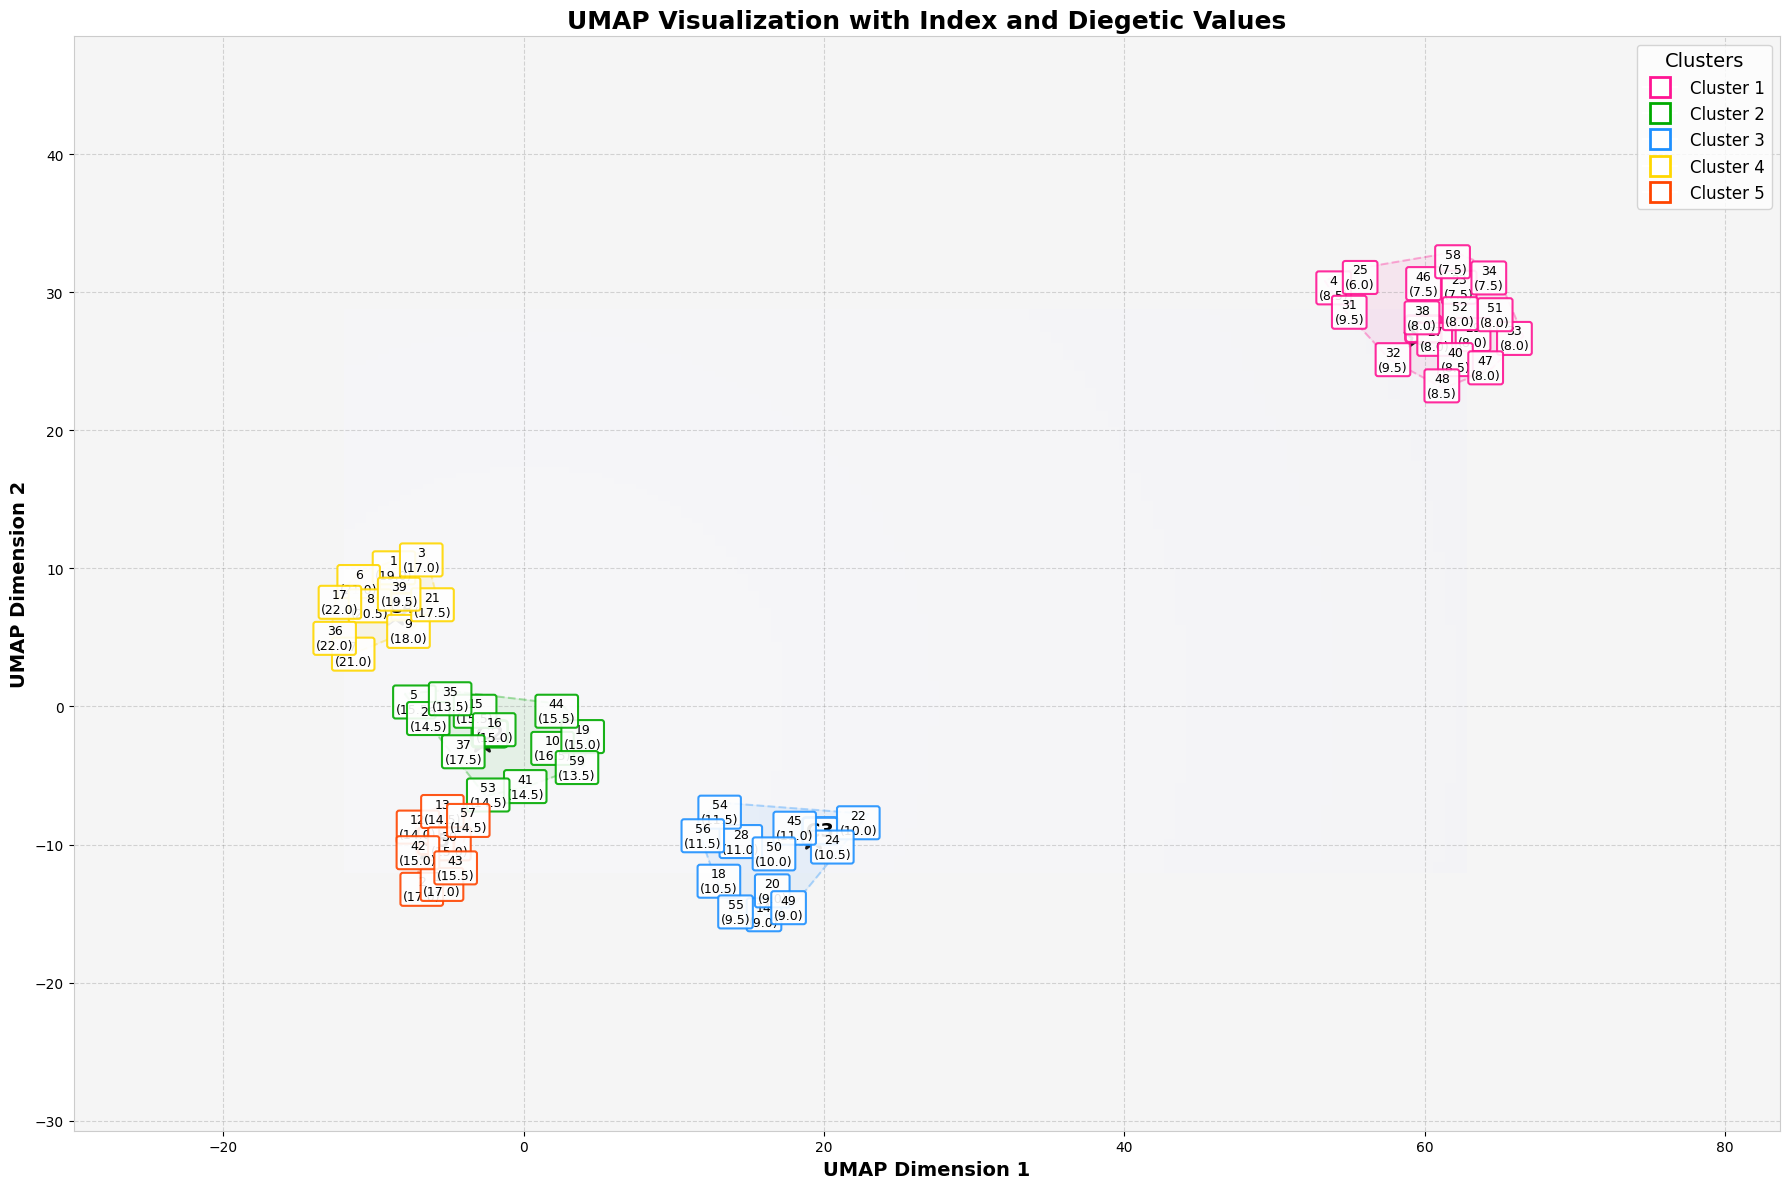

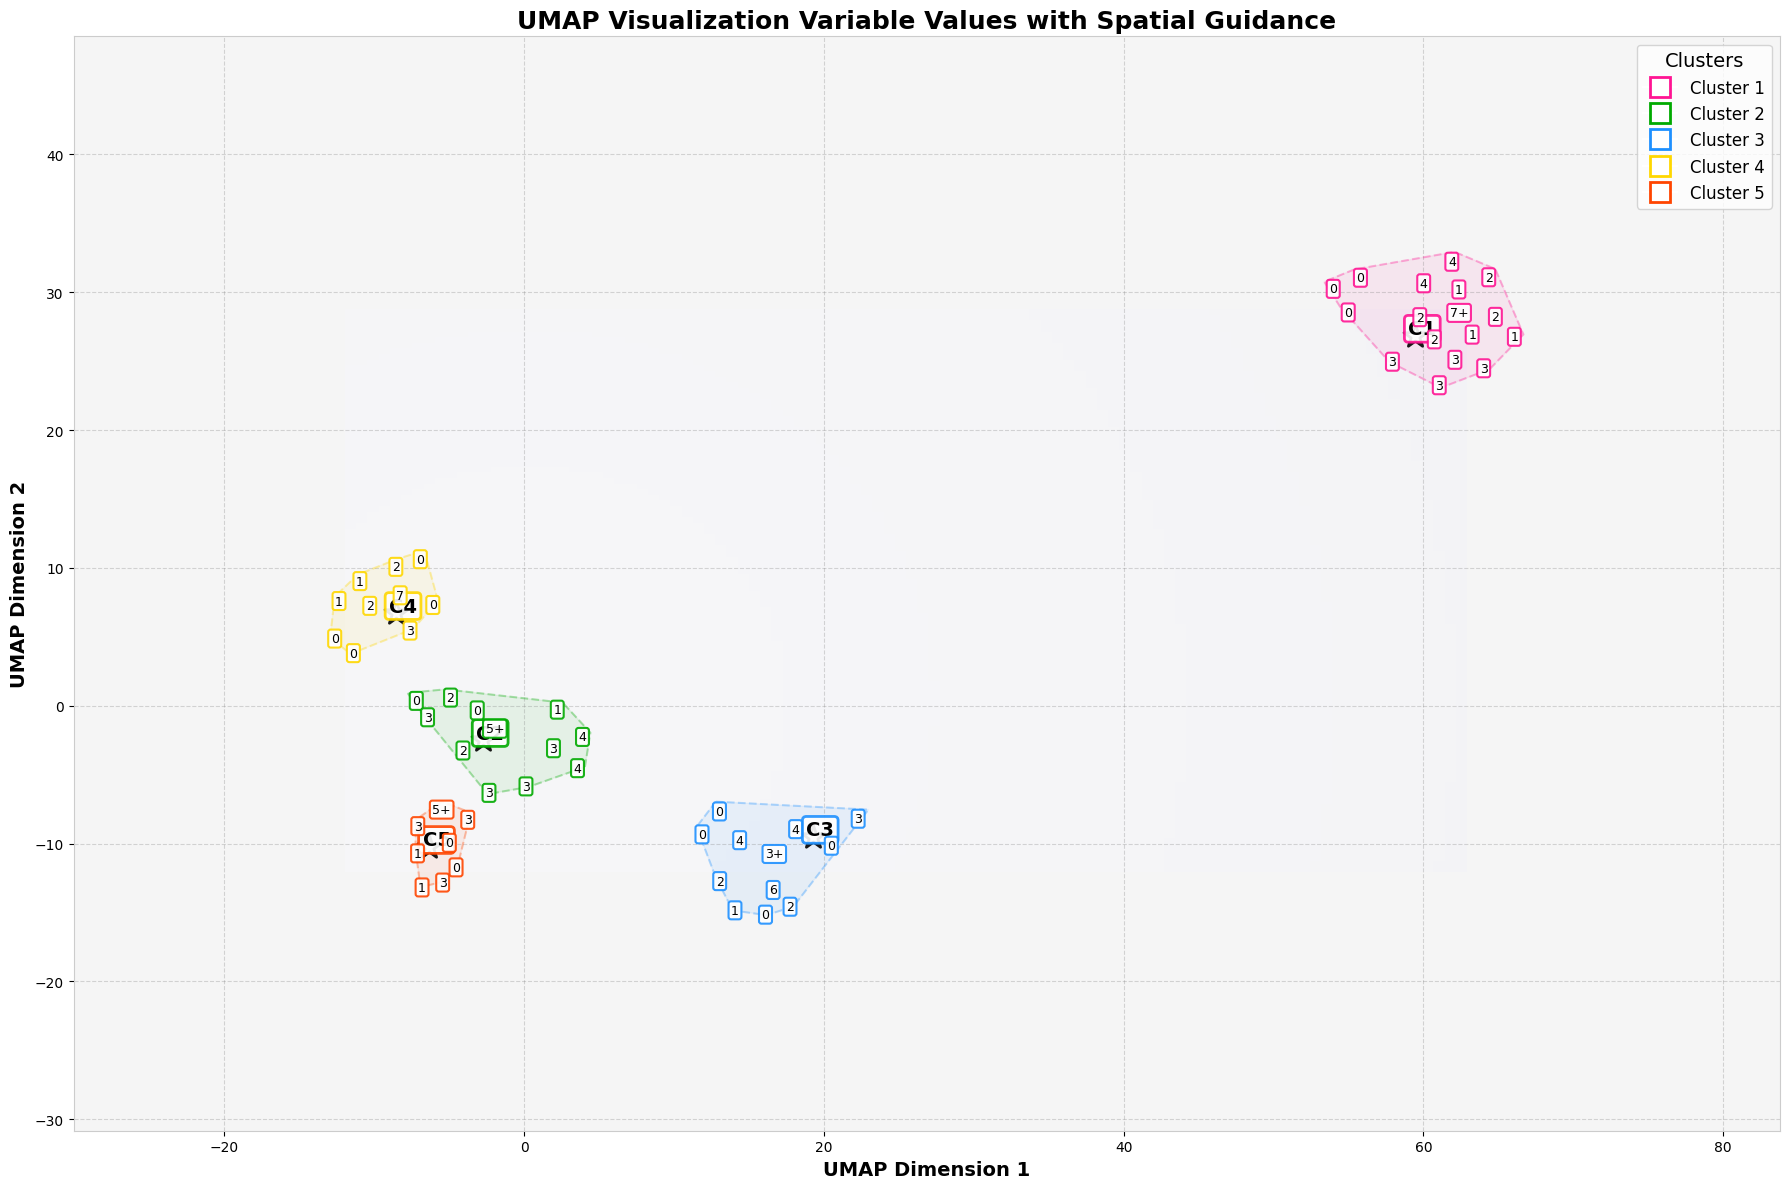

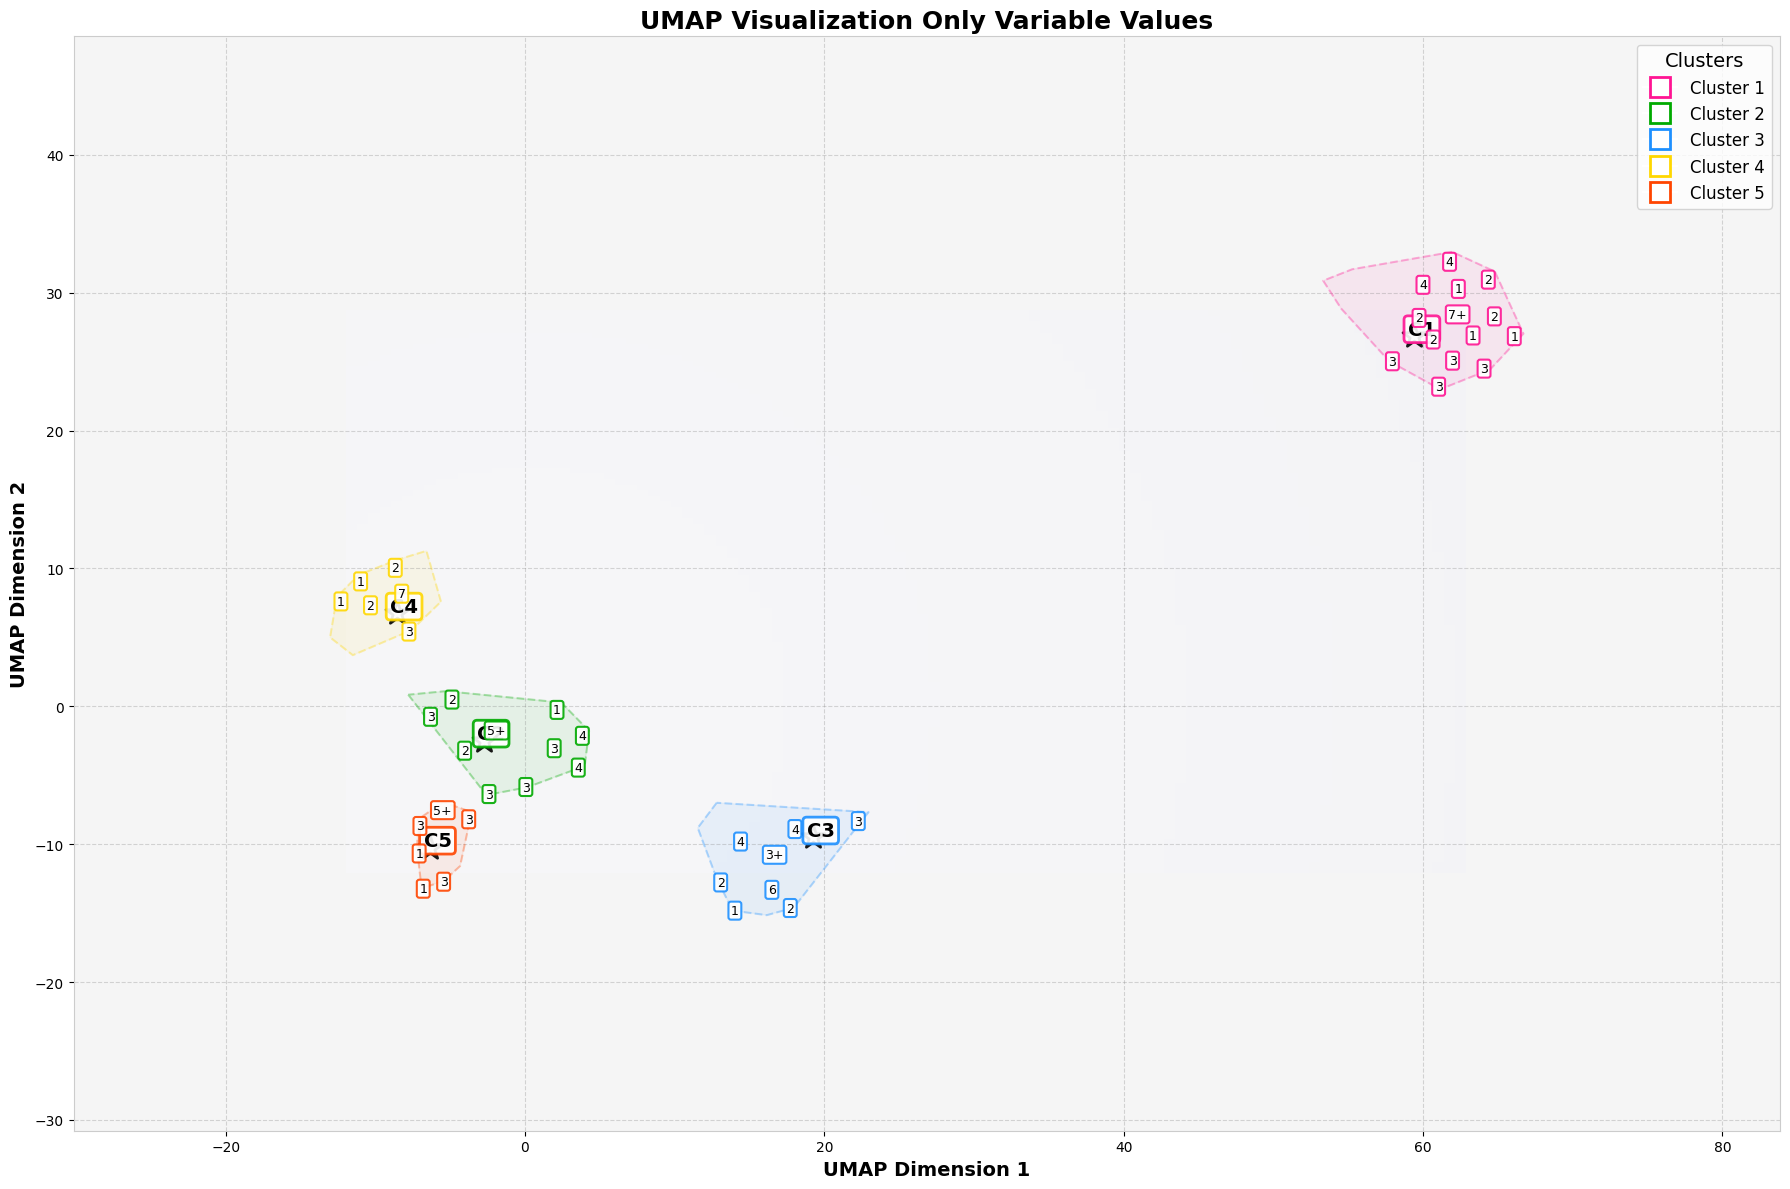

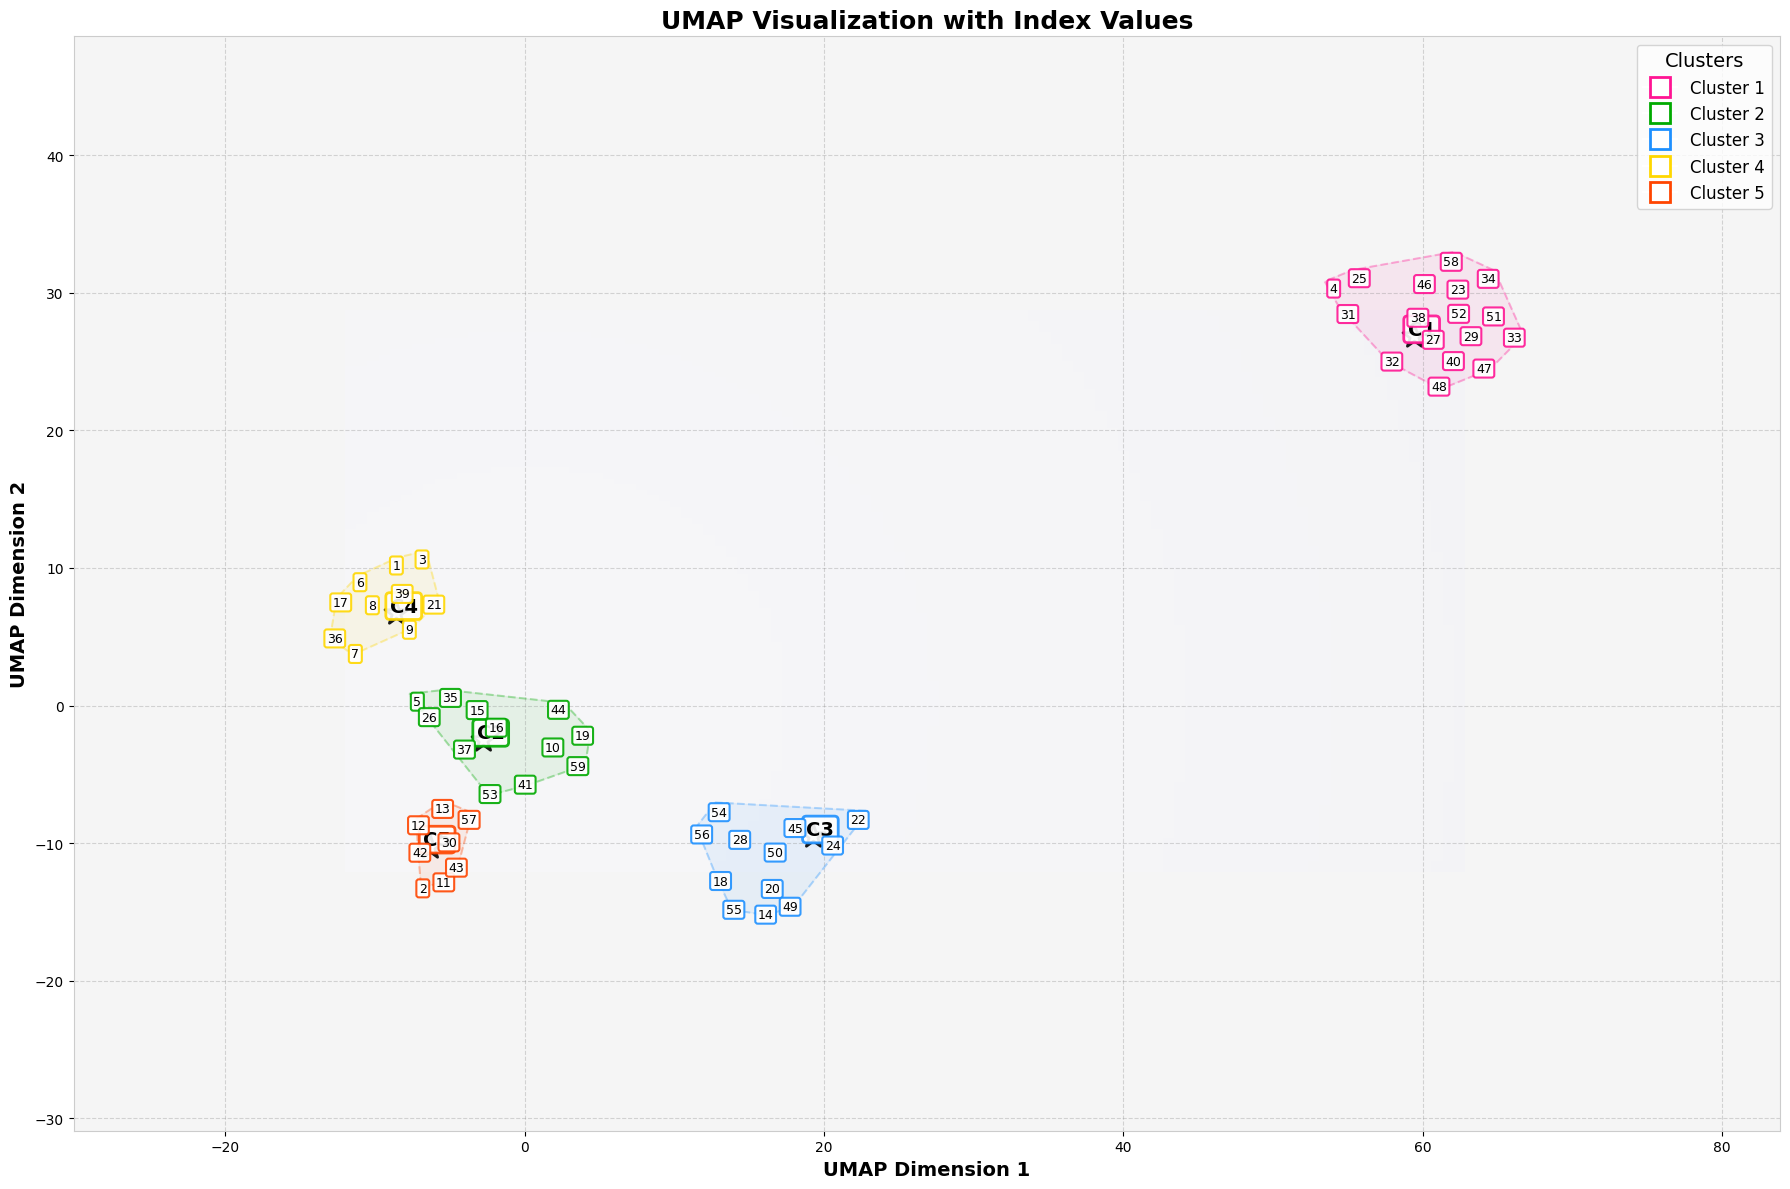

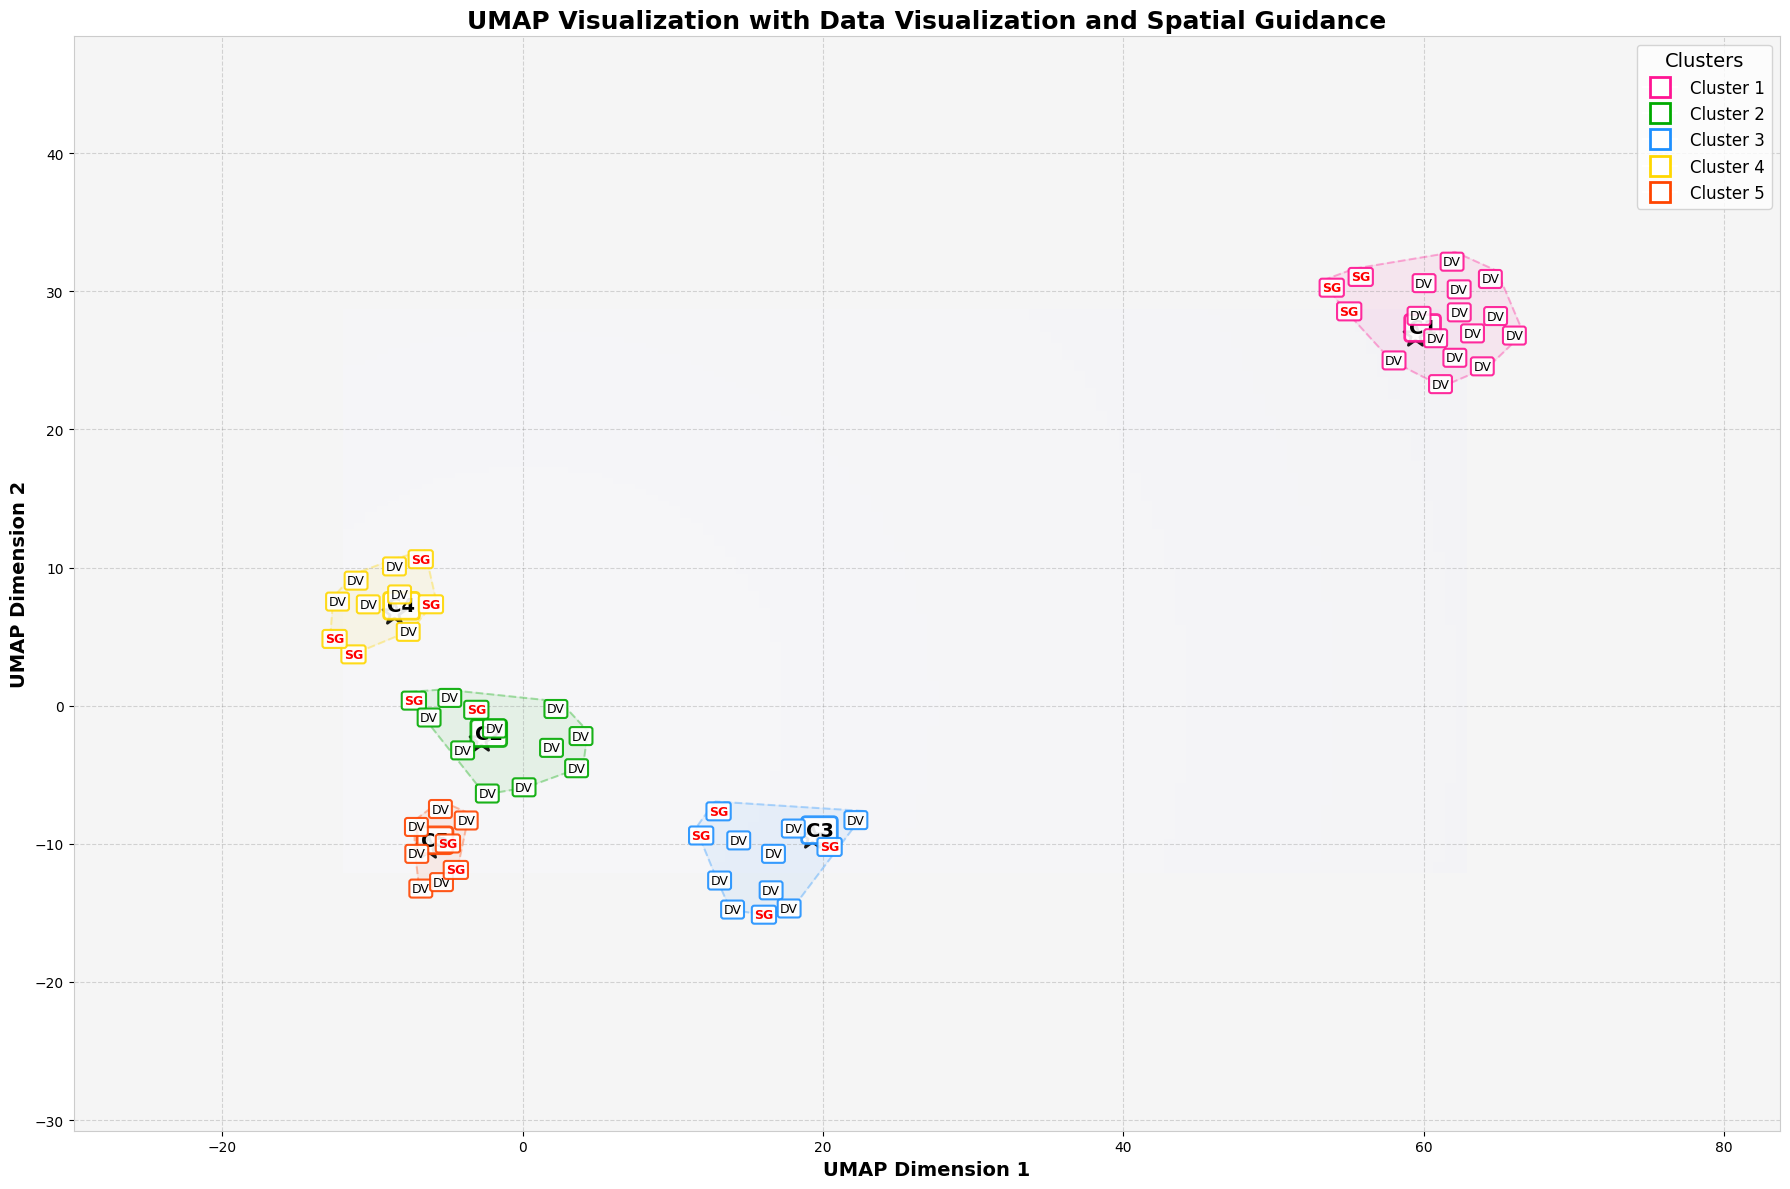

Number of items in each cluster:
Cluster 1: 17 papers
Cluster 2: 12 papers
Cluster 3: 12 papers
Cluster 4: 10 papers
Cluster 5: 8 papers
Silhouette Score: 0.6840

Cluster Centroids (Feature Means):

Cluster 1:
  Spatial_Proximity: 2.5294
  Referential_Context: 2.0000
  Environmental_Context: 1.1765
  Concreteness: 1.2059
  Coherence: 1.1176
  Diegetic_Values: 8.0294

Cluster 2:
  Spatial_Proximity: 4.0000
  Referential_Context: 3.3333
  Environmental_Context: 2.3333
  Concreteness: 3.2500
  Coherence: 2.1667
  Diegetic_Values: 15.0833

Cluster 3:
  Spatial_Proximity: 3.8333
  Referential_Context: 2.0000
  Environmental_Context: 1.4167
  Concreteness: 1.5417
  Coherence: 1.4167
  Diegetic_Values: 10.2083

Cluster 4:
  Spatial_Proximity: 3.3500
  Referential_Context: 3.1000
  Environmental_Context: 3.7500
  Concreteness: 4.9000
  Coherence: 4.6500
  Diegetic_Values: 19.7500

Cluster 5:
  Spatial_Proximity: 4.5000
  Referential_Context: 3.0000
  Environmental_Context: 3.0000
  Concretenes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import umap  # pip install umap-learn
from adjustText import adjust_text  # pip install adjustText
from scipy.spatial import ConvexHull, distance_matrix
from sklearn.metrics import silhouette_score
from matplotlib.colors import LinearSegmentedColormap

def create_umap_plot(data, X_umap, cluster_labels, n_clusters, vibrant_colors, plot_type, filename_suffix):
    """
    Create a UMAP visualization with the specified label type

    Parameters:
    - data: DataFrame with the data
    - X_umap: UMAP coordinates
    - cluster_labels: Cluster assignments
    - n_clusters: Number of clusters
    - vibrant_colors: Color palette
    - plot_type: String indicating which labels to use ('diegetic', 'variable', 'variable_idx', 'idx')
    - filename_suffix: Suffix for the output filename
    """
    plt.figure(figsize=(18, 12), facecolor='white')

    # Jitter points to reduce overlaps
    jitter_amount = 0.05
    X_umap_jittered = X_umap.copy()
    X_umap_jittered += np.random.normal(0, jitter_amount, X_umap.shape)

    # Compute and plot cluster centroids
    centroids = []
    for i in range(n_clusters):
        cluster_points = X_umap[cluster_labels == i]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)

        # Example logic for star positioning and labeling
        if len(cluster_points) > 3:
            dist_matrix = distance_matrix(cluster_points, cluster_points)
            min_distances = np.min(dist_matrix + np.eye(len(dist_matrix)) * 999, axis=1)
            best_idx = np.argmax(min_distances)
            star_position = cluster_points[best_idx]
            star_position = (star_position + centroid) / 2
        else:
            offset = np.array([0.5, 0.5])
            star_position = centroid + offset

        plt.scatter(star_position[0], star_position[1],
                    s=300, marker='*', color='white',
                    edgecolors='black', linewidths=2,
                    zorder=10, alpha=0.9)

        text_offset = np.array([0.5, 0.5])
        text_position = star_position + text_offset

        # Use i+1 for the cluster label text (1-based)
        plt.text(text_position[0], text_position[1],
                 f"C{i+1}",
                 fontsize=14,
                 fontweight='bold',
                 ha='center',
                 va='center',
                 zorder=11,
                 bbox=dict(boxstyle='round,pad=0.2',
                           fc='white',
                           ec=vibrant_colors[i],
                           alpha=0.9,
                           linewidth=2))

    # Add texts for each data point based on plot_type
    texts = []

    if plot_type == 'diegetic':
        # Add texts for each data point (idx and Diegetic Values)
        for i, (idx, dv) in enumerate(zip(data['idx'], data['Diegetic_Values'])):
            # Format Diegetic Value to 1 decimal place
            label_text = f"{idx}\n({dv:.1f})"
            # Use the cluster color for the text box border
            cluster_color = vibrant_colors[cluster_labels[i]]
            texts.append(plt.text(X_umap_jittered[i, 0],
                                 X_umap_jittered[i, 1] - 0.3,
                                 label_text,
                                 fontsize=9,
                                 ha='center',
                                 va='center',
                                 bbox=dict(boxstyle='round,pad=0.2',
                                         fc='white', ec=cluster_color, alpha=0.9, linewidth=1.5),
                                 zorder=15))

    elif plot_type == 'variable_w_SG':
        # Add texts for each data point (#Variable only)
        for i, var in enumerate(data['#Variable']):
            # Only create text label if value is not 0
            # Format with just the #Variable value
            label_text = f"{var}"
            # Use the cluster color for the text box border
            cluster_color = vibrant_colors[cluster_labels[i]]
            texts.append(plt.text(X_umap_jittered[i, 0],
                                  X_umap_jittered[i, 1] - 0.3,
                                  label_text,
                                  fontsize=9,
                                  ha='center',
                                  va='center',
                                  bbox=dict(boxstyle='round,pad=0.2',
                                          fc='white', ec=cluster_color, alpha=0.9, linewidth=1.5),
                                  zorder=15))

    elif plot_type == 'DV_SG':
            # Add texts for each data point (Type column)
            for i, var in enumerate(data['Type']):
                if var == 'SG':
                    # Format for Spatial Guidance (SG)
                    label_text = f"{var}"
                    cluster_color = vibrant_colors[cluster_labels[i]]
                    texts.append(plt.text(X_umap_jittered[i, 0],
                                          X_umap_jittered[i, 1] - 0.3,
                                          label_text,
                                          fontsize=9,
                                          fontweight='bold',
                                          color='Red',
                                          ha='center',
                                          va='center',
                                          bbox=dict(boxstyle='round,pad=0.2',
                                                  fc='white', ec=cluster_color, alpha=0.9, linewidth=1.5),
                                          zorder=15))
                else:
                    # Format for other types
                    label_text = f"{var}"
                    cluster_color = vibrant_colors[cluster_labels[i]]
                    texts.append(plt.text(X_umap_jittered[i, 0],
                                          X_umap_jittered[i, 1] - 0.3,
                                          label_text,
                                          fontsize=9,
                                          ha='center',
                                          va='center',
                                          bbox=dict(boxstyle='round,pad=0.2',
                                                  fc='white', ec=cluster_color, alpha=0.9, linewidth=1.5),
                                          zorder=15))



    elif plot_type == 'variable':
        # Add texts for each data point (#Variable only)
        for i, var in enumerate(data['#Variable']):
            # Only create text label if value is not 0
            if var != 0:
                # Format with just the #Variable value
                label_text = f"{var}"
                # Use the cluster color for the text box border
                cluster_color = vibrant_colors[cluster_labels[i]]
                texts.append(plt.text(X_umap_jittered[i, 0],
                                     X_umap_jittered[i, 1] - 0.3,
                                     label_text,
                                     fontsize=9,
                                     ha='center',
                                     va='center',
                                     bbox=dict(boxstyle='round,pad=0.2',
                                             fc='white', ec=cluster_color, alpha=0.9, linewidth=1.5),
                                     zorder=15))

    elif plot_type == 'idx':
        # Add texts for each data point (idx only)
        for i, idx in enumerate(data['idx']):
            # Format with just the idx
            label_text = f"{idx}"
            # Use the cluster color for the text box border
            cluster_color = vibrant_colors[cluster_labels[i]]
            texts.append(plt.text(X_umap_jittered[i, 0],
                                 X_umap_jittered[i, 1] - 0.3,
                                 label_text,
                                 fontsize=9,
                                 ha='center',
                                 va='center',
                                 bbox=dict(boxstyle='round,pad=0.2',
                                         fc='white', ec=cluster_color, alpha=0.9, linewidth=1.5),
                                 zorder=15))

    # Create a custom legend for clusters
    handles = []
    for i in range(n_clusters):
        # Create a proxy artist for the legend
        handle = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='w',
                            markeredgecolor=vibrant_colors[i], markeredgewidth=2,
                            markersize=15, label=f'Cluster {i+1}')
        handles.append(handle)

    plt.legend(handles=handles, title="Clusters", loc="upper right",
               fontsize=12, title_fontsize=14)

    # Set plot title based on plot_type
    title_suffix = ""
    if plot_type == 'diegetic':
        title_suffix = "with Index and Diegetic Values"
    elif plot_type == 'variable_w_SG':
        title_suffix = "Variable Values with Spatial Guidance"
    elif plot_type == 'variable':
        title_suffix = "Only Variable Values"
    elif plot_type == 'idx':
        title_suffix = "with Index Values"
    elif plot_type == 'DV_SG':
        title_suffix = "with Data Visualization and Spatial Guidance"

    plt.title(f'UMAP Visualization {title_suffix}',
              fontsize=18, fontweight='bold')
    plt.xlabel('UMAP Dimension 1', fontsize=14, fontweight='bold')
    plt.ylabel('UMAP Dimension 2', fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.3, color='gray')
    plt.gca().set_facecolor('whitesmoke')

    # Subtle gradient background
    gradient_colors = [(0.98, 0.98, 1), (0.95, 0.95, 0.98)]
    gradient_cmap = LinearSegmentedColormap.from_list('subtle_gradient',
                                                     gradient_colors)

    nx, ny = 100, 100
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], nx)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], ny)
    Xg, Yg = np.meshgrid(x, y)
    R = np.sqrt((Xg)**2 + (Yg)**2)
    Z = R / np.max(R)
    plt.imshow(Z, extent=[plt.xlim()[0], plt.xlim()[1], plt.ylim()[0], plt.ylim()[1]],
               origin='lower', cmap=gradient_cmap, alpha=0.4, aspect='auto', zorder=0)

    # Draw convex hulls for each cluster
    for i in range(n_clusters):
        cluster_points = X_umap_jittered[cluster_labels == i]
        if len(cluster_points) >= 5:
            try:
                hull = ConvexHull(cluster_points)
                hull_points = cluster_points[hull.vertices]
                centroid = np.mean(hull_points, axis=0)
                hull_points_padded = centroid + 1.1 * (hull_points - centroid)
                plt.fill(hull_points_padded[:, 0], hull_points_padded[:, 1],
                         color=vibrant_colors[i], alpha=0.07, zorder=1)
                plt.plot(np.append(hull_points_padded[:, 0], hull_points_padded[0, 0]),
                         np.append(hull_points_padded[:, 1], hull_points_padded[0, 1]),
                         color=vibrant_colors[i],
                         alpha=0.3,
                         linestyle='--',
                         linewidth=1.5,
                         zorder=2)
            except:
                pass

    plt.tight_layout()
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    x_padding = (x_max - x_min) * 0.15
    y_padding = (y_max - y_min) * 0.25
    plt.xlim(x_min - x_padding, x_max + x_padding)
    plt.ylim(y_min - y_padding, y_max + y_padding)

    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(True)
    plt.gca().spines['top'].set_color('#cccccc')
    plt.gca().spines['right'].set_color('#cccccc')
    plt.gca().spines['bottom'].set_color('#cccccc')
    plt.gca().spines['left'].set_color('#cccccc')

    # Save the figure with appropriate filename
    plt.savefig(f'umap_{filename_suffix}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Load the data
data = pd.read_excel('Data_v1.xlsx')

# Create a Diegetic Values column (sum of all features)
features = ['Spatial_Proximity', 'Referential_Context', 'Environmental_Context',
            'Concreteness', 'Coherence']
data['Diegetic_Values'] = data[features].sum(axis=1)

# Extract features for clustering
X = data[features].values

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# Perform UMAP dimensionality reduction with parameters to reduce overlapping
reducer = umap.UMAP(
    n_neighbors=13,        # Slightly larger value for better global structure
    min_dist=0.2,          # Larger min_dist to prevent overlapping points
    spread=5.0,            # Increased spread for better separation
    n_components=2,
    repulsion_strength=2.0, # Add repulsion to push points apart
    metric='euclidean',
    random_state=42
)
X_umap = reducer.fit_transform(X_scaled)

# Apply Hierarchical Clustering based on UMAP positions
n_clusters = 5
hierarchical_clustering = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='complete',    # Using 'complete' linkage for better separation
    distance_threshold=None
)
cluster_labels = hierarchical_clustering.fit_predict(X_umap)

# (Optional) Post-processing to reassign boundary points closer to other centroids
cluster_centroids = []
for i in range(n_clusters):
    cluster_points = X_umap[cluster_labels == i]
    centroid = np.mean(cluster_points, axis=0)
    cluster_centroids.append(centroid)

for i in range(len(X_umap)):
    distances = [np.linalg.norm(X_umap[i] - centroid) for centroid in cluster_centroids]
    closest_centroid = np.argmin(distances)
    if cluster_labels[i] != closest_centroid:
        current_dist = distances[cluster_labels[i]]
        closest_dist = distances[closest_centroid]
        # If the point is very close to the boundary, reassign it
        if closest_dist < current_dist * 0.95:
            cluster_labels[i] = closest_centroid

# Create a new column "cluster" in 'data' starting with label 1 instead of 0
data['cluster'] = cluster_labels + 1

# Define vibrant colors for the clusters
vibrant_colors = ['#FF1493', '#00AA00', '#1E90FF', '#FFD700',
                  '#FF4500', '#8A2BE2', '#00FFFF', '#FF00FF']
cmap = ListedColormap(vibrant_colors[:n_clusters])

# Create all the different plots with different labeling schemes
create_umap_plot(data, X_umap, cluster_labels, n_clusters, vibrant_colors,
                 plot_type='diegetic', filename_suffix='diegetic_values')

create_umap_plot(data, X_umap, cluster_labels, n_clusters, vibrant_colors,
                 plot_type='variable_w_SG', filename_suffix='SG_and_variable')

create_umap_plot(data, X_umap, cluster_labels, n_clusters, vibrant_colors,
                 plot_type='variable', filename_suffix='variable_only')

create_umap_plot(data, X_umap, cluster_labels, n_clusters, vibrant_colors,
                 plot_type='idx', filename_suffix='idx_only')

create_umap_plot(data, X_umap, cluster_labels, n_clusters, vibrant_colors,
                 plot_type='DV_SG', filename_suffix='dataVis_spatialG')

# Print cluster statistics with 1-based indexing
print("Number of items in each cluster:")
for i in range(n_clusters):
    print(f"Cluster {i+1}: {sum(cluster_labels == i)} papers")

# Calculate and print silhouette score
silhouette_avg = silhouette_score(X_umap, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Print average feature values for each cluster with 1-based indexing
print("\nCluster Centroids (Feature Means):")
for i in range(n_clusters):
    print(f"\nCluster {i+1}:")
    cluster_indices = np.where(cluster_labels == i)[0]
    if len(cluster_indices) > 0:
        cluster_items = X[cluster_indices]
        for j, feature in enumerate(features):
            print(f"  {feature}: {np.mean(cluster_items[:, j]):.4f}")
        # Add Diegetic Values average
        cluster_dv = data.loc[cluster_indices, 'Diegetic_Values']
        print(f"  Diegetic_Values: {np.mean(cluster_dv):.4f}")
    else:
        print("  No items in this cluster")

# Save updated data to a new Excel
data.to_excel("Data_v2.xlsx", index=False)
print("\nData saved with 'cluster' and 'Diegetic_Values' columns to 'Data_v2.xlsx'.")

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import numpy as np
from IPython.display import display, HTML

# Load the data
data = pd.read_excel('Data_v1.xlsx')

# Extract features
features = ['Spatial_Proximity', 'Referential_Context', 'Environmental_Context',
            'Concreteness', 'Coherence']

# Create color map for clusters (using a colorful palette)
n_clusters = 6  # As mentioned in your description
colors = px.colors.qualitative.Plotly  # Using Plotly's default color palette

# Significantly increase node sizes for better visibility
min_size = 12  # Increased from 8 to 12
max_size = 20  # Increased from 15 to 20
data['point_size'] = min_size + (data['Concreteness'] - data['Concreteness'].min()) / \
                    (data['Concreteness'].max() - data['Concreteness'].min()) * (max_size - min_size)

# Create initial figure
fig = go.Figure()

# Add traces for each cluster
for cluster_id in range(1, n_clusters + 1):
    cluster_data = data[data['cluster'] == cluster_id]

    if not cluster_data.empty:
        fig.add_trace(go.Scatter3d(
            x=cluster_data['Spatial_Proximity'],
            y=cluster_data['Environmental_Context'],
            z=cluster_data['Coherence'],
            mode='markers',
            marker=dict(
                size=cluster_data['point_size'],
                color=colors[cluster_id - 1],
                opacity=0.8,
                line=dict(width=0.5, color='white')
            ),
            text=cluster_data['title'],  # Assuming 'title' contains the node titles
            name=f'Cluster {cluster_id}',
            hovertemplate='<b>%{text}</b><br>Cluster: ' + str(cluster_id) +
                          '<br>Spatial Proximity: %{x}<br>Environmental Context: %{y}<br>Coherence: %{z}'
        ))

# Update layout with right-side legend
fig.update_layout(
    title='Interactive 3D Cluster Visualization',
    scene=dict(
        xaxis_title='Spatial Proximity',
        yaxis_title='Environmental Context',
        zaxis_title='Coherence',
        aspectmode='cube'  # Maintain aspect ratio
    ),
    legend=dict(
        itemsizing='constant',
        title='Clusters',
        x=1.0,  # Position legend on the right
        y=1.0,  # Position at the top
        xanchor='right',
        yanchor='top'
    ),
    margin=dict(l=0, r=0, b=0, t=30),
    height=800,
)

# Create buttons for highlighting clusters
buttons = []

# Add "Show All" button
buttons.append(dict(
    label="Show All",
    method="update",
    args=[{"opacity": [0.8] * n_clusters}]
))

# Add buttons for each cluster
for i in range(1, n_clusters + 1):
    # Create opacity list where selected cluster has opacity 1, others are dimmed to 0.1
    opacity_list = [0.1] * n_clusters
    opacity_list[i-1] = 1.0

    buttons.append(dict(
        label=f"Cluster {i}",
        method="update",
        args=[{"opacity": opacity_list}]
    ))

# Create first row of buttons (Show All, Cluster 1, Cluster 2, Cluster 3)
buttons_row1 = [buttons[0], buttons[1], buttons[2], buttons[3]]

# Create second row of buttons (Cluster 4, Cluster 5, Cluster 6)
buttons_row2 = [buttons[4], buttons[5], buttons[6]]

# Add buttons to layout in two rows, positioned under the legend on the right
fig.update_layout(
    updatemenus=[
        # First row of buttons
        dict(
            type="buttons",
            direction="right",
            active=-1,
            showactive=True,
            x=0.9,  # Position near right edge
            y=0.85,  # Position below the top (under legend)
            xanchor="right",
            yanchor="top",
            buttons=buttons_row1
        ),
        # Second row of buttons
        dict(
            type="buttons",
            direction="right",
            active=-1,
            showactive=True,
            x=0.9,  # Position near right edge
            y=0.78,  # Position below the first row
            xanchor="right",
            yanchor="top",
            buttons=buttons_row2
        )
    ]
)

# Show plot
fig.show()

# Add custom CSS and JS for improved interactivity
custom_style = """
<style>
.button-row {
    display: flex;
    justify-content: center;
    margin: 15px 0;
}
.cluster-button {
    padding: 8px 15px;
    margin: 0 5px;
    border: none;
    border-radius: 4px;
    font-weight: bold;
    cursor: pointer;
    transition: all 0.3s;
}
.cluster-button:hover {
    transform: translateY(-2px);
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
}
</style>
"""

# Add helpful instructions
instructions = """
<div style="text-align: center; margin: 10px 0; padding: 10px; background-color: #f9f9f9; border-radius: 5px;">
    <p><b>Instructions:</b></p>
    <ul style="list-style-type: none; padding: 0;">
        <li>• Use the buttons to highlight specific clusters</li>
        <li>• Drag to rotate the plot</li>
        <li>• Scroll to zoom in/out</li>
        <li>• Double-click to reset the view</li>
        <li>• Hover over points to see details</li>
    </ul>
</div>
"""

# Display instructions
display(HTML(custom_style + instructions))

##3D ploting


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import ipywidgets as widgets
from IPython.display import display
from collections import defaultdict
import matplotlib.lines as mlines
from scipy.spatial import cKDTree


# ========== 1) Read Data ==========
df = pd.read_excel("Data_v1.xlsx")

# Creating the new 'Context' value using the floor of the average of Referential_Context and Environmental_Context
df['Context'] = ((df['Referential_Context'] + df['Environmental_Context']) / 2).apply(lambda x: int(x))


# ========== 2) Group Points by Cluster ==========
cluster_data = defaultdict(list)
for _, row in df.iterrows():
    point_info = {
        'label':   str(row['idx']),
        'x':       row['Spatial_Proximity'],
        'y':       row['Context'],
        'z':       row['Coherence'],  # Z-axis
        'size':    row['Concreteness'],
        'cluster': row['cluster'],    # 1..6
        'type':    row['Type']        # SG or DV
    }
    cluster_data[row['cluster']].append(point_info)

# Collect all node labels (for image buttons)
all_labels = [str(row['idx']) for _, row in df.iterrows()]

# ========== 3) Prepare Widgets ==========

# --- A) Large Image widget at bottom ---
image_widget = widgets.Image(format='png')
image_widget.layout.width = "1280px"
image_widget.layout.height = "720px"

try:
    with open('/content/sample_data/images/Slide1.PNG', 'rb') as f:
        image_widget.value = f.read()
except FileNotFoundError:
    print("Warning: 'Slide1.PNG' not found!")

# --- B) 3D plot output widget ---
plot_output = widgets.Output()

# --- C) Sliders (Azimuth & Elevation) at top ---
azimuth_slider = widgets.IntSlider(min=0,  max=360, step=5, value=135, description='Azimuth')
elevation_slider = widgets.IntSlider(min=0, max=90,  step=5, value=25,  description='Elevation')

def refresh_plot(change):
    update_plot(azimuth_slider.value, elevation_slider.value)

for slider in (azimuth_slider, elevation_slider):
    slider.observe(refresh_plot, names='value')

# ========== 4) Colors, Filter, and Display Options ==========
cluster_colors = [
    "#FF9FCF",  # Cluster 1
    "#8FE38F",  # Cluster 2
    "#8CCBFF",  # Cluster 3
    "#FAFA7E",  # Cluster 4
    "#FF8E5B",  # Cluster 5
    "#C79BFF"   # Cluster 6
]
cluster_filter = None  # Which cluster is highlighted?
type_filter = None     # Type filter - 'SG' or 'DV'
show_labels = True     # Toggle for label visibility

# ========== 5) Smart Label Placement Function ==========
def calculate_label_positions(all_cluster_points):
    """
    Calculate optimal label positions to avoid overlaps across all clusters.
    Returns a dictionary mapping (cluster_id, point_label) to (x, y, z) position.
    """
    # Extract all points across clusters for density calculation
    all_points = []
    point_metadata = []  # Store cluster_id and label for each point

    for c_id, points in all_cluster_points.items():
        for p in points:
            all_points.append([p['x'], p['y'], p['z']])
            point_metadata.append((c_id, p['label']))

    # Use KDTree to calculate point density
    if not all_points:
        return {}  # No points to process

    kdtree = cKDTree(all_points)

    # Calculate optimal label positions
    label_positions = {}

    for i, (point_coords, meta) in enumerate(zip(all_points, point_metadata)):
        c_id, label = meta
        x, y, z = point_coords

        # Find number of neighbors within radius to determine density
        neighbors = kdtree.query_ball_point(point_coords, r=0.5)
        density = len(neighbors)

        # Deterministic seed for consistent offsets
        seed = int(label) if label.isdigit() else hash(label)
        np.random.seed(seed)

        if density > 3:  # High density area - use offset with leader line
            # Choose offset direction based on point position and add some randomness
            base_offset = 0.4
            random_factor = 0.2

            # Compute offset direction away from the center
            center = np.array([3, 3, 3])  # Assuming plot center is (3,3,3)
            point = np.array([x, y, z])
            direction = point - center

            # Normalize direction vector (but handle zero case)
            norm = np.linalg.norm(direction)
            if norm > 0.001:
                direction = direction / norm
            else:
                direction = np.array([1, 0, 0])  # Default direction if at center

            # Add random perturbation to direction
            random_perturb = np.random.uniform(-random_factor, random_factor, 3)
            direction = direction + random_perturb

            # Compute final offset
            dx, dy, dz = direction * base_offset

            # Ensure z offset is positive (label above point)
            dz = abs(dz) + 0.1

            label_positions[(c_id, label)] = {
                'type': 'leader_line',
                'node_pos': (x, y, z),
                'label_pos': (x + dx, y + dy, z + dz)
            }
        else:
            # Just place label with small offset above
            z_offset = 0.15 + np.random.uniform(0, 0.05)
            x_offset = np.random.uniform(-0.05, 0.05)
            y_offset = np.random.uniform(-0.05, 0.05)

            label_positions[(c_id, label)] = {
                'type': 'direct',
                'label_pos': (x + x_offset, y + y_offset, z + z_offset)
            }

    return label_positions

# ========== 6) 3D Plot Function ==========
def update_plot(azimuth=135, elevation=25):
    """Draw a 3D plot with smart label placement to avoid overlaps."""
    with plot_output:
        plot_output.clear_output(wait=True)

        fig = plt.figure(figsize=(18, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Axes & camera
        ax.set_xlim(1, 5)
        ax.set_ylim(1, 5)
        ax.set_zlim(1, 5)
        ax.view_init(elev=elevation, azim=azimuth)

        # Floor polygon
        floor_vertices = [[1,1,1], [5,1,1], [5,5,1], [1,5,1]]
        floor_polygon = Poly3DCollection([floor_vertices], color='#C0C0C0', alpha=0.2)
        ax.add_collection3d(floor_polygon)

        # Calculate optimal label positions for all points
        label_positions = calculate_label_positions(cluster_data)

        # Plot each cluster in turn
        for c_id in range(1, 7):
            points = cluster_data[c_id]
            if not points:
                continue

            for point in points:
                # Skip if not matching type filter (if active)
                if type_filter is not None and point['type'] != type_filter:
                    continue

                x, y, z = point['x'], point['y'], point['z']

                # Node size from Concreteness
                node_size = 150 + (point['size'] - 1) * 80

                # Highlight or dim based on cluster and type filters
                is_highlighted = (
                    (cluster_filter is None or c_id == cluster_filter) and
                    (type_filter is None or point['type'] == type_filter)
                )
                alpha_val = 1.0 if is_highlighted else 0.05

                color_for_cluster = cluster_colors[c_id - 1]
                ax.scatter(
                    x, y, z,
                    c=color_for_cluster,
                    s=node_size,
                    alpha=alpha_val,
                    edgecolor='black'
                )

                # Add label if appropriate
                if show_labels:
                    label = point['label']

                    # Get the label positioning info
                    pos_info = label_positions.get((c_id, label))
                    if not pos_info:
                        continue  # Skip if position info not found

                    if pos_info['type'] == 'leader_line':
                        # Draw a leader line to connect point and label
                        node_pos = pos_info['node_pos']
                        label_pos = pos_info['label_pos']

                        # Draw leader line
                        ax.plot(
                            [node_pos[0], label_pos[0]],
                            [node_pos[1], label_pos[1]],
                            [node_pos[2], label_pos[2]],
                            color='gray',
                            linestyle='-',
                            linewidth=0.7,
                            alpha=alpha_val
                        )

                        # Add label at end of leader line with colored border
                        ax.text(
                            label_pos[0], label_pos[1], label_pos[2],
                            label,
                            fontsize=8 + (point['size'] * 0.2),
                            ha='center',
                            va='center',
                            color='black',
                            alpha=alpha_val,
                            zorder=20,
                            bbox=dict(
                                boxstyle="round,pad=0.2",
                                fc="white",
                                ec=color_for_cluster,  # Use cluster color for border
                                lw=1.5,                # Make border slightly thicker
                                alpha=0.8 * alpha_val
                            )
                        )
                    else:  # Direct label
                        # Place label directly above point with colored border
                        label_pos = pos_info['label_pos']
                        ax.text(
                            label_pos[0], label_pos[1], label_pos[2],
                            label,
                            fontsize=8 + (point['size'] * 0.2),
                            ha='center',
                            va='center',
                            color='black',
                            alpha=alpha_val,
                            zorder=20,
                            bbox=dict(
                                boxstyle="round,pad=0.2",
                                fc="white",
                                ec=color_for_cluster,  # Use cluster color for border
                                lw=1,                 # Border thickness
                                alpha=0.7 * alpha_val
                            )
                        )
                else:
                    # When labels are hidden, still draw small annotation dots at the nodes
                    # to indicate that there are nodes with labels at these positions
                    ax.scatter(
                        x, y, z + 0.1,  # Slight offset above the main node
                        c='white',
                        s=20,  # Small dot
                        alpha=alpha_val * 0.5,
                        edgecolor=color_for_cluster,
                        linewidths=1
                    )

        # Optional embedded legend
        legend_elems = []
        for i in range(1, 7):
            leg = mlines.Line2D(
                [0],[0],
                marker='o',
                color='w',
                label=f'Cluster {i}',
                markerfacecolor=cluster_colors[i-1],
                markersize=9
            )
            legend_elems.append(leg)

        # Add type legend items if needed
        if type_filter is not None:
            type_legend = mlines.Line2D(
                [0],[0],
                marker='s',
                color='w',
                markerfacecolor='gray',
                label=f"Type: {'Spatial Guidance' if type_filter == 'SG' else 'Data Visualization'}",
                markersize=9
            )
            legend_elems.append(type_legend)

        ax.legend(
            handles=legend_elems,
            title="Filters",
            loc='upper left',
            bbox_to_anchor=(1.08, 1)
        )

        # Update title
        title_parts = []

        if cluster_filter is not None:
            # Count points in current cluster that match type filter (if active)
            filtered_nodes = [p['label'] for p in cluster_data[cluster_filter]
                             if type_filter is None or p['type'] == type_filter]

            if filtered_nodes:
                nodes_str = ', '.join(sorted(filtered_nodes, key=lambda x: int(x) if x.isdigit() else float('inf')))
                title_parts.append(f"Cluster {cluster_filter} Nodes: {nodes_str}")
            else:
                title_parts.append(f"Cluster {cluster_filter} (No matching nodes)")

        if type_filter is not None:
            type_name = "Spatial Guidance" if type_filter == "SG" else "Data Visualization"
            title_parts.append(f"Type: {type_name}")

        if title_parts:
            title = "3D Plot - " + " / ".join(title_parts)
        else:
            title = "3D Plot with Smart Label Placement"

        ax.set_xlabel('Spatial Proximity (X)', fontsize=12)
        ax.set_ylabel('Environmental Context (Y)', fontsize=12)
        ax.set_zlabel('Coherence (Z)', fontsize=12, labelpad=10)
        ax.set_title(title, fontsize=14, pad=20)

        plt.show()

# Initial plot
update_plot(azimuth_slider.value, elevation_slider.value)

# ========== 7) Toggle Labels and Cluster Buttons ==========
def toggle_labels(btn):
    global show_labels
    show_labels = not show_labels
    btn.description = "Show Labels" if not show_labels else "Hide Labels"
    update_plot(azimuth_slider.value, elevation_slider.value)

toggle_labels_btn = widgets.Button(
    description="Hide Labels",
    layout=widgets.Layout(width='100px', height='35px'),
    button_style='warning'  # Use a different style to distinguish from other buttons
)
toggle_labels_btn.on_click(toggle_labels)

def on_cluster_button_click(btn):
    global cluster_filter
    # e.g. "Cluster 2" => cluster_filter=2
    c_str = btn.description.replace("Cluster ", "")
    cluster_filter = int(c_str)
    update_plot(azimuth_slider.value, elevation_slider.value)

cluster_buttons = []
for i in range(1, 7):
    b = widgets.Button(
        description=f"Cluster {i}",
        layout=widgets.Layout(width='100px', height='35px')
    )
    b.style.button_color = cluster_colors[i - 1]
    b.on_click(on_cluster_button_click)
    cluster_buttons.append(b)

def on_show_all_click(btn):
    global cluster_filter, type_filter
    cluster_filter = None
    type_filter = None
    update_plot(azimuth_slider.value, elevation_slider.value)

show_all_btn = widgets.Button(description="Show All", layout=widgets.Layout(width='100px', height='35px'))
show_all_btn.on_click(on_show_all_click)

# ========== New Type Filter Buttons ==========
def on_type_button_click(btn):
    global type_filter
    if btn.description == "Spatial Guidance":
        type_filter = "SG"
    else:  # Data Visualization
        type_filter = "DV"
    update_plot(azimuth_slider.value, elevation_slider.value)

# Create the two new type filter buttons
sg_button = widgets.Button(
    description="Spatial Guidance",
    layout=widgets.Layout(width='120px', height='35px'),
    button_style='info'  # Different style to distinguish from cluster buttons
)
sg_button.on_click(on_type_button_click)

dv_button = widgets.Button(
    description="Data Visualization",
    layout=widgets.Layout(width='120px', height='35px'),
    button_style='info'  # Different style to distinguish from cluster buttons
)
dv_button.on_click(on_type_button_click)

# ========== 8) "Scale" Placeholder Label ==========
scale_label = widgets.Label(value="Scale / Legend")

# ========== 9) Node Buttons (6 columns × 10 rows) ==========
def on_node_button_click(node_label):
    print(f"Node {node_label} selected.")
    image_path = f"/content/sample_data/images/Slide{node_label}.PNG"
    try:
        with open(image_path, 'rb') as f:
            image_widget.value = f.read()
    except FileNotFoundError:
        print(f"Warning: '{image_path}' not found. Showing default image.")
        try:
            with open('/content/sample_data/images/Slide1.PNG', 'rb') as ff:
                image_widget.value = ff.read()
        except FileNotFoundError:
            pass

# Create one button per label
node_buttons = []
for lbl in all_labels:
    btn = widgets.Button(
        description=lbl,
        layout=widgets.Layout(width='40px', height='30px')
    )
    btn.on_click(lambda b, lab=lbl: on_node_button_click(lab))
    node_buttons.append(btn)

# Arrange node buttons in 10 rows × 6 columns
button_rows = []
for i in range(0, len(node_buttons), 6):
    row_btns = node_buttons[i:i+6]
    row_box = widgets.HBox(row_btns, layout=widgets.Layout(justify_content='center', padding='1px'))
    button_rows.append(row_box)

buttons_box = widgets.VBox(button_rows)

# ========== 10) Final Layout per Your Diagram ==========

# Row 0: Sliders (Azimuth + Elevation), horizontally centered
sliders_box = widgets.HBox(
    [azimuth_slider, elevation_slider],
    layout=widgets.Layout(justify_content='center', width='100%')
)

# Add the two new type buttons vertically under the cluster buttons
all_filter_buttons = [toggle_labels_btn, show_all_btn] + cluster_buttons + [sg_button, dv_button]

# Middle row:
#   left = scale label + cluster buttons (VBox) + type buttons
#   center = 3D plot
#   right = node buttons (6x10 grid)
left_column = widgets.VBox(
    [scale_label, widgets.VBox(all_filter_buttons, layout=widgets.Layout(align_items='center'))],
    layout=widgets.Layout(width='120px', align_items='center')
)
middle_row = widgets.HBox(
    [left_column, plot_output, buttons_box],
    layout=widgets.Layout(width='100%', justify_content='space-around', align_items='center')
)

# Bottom row: large image, centered
bottom_row = widgets.HBox(
    [image_widget],
    layout=widgets.Layout(justify_content='center', width='100%')
)

# Combine everything
final_layout = widgets.VBox([
    sliders_box,   # top
    middle_row,    # 3D plot in center, scale/cluster left, node buttons right
    bottom_row     # big image
])

display(final_layout)

Node 5 selected.
Node 33 selected.
Node 26 selected.
Node 37 selected.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import ipywidgets as widgets
from IPython.display import display
from collections import defaultdict
import matplotlib.lines as mlines
from scipy.spatial import cKDTree


# ========== 1) Read Data ==========
df = pd.read_excel("updated_data_01.xlsx")

# Creating the new 'Context' value using the floor of the average of Referential_Context and Environmental_Context
df['Context'] = ((df['Referential_Context'] + df['Environmental_Context']) / 2).apply(lambda x: int(x))


# ========== 2) Group Points by Cluster ==========
cluster_data = defaultdict(list)
all_points = []  # Store all points for sorting by diegetic values

for _, row in df.iterrows():
    point_info = {
        'label':   str(row['idx']),
        'idx':     row['idx'],  # Store original idx for tie-breaking
        'x':       row['Spatial_Proximity'],
        'y':       row['Context'],
        'z':       row['Coherence'],  # Z-axis
        'size':    row['Concreteness'],
        'cluster': row['cluster'],    # 1..6
        'type':    row['Type'],       # SG or DV
        'diegetic_value': row['Diegetic Values']  # Add diegetic value for sorting
    }
    cluster_data[row['cluster']].append(point_info)
    all_points.append(point_info)  # Add to flattened list

# Sort all points by diegetic value (high to low), breaking ties with idx
sorted_points = sorted(all_points, key=lambda p: (-p['diegetic_value'], p['idx']))

# Extract labels in sorted order
all_labels = [point['label'] for point in sorted_points]

# Create a mapping from node label to cluster for button coloring
label_to_cluster = {}
for c_id, points in cluster_data.items():
    for point in points:
        label_to_cluster[point['label']] = c_id

# ========== 3) Prepare Widgets ==========

# --- A) Large Image widget at bottom ---
image_widget = widgets.Image(format='png')
image_widget.layout.width = "1280px"
image_widget.layout.height = "720px"

try:
    with open('/content/sample_data/images/Slide1.PNG', 'rb') as f:
        image_widget.value = f.read()
except FileNotFoundError:
    print("Warning: 'Slide1.PNG' not found!")

# --- B) 3D plot output widget ---
plot_output = widgets.Output()

# --- C) Sliders (Azimuth & Elevation) at top ---
azimuth_slider = widgets.IntSlider(min=0,  max=360, step=5, value=135, description='Azimuth')
elevation_slider = widgets.IntSlider(min=0, max=90,  step=5, value=25,  description='Elevation')

def refresh_plot(change):
    update_plot(azimuth_slider.value, elevation_slider.value)

for slider in (azimuth_slider, elevation_slider):
    slider.observe(refresh_plot, names='value')

# ========== 4) Colors, Filter, and Display Options ==========
cluster_colors = [
    "#FF9FCF",  # Cluster 1
    "#8FE38F",  # Cluster 2
    "#8CCBFF",  # Cluster 3
    "#FAFA7E",  # Cluster 4
    "#FF8E5B",  # Cluster 5
    "#C79BFF"   # Cluster 6
]
cluster_filter = None  # Which cluster is highlighted?
type_filter = None     # Type filter - 'SG' or 'DV'
show_labels = True     # Toggle for label visibility

# ========== 5) Smart Label Placement Function ==========
def calculate_label_positions(all_cluster_points):
    """
    Calculate optimal label positions to avoid overlaps across all clusters.
    Returns a dictionary mapping (cluster_id, point_label) to (x, y, z) position.
    """
    # Extract all points across clusters for density calculation
    all_points = []
    point_metadata = []  # Store cluster_id and label for each point

    for c_id, points in all_cluster_points.items():
        for p in points:
            all_points.append([p['x'], p['y'], p['z']])
            point_metadata.append((c_id, p['label']))

    # Use KDTree to calculate point density
    if not all_points:
        return {}  # No points to process

    kdtree = cKDTree(all_points)

    # Calculate optimal label positions
    label_positions = {}

    for i, (point_coords, meta) in enumerate(zip(all_points, point_metadata)):
        c_id, label = meta
        x, y, z = point_coords

        # Find number of neighbors within radius to determine density
        neighbors = kdtree.query_ball_point(point_coords, r=0.5)
        density = len(neighbors)

        # Deterministic seed for consistent offsets
        seed = int(label) if label.isdigit() else hash(label)
        np.random.seed(seed)

        if density > 3:  # High density area - use offset with leader line
            # Choose offset direction based on point position and add some randomness
            base_offset = 0.4
            random_factor = 0.2

            # Compute offset direction away from the center
            center = np.array([3, 3, 3])  # Assuming plot center is (3,3,3)
            point = np.array([x, y, z])
            direction = point - center

            # Normalize direction vector (but handle zero case)
            norm = np.linalg.norm(direction)
            if norm > 0.001:
                direction = direction / norm
            else:
                direction = np.array([1, 0, 0])  # Default direction if at center

            # Add random perturbation to direction
            random_perturb = np.random.uniform(-random_factor, random_factor, 3)
            direction = direction + random_perturb

            # Compute final offset
            dx, dy, dz = direction * base_offset

            # Ensure z offset is positive (label above point)
            dz = abs(dz) + 0.1

            label_positions[(c_id, label)] = {
                'type': 'leader_line',
                'node_pos': (x, y, z),
                'label_pos': (x + dx, y + dy, z + dz)
            }
        else:
            # Just place label with small offset above
            z_offset = 0.15 + np.random.uniform(0, 0.05)
            x_offset = np.random.uniform(-0.05, 0.05)
            y_offset = np.random.uniform(-0.05, 0.05)

            label_positions[(c_id, label)] = {
                'type': 'direct',
                'label_pos': (x + x_offset, y + y_offset, z + z_offset)
            }

    return label_positions

# ========== 6) 3D Plot Function ==========
def update_plot(azimuth=135, elevation=25):
    """Draw a 3D plot with smart label placement to avoid overlaps."""
    with plot_output:
        plot_output.clear_output(wait=True)

        fig = plt.figure(figsize=(18, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Axes & camera
        ax.set_xlim(1, 5)
        ax.set_ylim(1, 5)
        ax.set_zlim(1, 5)
        ax.view_init(elev=elevation, azim=azimuth)

        # Floor polygon
        floor_vertices = [[1,1,1], [5,1,1], [5,5,1], [1,5,1]]
        floor_polygon = Poly3DCollection([floor_vertices], color='#C0C0C0', alpha=0.2)
        ax.add_collection3d(floor_polygon)

        # Calculate optimal label positions for all points
        label_positions = calculate_label_positions(cluster_data)

        # Plot each cluster in turn
        for c_id in range(1, 7):
            points = cluster_data[c_id]
            if not points:
                continue

            for point in points:
                # Skip if not matching type filter (if active)
                if type_filter is not None and point['type'] != type_filter:
                    continue

                x, y, z = point['x'], point['y'], point['z']

                # Node size from Concreteness
                node_size = 150 + (point['size'] - 1) * 80

                # Highlight or dim based on cluster and type filters
                is_highlighted = (
                    (cluster_filter is None or c_id == cluster_filter) and
                    (type_filter is None or point['type'] == type_filter)
                )
                alpha_val = 1.0 if is_highlighted else 0.05

                color_for_cluster = cluster_colors[c_id - 1]
                ax.scatter(
                    x, y, z,
                    c=color_for_cluster,
                    s=node_size,
                    alpha=alpha_val,
                    edgecolor='black'
                )

                # Add label if appropriate
                if show_labels:
                    label = point['label']

                    # Get the label positioning info
                    pos_info = label_positions.get((c_id, label))
                    if not pos_info:
                        continue  # Skip if position info not found

                    if pos_info['type'] == 'leader_line':
                        # Draw a leader line to connect point and label
                        node_pos = pos_info['node_pos']
                        label_pos = pos_info['label_pos']

                        # Draw leader line
                        ax.plot(
                            [node_pos[0], label_pos[0]],
                            [node_pos[1], label_pos[1]],
                            [node_pos[2], label_pos[2]],
                            color='gray',
                            linestyle='-',
                            linewidth=0.7,
                            alpha=alpha_val
                        )

                        # Add label at end of leader line with colored border
                        ax.text(
                            label_pos[0], label_pos[1], label_pos[2],
                            label,
                            fontsize=8 + (point['size'] * 0.2),
                            ha='center',
                            va='center',
                            color='black',
                            alpha=alpha_val,
                            zorder=20,
                            bbox=dict(
                                boxstyle="round,pad=0.2",
                                fc="white",
                                ec=color_for_cluster,  # Use cluster color for border
                                lw=1.5,                # Make border slightly thicker
                                alpha=0.8 * alpha_val
                            )
                        )
                    else:  # Direct label
                        # Place label directly above point with colored border
                        label_pos = pos_info['label_pos']
                        ax.text(
                            label_pos[0], label_pos[1], label_pos[2],
                            label,
                            fontsize=8 + (point['size'] * 0.2),
                            ha='center',
                            va='center',
                            color='black',
                            alpha=alpha_val,
                            zorder=20,
                            bbox=dict(
                                boxstyle="round,pad=0.2",
                                fc="white",
                                ec=color_for_cluster,  # Use cluster color for border
                                lw=1,                 # Border thickness
                                alpha=0.7 * alpha_val
                            )
                        )
                else:
                    # When labels are hidden, still draw small annotation dots at the nodes
                    # to indicate that there are nodes with labels at these positions
                    ax.scatter(
                        x, y, z + 0.1,  # Slight offset above the main node
                        c='white',
                        s=20,  # Small dot
                        alpha=alpha_val * 0.5,
                        edgecolor=color_for_cluster,
                        linewidths=1
                    )

        # Optional embedded legend
        legend_elems = []
        for i in range(1, 7):
            leg = mlines.Line2D(
                [0],[0],
                marker='o',
                color='w',
                label=f'Cluster {i}',
                markerfacecolor=cluster_colors[i-1],
                markersize=9
            )
            legend_elems.append(leg)

        # Add type legend items if needed
        if type_filter is not None:
            type_legend = mlines.Line2D(
                [0],[0],
                marker='s',
                color='w',
                markerfacecolor='gray',
                label=f"Type: {'Spatial Guidance' if type_filter == 'SG' else 'Data Visualization'}",
                markersize=9
            )
            legend_elems.append(type_legend)

        ax.legend(
            handles=legend_elems,
            title="Filters",
            loc='upper left',
            bbox_to_anchor=(1.08, 1)
        )

        # Update title
        title_parts = []

        if cluster_filter is not None:
            # Count points in current cluster that match type filter (if active)
            filtered_nodes = [p['label'] for p in cluster_data[cluster_filter]
                             if type_filter is None or p['type'] == type_filter]

            if filtered_nodes:
                nodes_str = ', '.join(sorted(filtered_nodes, key=lambda x: int(x) if x.isdigit() else float('inf')))
                title_parts.append(f"Cluster {cluster_filter} Nodes: {nodes_str}")
            else:
                title_parts.append(f"Cluster {cluster_filter} (No matching nodes)")

        if type_filter is not None:
            type_name = "Spatial Guidance" if type_filter == "SG" else "Data Visualization"
            title_parts.append(f"Type: {type_name}")

        if title_parts:
            title = "3D Plot - " + " / ".join(title_parts)
        else:
            title = "3D Plot with Smart Label Placement"

        ax.set_xlabel('Spatial Proximity (X)', fontsize=12)
        ax.set_ylabel('Environmental Context (Y)', fontsize=12)
        ax.set_zlabel('Coherence (Z)', fontsize=12, labelpad=10)
        ax.set_title(title, fontsize=14, pad=20)

        plt.show()

# Initial plot
update_plot(azimuth_slider.value, elevation_slider.value)

# ========== 7) Toggle Labels and Cluster Buttons ==========
def toggle_labels(btn):
    global show_labels
    show_labels = not show_labels
    btn.description = "Show Labels" if not show_labels else "Hide Labels"
    update_plot(azimuth_slider.value, elevation_slider.value)

toggle_labels_btn = widgets.Button(
    description="Hide Labels",
    layout=widgets.Layout(width='100px', height='35px'),
    button_style='warning'  # Use a different style to distinguish from other buttons
)
toggle_labels_btn.on_click(toggle_labels)

def on_cluster_button_click(btn):
    global cluster_filter
    # e.g. "Cluster 2" => cluster_filter=2
    c_str = btn.description.replace("Cluster ", "")
    cluster_filter = int(c_str)
    update_plot(azimuth_slider.value, elevation_slider.value)

cluster_buttons = []
for i in range(1, 7):
    b = widgets.Button(
        description=f"Cluster {i}",
        layout=widgets.Layout(width='100px', height='35px')
    )
    b.style.button_color = cluster_colors[i - 1]
    b.on_click(on_cluster_button_click)
    cluster_buttons.append(b)

def on_show_all_click(btn):
    global cluster_filter, type_filter
    cluster_filter = None
    type_filter = None
    update_plot(azimuth_slider.value, elevation_slider.value)

show_all_btn = widgets.Button(description="Show All", layout=widgets.Layout(width='100px', height='35px'))
show_all_btn.on_click(on_show_all_click)

# ========== New Type Filter Buttons ==========
def on_type_button_click(btn):
    global type_filter
    if btn.description == "Spatial Guidance":
        type_filter = "SG"
    else:  # Data Visualization
        type_filter = "DV"
    update_plot(azimuth_slider.value, elevation_slider.value)

# Create the two new type filter buttons
sg_button = widgets.Button(
    description="Spatial Guidance",
    layout=widgets.Layout(width='120px', height='35px'),
    button_style='info'  # Different style to distinguish from cluster buttons
)
sg_button.on_click(on_type_button_click)

dv_button = widgets.Button(
    description="Data Visualization",
    layout=widgets.Layout(width='120px', height='35px'),
    button_style='info'  # Different style to distinguish from cluster buttons
)
dv_button.on_click(on_type_button_click)

# ========== 8) "Scale" Placeholder Label ==========
scale_label = widgets.Label(value="Scale / Legend")

# ========== 9) Node Buttons (6 columns × 10 rows) ==========
def on_node_button_click(node_label):
    print(f"Node {node_label} selected.")
    image_path = f"/content/sample_data/images/Slide{node_label}.PNG"
    try:
        with open(image_path, 'rb') as f:
            image_widget.value = f.read()
    except FileNotFoundError:
        print(f"Warning: '{image_path}' not found. Showing default image.")
        try:
            with open('/content/sample_data/images/Slide1.PNG', 'rb') as ff:
                image_widget.value = ff.read()
        except FileNotFoundError:
            pass

# Create one button per label with cluster coloring
# Buttons are now created in the order of all_labels, which is sorted by diegetic value
node_buttons = []
for lbl in all_labels:
    btn = widgets.Button(
        description=lbl,
        layout=widgets.Layout(width='40px', height='30px')
    )

    # Apply cluster color to the button based on the label's cluster
    if lbl in label_to_cluster:
        cluster_id = label_to_cluster[lbl]
        cluster_color = cluster_colors[cluster_id - 1]  # Adjust for 0-based indexing
        btn.style.button_color = cluster_color

    btn.on_click(lambda b, lab=lbl: on_node_button_click(lab))
    node_buttons.append(btn)

# Arrange node buttons in 10 rows × 6 columns
# The arrangement now reflects diegetic values order (high to low)
button_rows = []
for i in range(0, len(node_buttons), 6):
    row_btns = node_buttons[i:i+6]
    row_box = widgets.HBox(row_btns, layout=widgets.Layout(justify_content='center', padding='1px'))
    button_rows.append(row_box)

buttons_box = widgets.VBox(button_rows)

# ========== 10) Final Layout per Your Diagram ==========

# Row 0: Sliders (Azimuth + Elevation), horizontally centered
sliders_box = widgets.HBox(
    [azimuth_slider, elevation_slider],
    layout=widgets.Layout(justify_content='center', width='100%')
)

# Add the two new type buttons vertically under the cluster buttons
all_filter_buttons = [toggle_labels_btn, show_all_btn] + cluster_buttons + [sg_button, dv_button]

# Middle row:
#   left = scale label + cluster buttons (VBox) + type buttons
#   center = 3D plot
#   right = node buttons (6x10 grid)
left_column = widgets.VBox(
    [scale_label, widgets.VBox(all_filter_buttons, layout=widgets.Layout(align_items='center'))],
    layout=widgets.Layout(width='120px', align_items='center')
)
middle_row = widgets.HBox(
    [left_column, plot_output, buttons_box],
    layout=widgets.Layout(width='100%', justify_content='space-around', align_items='center')
)

# Bottom row: large image, centered
bottom_row = widgets.HBox(
    [image_widget],
    layout=widgets.Layout(justify_content='center', width='100%')
)

# Combine everything
final_layout = widgets.VBox([
    sliders_box,   # top
    middle_row,    # 3D plot in center, scale/cluster left, node buttons right
    bottom_row     # big image
])

display(final_layout)